In [ ]:
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [ ]:
import csv
import numpy as np
from scipy.stats import skew, kurtosis
from scipy.fftpack import dct
import sys
import pandas as pd
import argparse

In [ ]:
!pip install pandas numpy matplotlib scipy seaborn openpyxl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import welch, periodogram
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings
warnings.filterwarnings('ignore')

🔊 HEART SOUND PSD VISUALIZATION TOOL
📂 Audio Folder: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/denoised_approx_l1_for_emd
🎵 Sample Rate: 2000 Hz
✅ Found 100 WAV files
📋 Sample files: ['100_denoised_approx_l1.wav', '10_denoised_approx_l1.wav', '11_denoised_approx_l1.wav', '12_denoised_approx_l1.wav', '13_denoised_approx_l1.wav']...

🎯 TARGET FILES ANALYSIS:
📄 File 25 (Normal): 25_denoised_approx_l1.wav
📄 File 75 (Murmur): 75_denoised_approx_l1.wav

📊 INDIVIDUAL FILE ANALYSIS

🔍 Analyzing 25_denoised_approx_l1.wav (Normal)...

📊 Visualizing PSD for: 25_denoised_approx_l1.wav
--------------------------------------------------
🔊 Loaded: 25_denoised_approx_l1.wav
   • Sample rate: 2000 Hz
   • Duration: 31.14 seconds
   • Samples: 62276
🔧 Welch Parameters:
   • Signal samples: 62276
   • Segment length: 15569
   • Overlap: 7784
   • FFT length: 15569
   • Window: hamming
✅ Welch PSD computed successfully
🔧 Periodogram Parameters:
   • Signal samples: 62276
   • FFT length: 62276
   • Win

<Figure size 2500x1500 with 0 Axes>

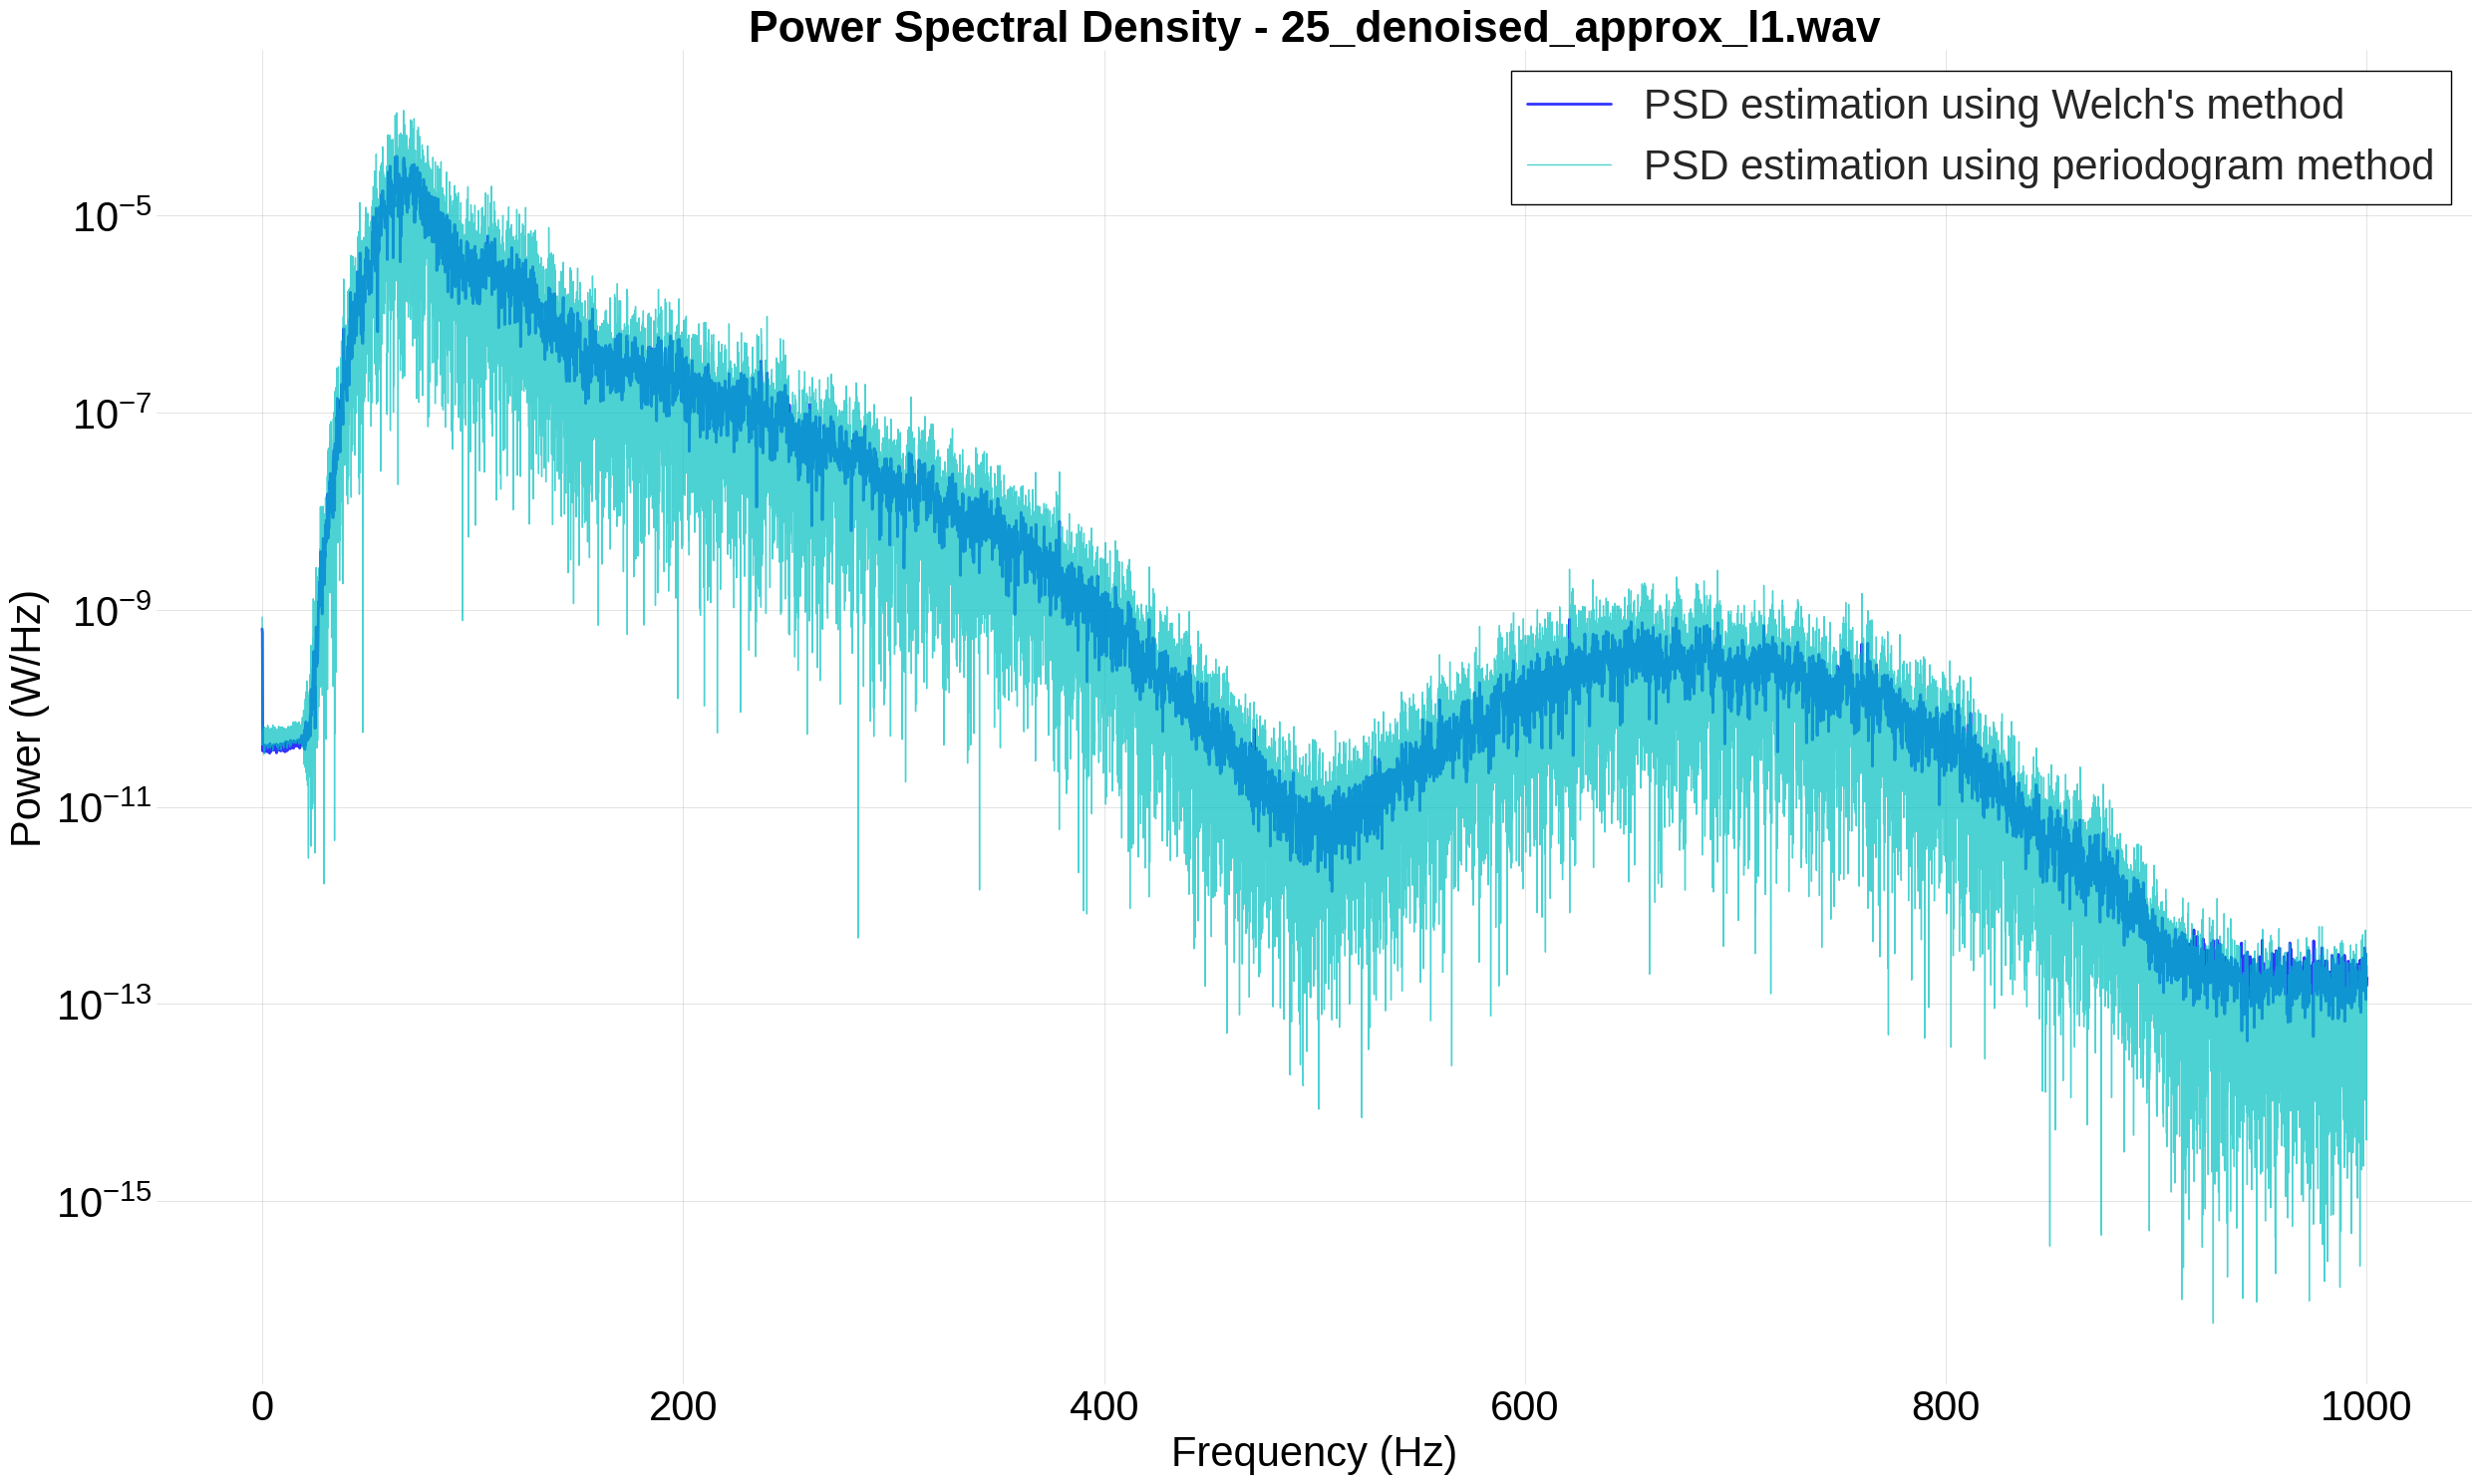


📊 PSD Statistics for 25_denoised_approx_l1.wav:
----------------------------------------
Welch's Method:
   • Peak frequency: 63.97 Hz
   • Peak power: 4.01e-05
   • Total power: 6.72e-04
   • Frequency resolution: 0.13 Hz

Periodogram Method:
   • Peak frequency: 67.25 Hz
   • Peak power: 1.17e-04
   • Total power: 6.98e-04
   • Frequency resolution: 0.03 Hz

🔍 Analyzing 75_denoised_approx_l1.wav (Murmur)...

📊 Visualizing PSD for: 75_denoised_approx_l1.wav
--------------------------------------------------
🔊 Loaded: 75_denoised_approx_l1.wav
   • Sample rate: 2000 Hz
   • Duration: 22.61 seconds
   • Samples: 45214
🔧 Welch Parameters:
   • Signal samples: 45214
   • Segment length: 11303
   • Overlap: 5651
   • FFT length: 11303
   • Window: hamming
✅ Welch PSD computed successfully
🔧 Periodogram Parameters:
   • Signal samples: 45214
   • FFT length: 45214
   • Window: hamming
✅ Periodogram PSD computed successfully
✅ FFT PSD computed successfully
💾 Plot saved as: psd_75_denoised_a

<Figure size 2500x1500 with 0 Axes>

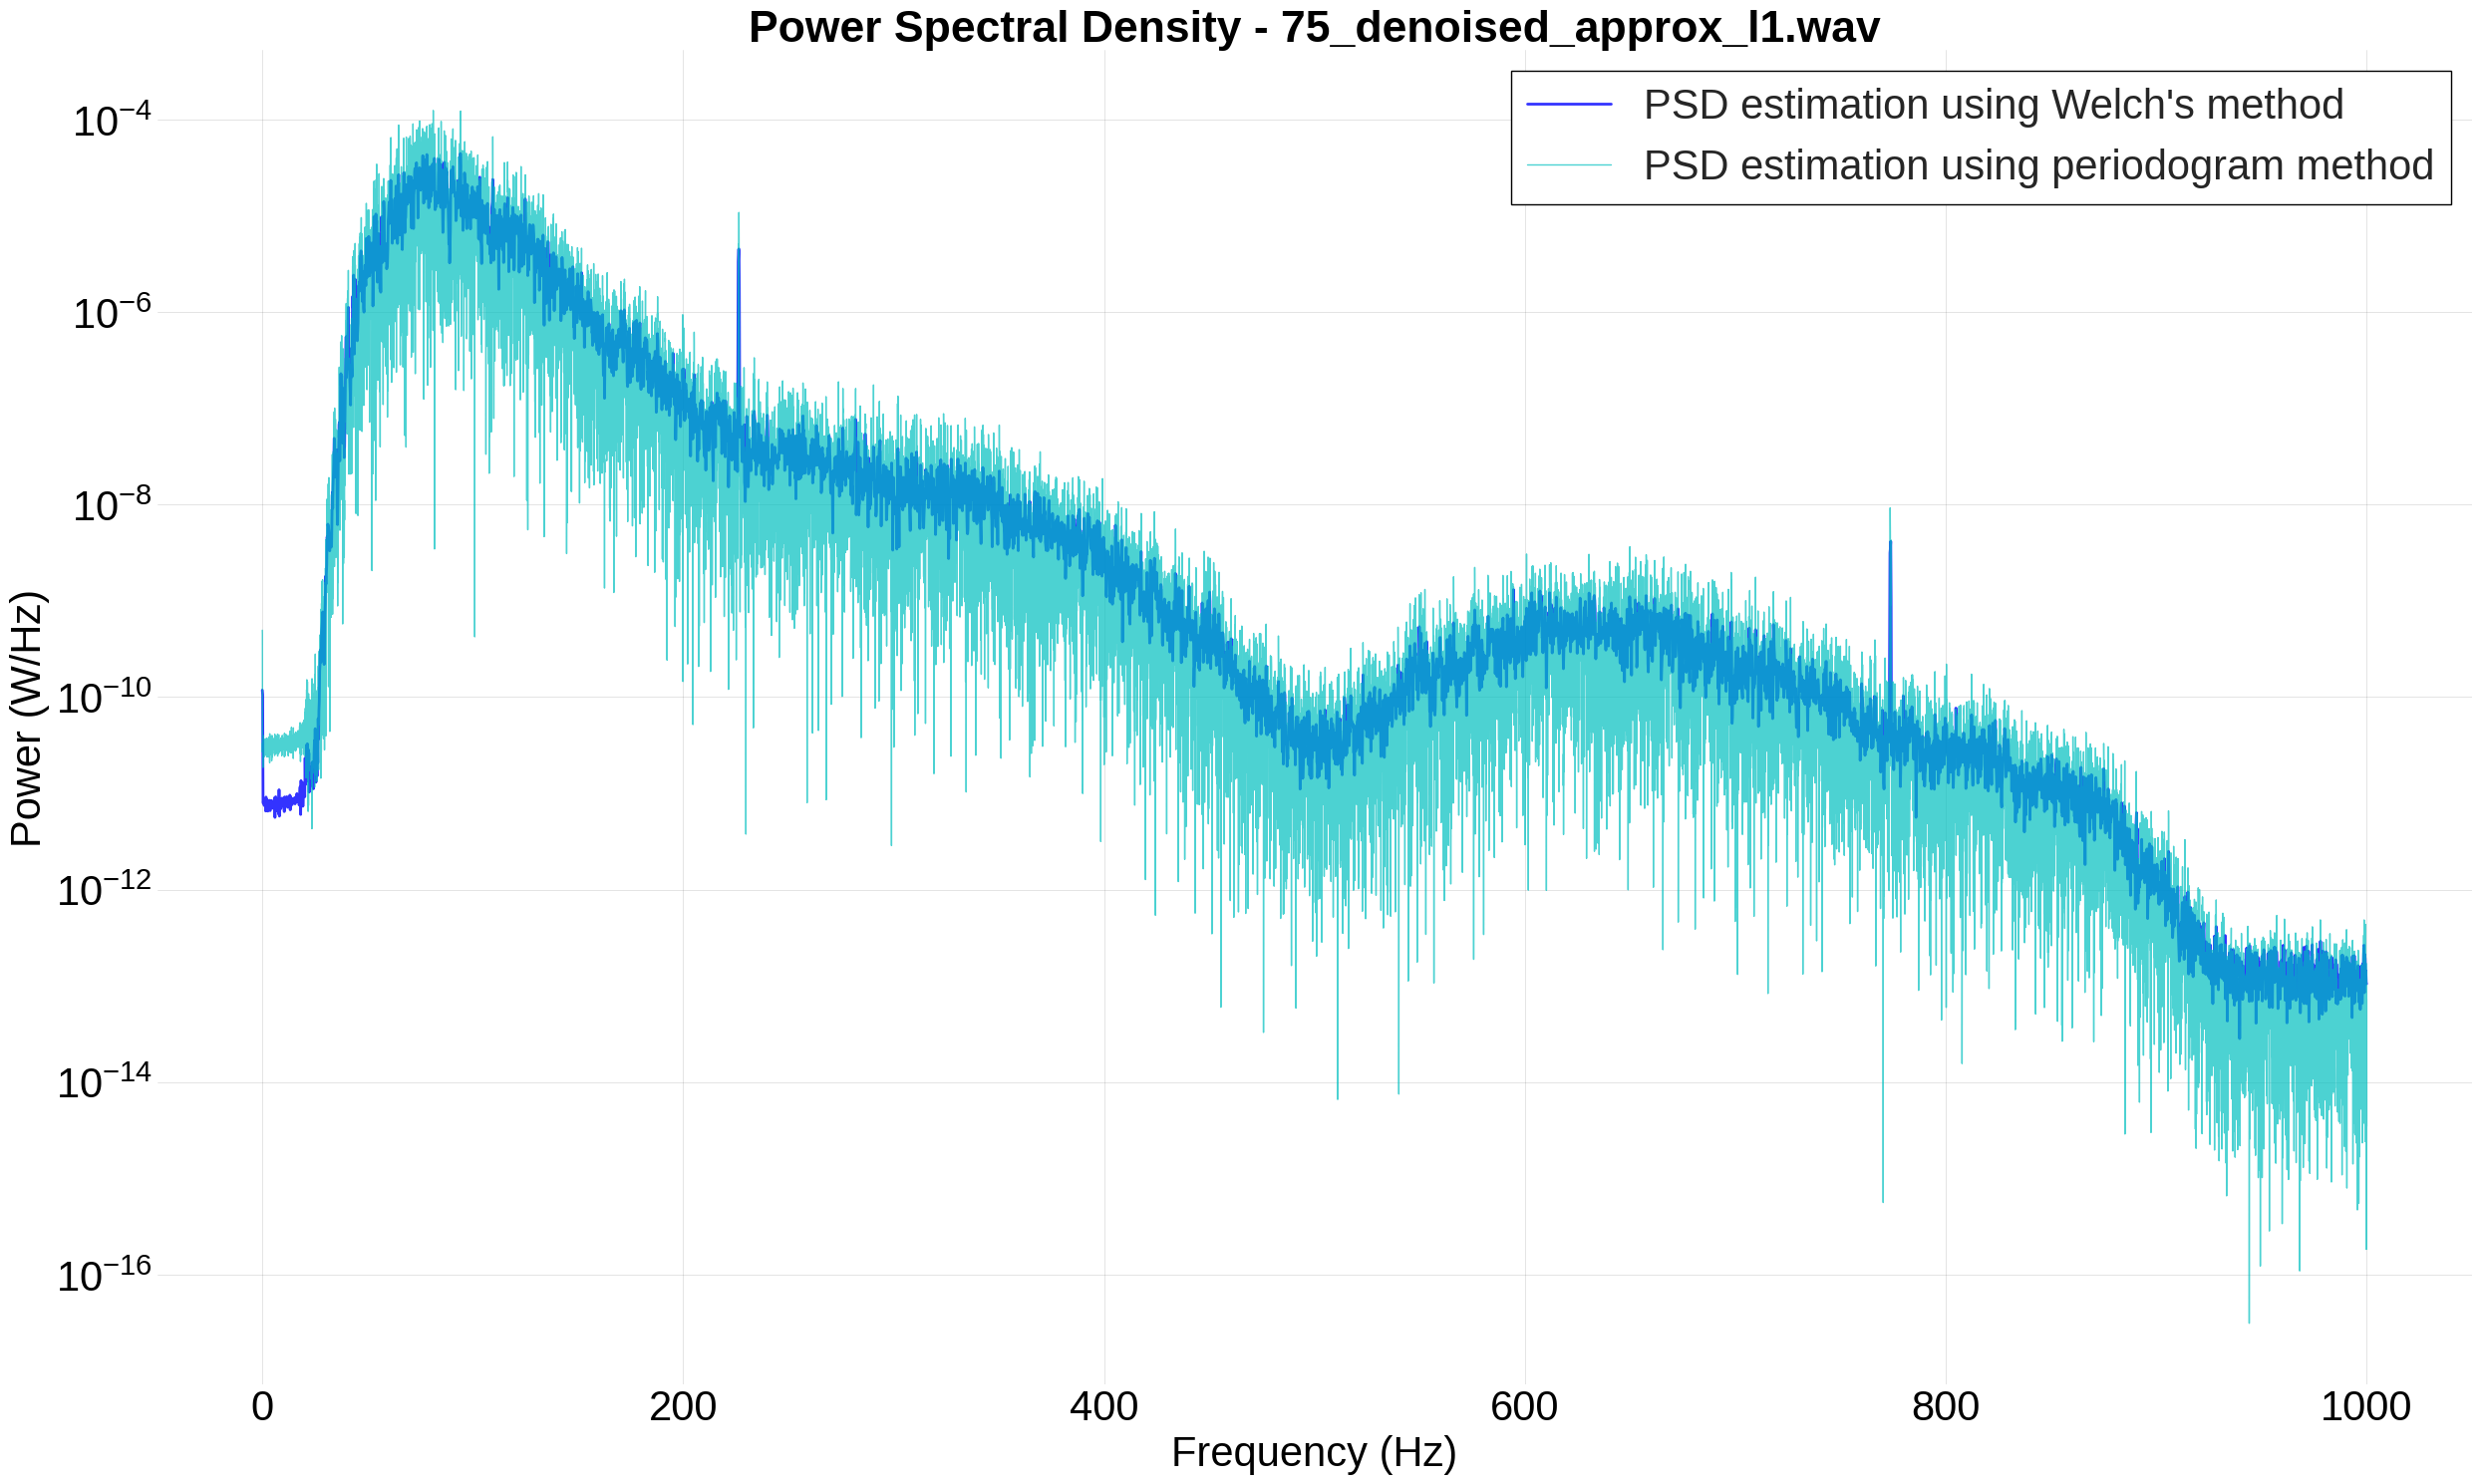


📊 PSD Statistics for 75_denoised_approx_l1.wav:
----------------------------------------
Welch's Method:
   • Peak frequency: 94.13 Hz
   • Peak power: 4.43e-05
   • Total power: 1.12e-03
   • Frequency resolution: 0.18 Hz

Periodogram Method:
   • Peak frequency: 81.21 Hz
   • Peak power: 1.24e-04
   • Total power: 1.07e-03
   • Frequency resolution: 0.04 Hz

📊 COMPARATIVE ANALYSIS

🔍 COMPARING SPECIFIC FILES: 25_denoised_approx_l1.wav vs 75_denoised_approx_l1.wav
🔊 Loaded: 25_denoised_approx_l1.wav
   • Sample rate: 2000 Hz
   • Duration: 31.14 seconds
   • Samples: 62276
🔊 Loaded: 75_denoised_approx_l1.wav
   • Sample rate: 2000 Hz
   • Duration: 22.61 seconds
   • Samples: 45214

🔄 Computing PSD for 25_denoised_approx_l1.wav...
🔧 Welch Parameters:
   • Signal samples: 62276
   • Segment length: 15569
   • Overlap: 7784
   • FFT length: 15569
   • Window: hamming
✅ Welch PSD computed successfully
🔧 Periodogram Parameters:
   • Signal samples: 62276
   • FFT length: 62276
   • Windo

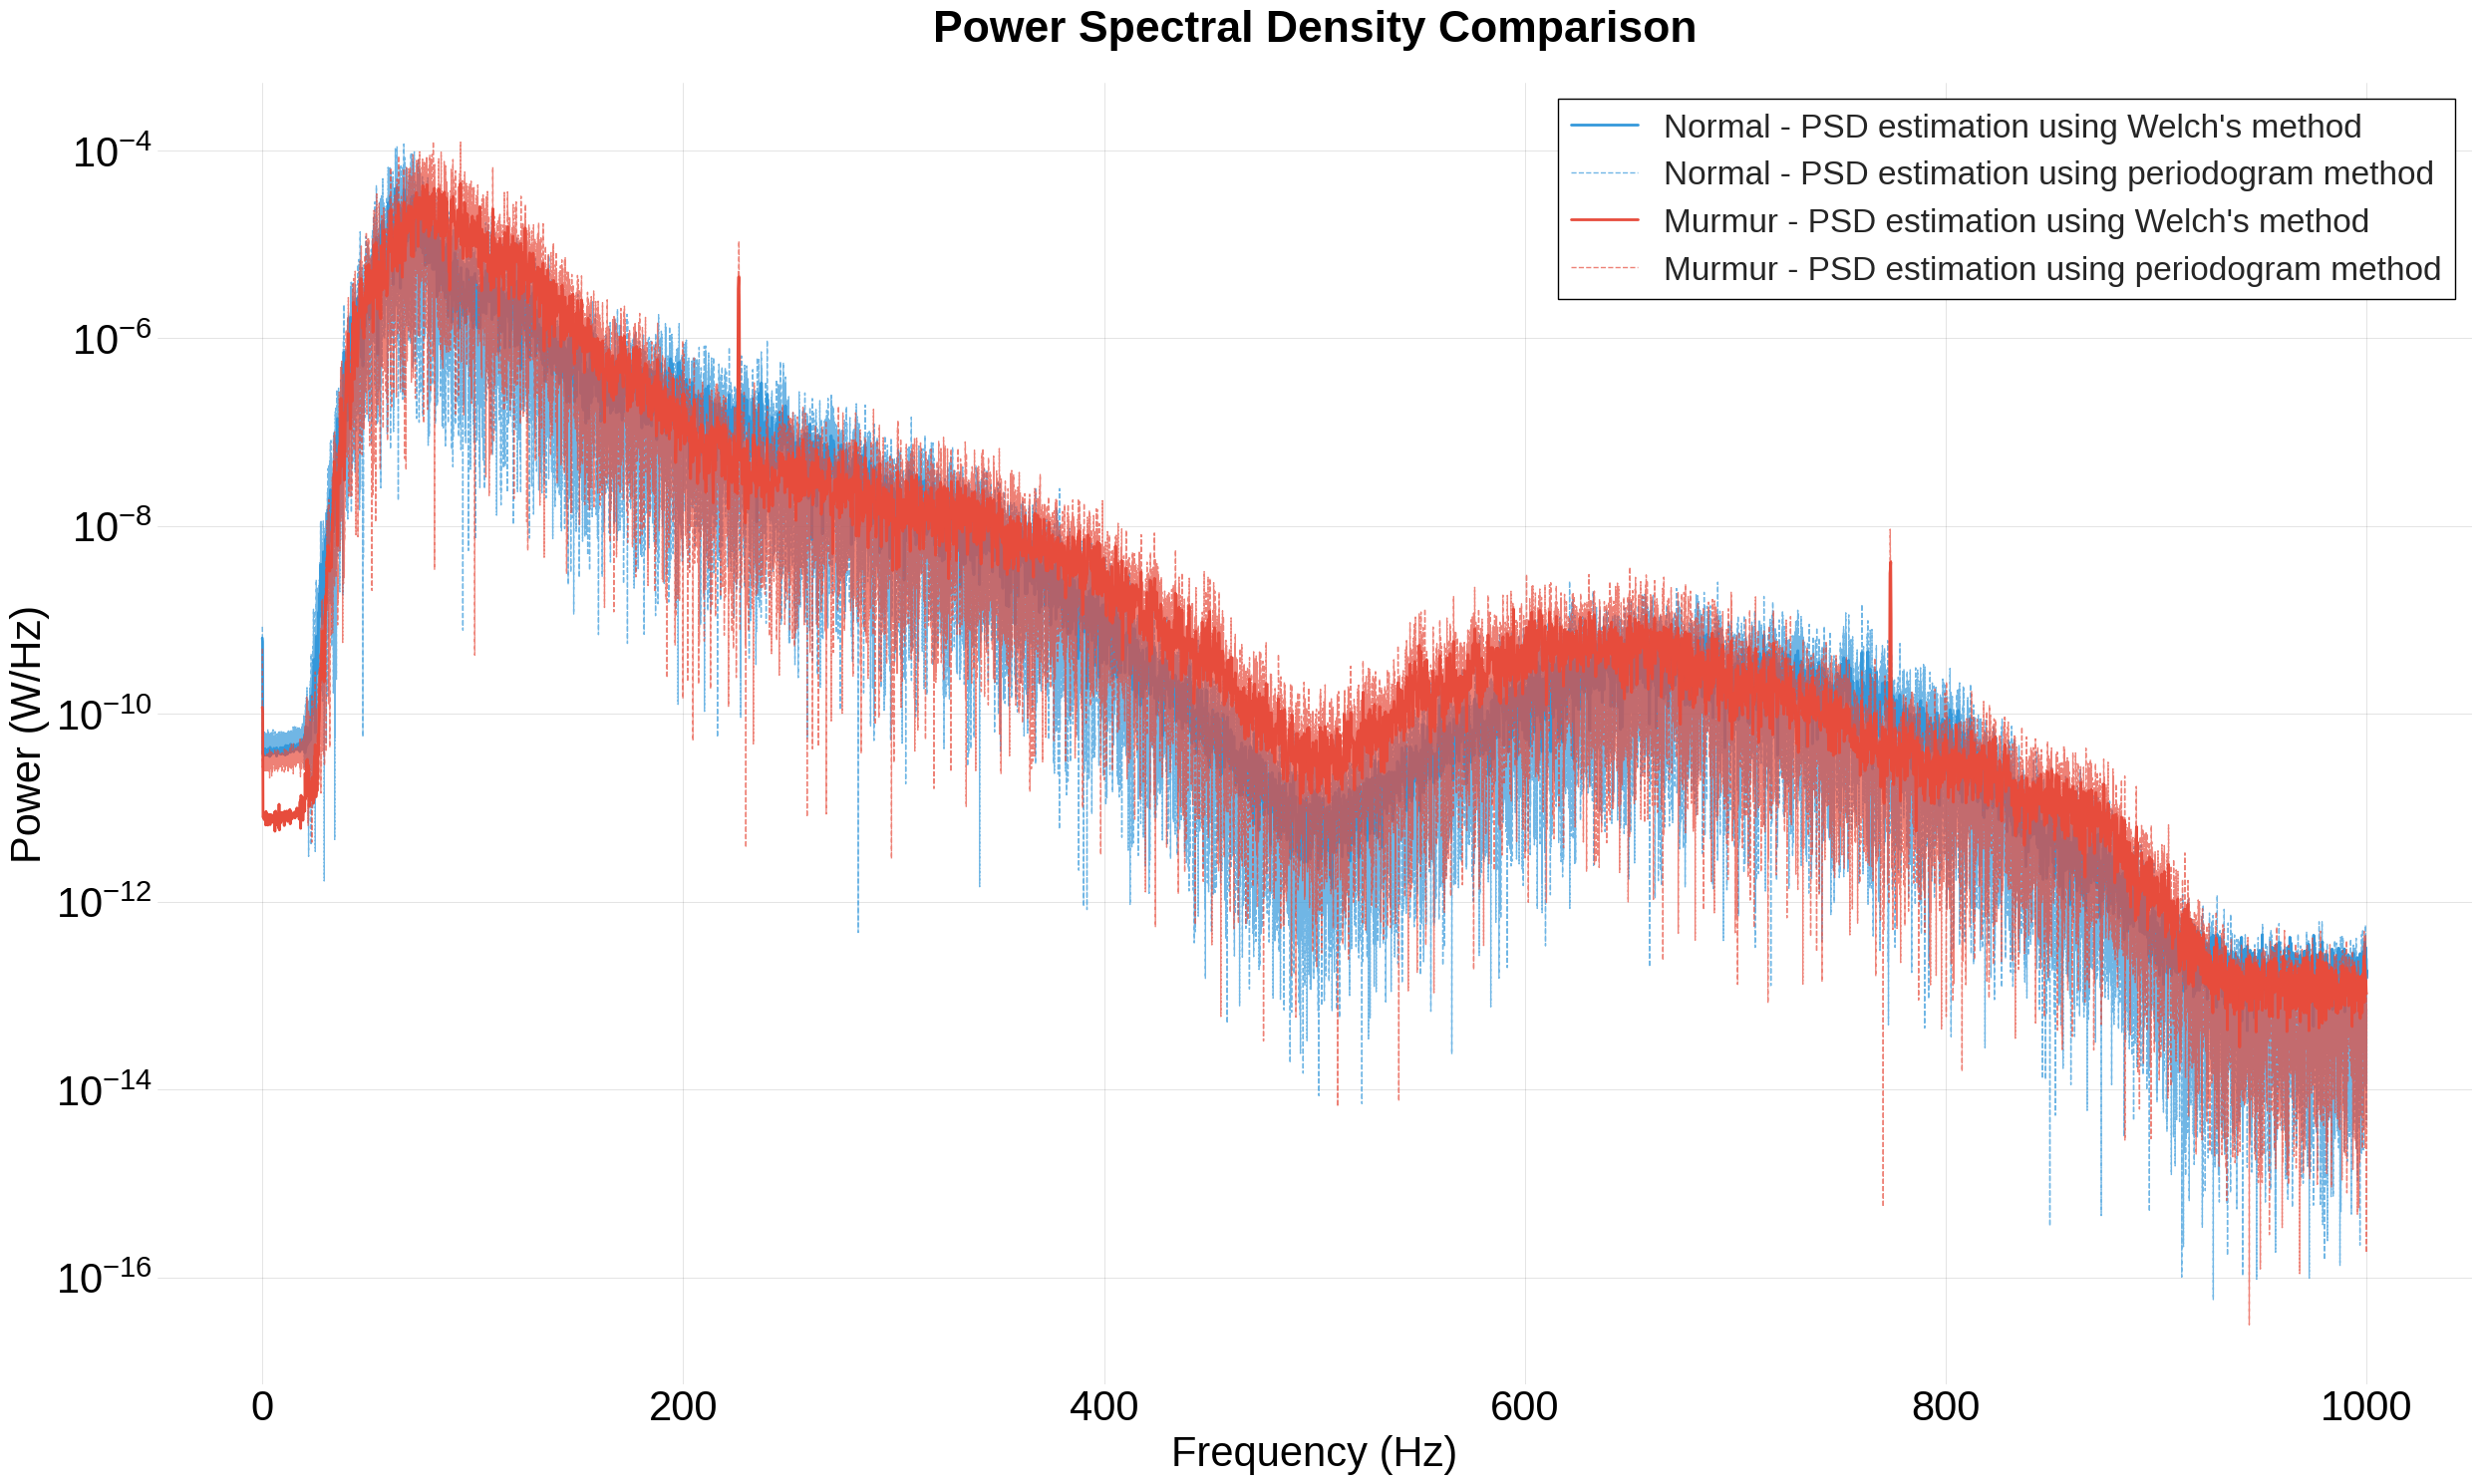


📊 COMPARATIVE STATISTICS:

25_denoised_approx_l1.wav (Normal):
   • Peak frequency: 63.97 Hz
   • Peak power: 4.01e-05
   • Total power: 6.72e-04

75_denoised_approx_l1.wav (Murmur):
   • Peak frequency: 94.13 Hz
   • Peak power: 4.43e-05
   • Total power: 1.12e-03

🔍 DIFFERENCES:
   • Peak frequency difference: 30.16 Hz
   • Peak power ratio (File2/File1): 1.11
   • Total power ratio (File2/File1): 1.66

✅ PSD VISUALIZATION COMPLETED!
🔊 Heart sound PSD analysis for files 25 and 75 provides insights into
   frequency characteristics differences between Normal and Murmur


In [ ]:
import os
import numpy as np
import pandas as pd
import librosa
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal
from scipy.signal import welch, periodogram
import warnings
warnings.filterwarnings('ignore')

class HeartSoundPSDVisualizer:
    """
    Power Spectral Density Visualization Tool for Heart Sound Audio Files

    Menggunakan berbagai metode untuk memvisualisasi PSD dari audio heart sound
    """

    def __init__(self, audio_folder_path, sample_rate=2000):
        self.audio_folder_path = audio_folder_path
        self.sample_rate = sample_rate
        self.audio_files = []

        print("🔊 HEART SOUND PSD VISUALIZATION TOOL")
        print("=" * 60)
        print(f"📂 Audio Folder: {audio_folder_path}")
        print(f"🎵 Sample Rate: {sample_rate} Hz")

        self._load_audio_files()

    def _load_audio_files(self):
        """Load list of audio files from folder"""

        try:
            files = [f for f in os.listdir(self.audio_folder_path) if f.lower().endswith('.wav')]
            self.audio_files = sorted(files)

            print(f"✅ Found {len(self.audio_files)} WAV files")
            if len(self.audio_files) > 0:
                print(f"📋 Sample files: {self.audio_files[:5]}...")

        except Exception as e:
            print(f"❌ Error loading audio files: {e}")
            self.audio_files = []

    def load_audio_signal(self, filename):
        """Load and return audio signal"""

        try:
            filepath = os.path.join(self.audio_folder_path, filename)
            audio_signal, sr = librosa.load(filepath, sr=self.sample_rate)

            print(f"🔊 Loaded: {filename}")
            print(f"   • Sample rate: {sr} Hz")
            print(f"   • Duration: {len(audio_signal)/sr:.2f} seconds")
            print(f"   • Samples: {len(audio_signal)}")

            return audio_signal, sr

        except Exception as e:
            print(f"❌ Error loading {filename}: {e}")
            return None, None

    def compute_psd_welch(self, audio_signal, fs):
        """
        Compute PSD using Welch's method with fixed parameters
        """

        try:
            # Parameters based on your reference - FIXED VERSION
            num_samples = len(audio_signal)

            # Ensure proper parameter relationships
            if num_samples < 512:
                # For very short signals
                seg_length = num_samples // 2
                overlap = seg_length // 4
                fft_length = max(512, seg_length * 2)
            else:
                # Standard parameters
                seg_length = num_samples // 4  # Segment length
                overlap = seg_length // 2      # Overlap = half segment length
                fft_length = max(4096, seg_length)  # FFT length must be >= seg_length

            # Ensure minimum values
            seg_length = max(256, seg_length)  # Minimum segment length
            overlap = min(overlap, seg_length - 1)  # Overlap must be < seg_length
            fft_length = max(fft_length, seg_length)  # nfft >= nperseg

            win = 'hamming'  # Window type

            print(f"🔧 Welch Parameters:")
            print(f"   • Signal samples: {num_samples}")
            print(f"   • Segment length: {seg_length}")
            print(f"   • Overlap: {overlap}")
            print(f"   • FFT length: {fft_length}")
            print(f"   • Window: {win}")

            # Compute PSD using Welch's method
            f_psd_w, psd_w = welch(
                audio_signal,
                fs=fs,
                window=win,
                nperseg=seg_length,
                noverlap=overlap,
                nfft=fft_length
            )

            print(f"✅ Welch PSD computed successfully")
            return f_psd_w, psd_w

        except Exception as e:
            print(f"❌ Error computing Welch PSD: {e}")
            return None, None

    def compute_psd_periodogram(self, audio_signal, fs):
        """
        Compute PSD using Periodogram method
        """

        try:
            num_samples = len(audio_signal)
            fft_length = max(4096, num_samples)  # Ensure FFT length is adequate
            win = 'hamming'

            print(f"🔧 Periodogram Parameters:")
            print(f"   • Signal samples: {num_samples}")
            print(f"   • FFT length: {fft_length}")
            print(f"   • Window: {win}")

            # Compute PSD using Periodogram
            f_psd_p, psd_p = periodogram(
                audio_signal,
                fs,
                window=win,
                nfft=fft_length
            )

            print(f"✅ Periodogram PSD computed successfully")
            return f_psd_p, psd_p

        except Exception as e:
            print(f"❌ Error computing Periodogram PSD: {e}")
            return None, None

    def compute_psd_fft(self, audio_signal, fs):
        """
        Compute PSD using simple FFT method
        """

        try:
            # Apply window
            windowed_signal = audio_signal * np.hamming(len(audio_signal))

            # Compute FFT
            fft_vals = np.fft.rfft(windowed_signal)

            # Compute power spectral density
            psd_fft = np.abs(fft_vals) ** 2

            # Frequency array
            f_fft = np.linspace(0, fs/2, len(psd_fft))

            # Normalize
            psd_fft = psd_fft / (fs * len(audio_signal))

            print(f"✅ FFT PSD computed successfully")
            return f_fft, psd_fft

        except Exception as e:
            print(f"❌ Error computing FFT PSD: {e}")
            return None, None

    def plot_single_file_psd(self, filename, save_plot=False):
        """
        Plot PSD for a single audio file using multiple methods
        """

        print(f"\n📊 Visualizing PSD for: {filename}")
        print("-" * 50)

        # Load audio
        audio_signal, fs = self.load_audio_signal(filename)

        if audio_signal is None:
            return

        # Compute PSDs using different methods
        f_welch, psd_welch = self.compute_psd_welch(audio_signal, fs)
        f_periodogram, psd_periodogram = self.compute_psd_periodogram(audio_signal, fs)
        f_fft, psd_fft = self.compute_psd_fft(audio_signal, fs)

        # Create figure
        plt.figure(figsize=(25, 15))  # Large figure like GitHub reference

        # Create figure with clean scientific styling
        plt.figure(figsize=(25, 15), facecolor='white')

        # Create clean axes
        ax = plt.gca()
        ax.set_facecolor('white')

        # Clean grid
        plt.grid(True, which="both", alpha=0.3, color='gray', linestyle='-', linewidth=0.5)

        if f_welch is not None and psd_welch is not None:
            plt.semilogy(f_welch, psd_welch, linewidth=2, color='b',
                        label="PSD estimation using Welch's method", alpha=0.8)

        if f_periodogram is not None and psd_periodogram is not None:
            plt.semilogy(f_periodogram, psd_periodogram, linewidth=1, color='c',
                        label="PSD estimation using periodogram method", alpha=0.7)

        # Clean formatting
        plt.xlabel('Frequency (Hz)', fontsize=30, color='black')
        plt.ylabel('Power (W/Hz)', fontsize=30, color='black')
        plt.tick_params(axis='both', which='major', labelsize=30, colors='black')
        plt.tick_params(axis='both', which='minor', labelsize=30, colors='black')

        # Clean legend
        legend = plt.legend(fontsize=30, frameon=True, fancybox=False, shadow=False)
        legend.get_frame().set_facecolor('white')
        legend.get_frame().set_edgecolor('black')
        legend.get_frame().set_alpha(1.0)

        # Simple title
        plt.title(f'Power Spectral Density - {filename}', fontsize=32, fontweight='bold', color='black')

        plt.tight_layout()

        if save_plot:
            plot_filename = f"psd_{filename.replace('.wav', '.png')}"
            plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
            print(f"💾 Plot saved as: {plot_filename}")

        plt.show()

        # Display statistics
        self._display_psd_statistics(f_welch, psd_welch, f_periodogram, psd_periodogram, filename)

    def _display_psd_statistics(self, f_welch, psd_welch, f_periodogram, psd_periodogram, filename):
        """Display PSD statistics"""

        print(f"\n📊 PSD Statistics for {filename}:")
        print("-" * 40)

        if f_welch is not None and psd_welch is not None:
            # Find peak frequency
            peak_idx_welch = np.argmax(psd_welch)
            peak_freq_welch = f_welch[peak_idx_welch]
            peak_power_welch = psd_welch[peak_idx_welch]

            # Total power
            total_power_welch = np.trapz(psd_welch, f_welch)

            print(f"Welch's Method:")
            print(f"   • Peak frequency: {peak_freq_welch:.2f} Hz")
            print(f"   • Peak power: {peak_power_welch:.2e}")
            print(f"   • Total power: {total_power_welch:.2e}")
            print(f"   • Frequency resolution: {f_welch[1] - f_welch[0]:.2f} Hz")

        if f_periodogram is not None and psd_periodogram is not None:
            peak_idx_period = np.argmax(psd_periodogram)
            peak_freq_period = f_periodogram[peak_idx_period]
            peak_power_period = psd_periodogram[peak_idx_period]

            total_power_period = np.trapz(psd_periodogram, f_periodogram)

            print(f"\nPeriodogram Method:")
            print(f"   • Peak frequency: {peak_freq_period:.2f} Hz")
            print(f"   • Peak power: {peak_power_period:.2e}")
            print(f"   • Total power: {total_power_period:.2e}")
            print(f"   • Frequency resolution: {f_periodogram[1] - f_periodogram[0]:.2f} Hz")

    def compare_specific_files(self, file1, file2, save_plot=False):
        """
        Compare PSD between two specific files (e.g., file 25 vs file 75)
        """

        print(f"\n🔍 COMPARING SPECIFIC FILES: {file1} vs {file2}")
        print("=" * 60)

        # Load both files
        audio1, fs1 = self.load_audio_signal(file1)
        audio2, fs2 = self.load_audio_signal(file2)

        if audio1 is None or audio2 is None:
            print("❌ Error loading one or both files")
            return

        # Compute PSDs
        print(f"\n🔄 Computing PSD for {file1}...")
        f_welch1, psd_welch1 = self.compute_psd_welch(audio1, fs1)
        f_period1, psd_period1 = self.compute_psd_periodogram(audio1, fs1)

        print(f"\n🔄 Computing PSD for {file2}...")
        f_welch2, psd_welch2 = self.compute_psd_welch(audio2, fs2)
        f_period2, psd_period2 = self.compute_psd_periodogram(audio2, fs2)

        # Create comparison plot - clean scientific style
        plt.figure(figsize=(25, 15), facecolor='white')  # White background

        # Create clean axes without background
        ax = plt.gca()
        ax.set_facecolor('white')  # White plot background

        # Clean grid style
        plt.grid(True, which="both", alpha=0.3, color='gray', linestyle='-', linewidth=0.5)

        # Determine labels based on file numbers
        label1 = "Normal" if "25" in file1 else "Murmur" if "75" in file1 else file1
        label2 = "Normal" if "25" in file2 else "Murmur" if "75" in file2 else file2

        color1 = '#3498db' if "25" in file1 else '#e74c3c'  # Blue for normal, red for murmur
        color2 = '#3498db' if "25" in file2 else '#e74c3c'

        if f_welch1 is not None and psd_welch1 is not None:
            plt.semilogy(f_welch1, psd_welch1, linewidth=2, color=color1,
                        label=f"{label1} - PSD estimation using Welch's method")

        if f_period1 is not None and psd_period1 is not None:
            plt.semilogy(f_period1, psd_period1, linewidth=1, color=color1,
                        label=f"{label1} - PSD estimation using periodogram method",
                        alpha=0.7, linestyle='--')

        if f_welch2 is not None and psd_welch2 is not None:
            plt.semilogy(f_welch2, psd_welch2, linewidth=2, color=color2,
                        label=f"{label2} - PSD estimation using Welch's method")

        if f_period2 is not None and psd_period2 is not None:
            plt.semilogy(f_period2, psd_period2, linewidth=1, color=color2,
                        label=f"{label2} - PSD estimation using periodogram method",
                        alpha=0.7, linestyle='--')

        # Format seperti kode GitHub asli dengan clean styling
        plt.xlabel('Frequency (Hz)', fontsize=30, color='black')
        plt.ylabel('Power (W/Hz)', fontsize=30, color='black')
        plt.tick_params(axis='both', which='major', labelsize=30, colors='black')
        plt.tick_params(axis='both', which='minor', labelsize=30, colors='black')

        # Clean legend without background
        legend = plt.legend(fontsize=24, frameon=True, fancybox=False, shadow=False)
        legend.get_frame().set_facecolor('white')
        legend.get_frame().set_edgecolor('black')
        legend.get_frame().set_alpha(1.0)

        # Simple clean title
        plt.title(f'Power Spectral Density Comparison',
                  fontsize=32, fontweight='bold', pad=30, color='black')

        # Remove any background elements and keep it clean
        # No text boxes or annotations for clean scientific look

        plt.tight_layout()

        if save_plot:
            plot_filename = f"comparison_{file1.replace('.wav', '')}_{file2.replace('.wav', '')}.png"
            plt.savefig(plot_filename, dpi=300, bbox_inches='tight')
            print(f"💾 Comparison plot saved as: {plot_filename}")

        plt.show()

        # Display comparative statistics
        self._display_comparison_stats(file1, f_welch1, psd_welch1, file2, f_welch2, psd_welch2)

    def _display_comparison_stats(self, file1, f1, psd1, file2, f2, psd2):
        """Display comparative statistics"""

        print(f"\n📊 COMPARATIVE STATISTICS:")
        print("=" * 50)

        if f1 is not None and psd1 is not None:
            peak_idx1 = np.argmax(psd1)
            peak_freq1 = f1[peak_idx1]
            peak_power1 = psd1[peak_idx1]
            total_power1 = np.trapz(psd1, f1)

            label1 = "Normal" if "25" in file1 else "Murmur" if "75" in file1 else file1
            print(f"\n{file1} ({label1}):")
            print(f"   • Peak frequency: {peak_freq1:.2f} Hz")
            print(f"   • Peak power: {peak_power1:.2e}")
            print(f"   • Total power: {total_power1:.2e}")

        if f2 is not None and psd2 is not None:
            peak_idx2 = np.argmax(psd2)
            peak_freq2 = f2[peak_idx2]
            peak_power2 = psd2[peak_idx2]
            total_power2 = np.trapz(psd2, f2)

            label2 = "Normal" if "25" in file2 else "Murmur" if "75" in file2 else file2
            print(f"\n{file2} ({label2}):")
            print(f"   • Peak frequency: {peak_freq2:.2f} Hz")
            print(f"   • Peak power: {peak_power2:.2e}")
            print(f"   • Total power: {total_power2:.2e}")

            # Calculate differences
            if f1 is not None and psd1 is not None:
                freq_diff = peak_freq2 - peak_freq1
                power_ratio = peak_power2 / peak_power1 if peak_power1 > 0 else 0
                total_power_ratio = total_power2 / total_power1 if total_power1 > 0 else 0

                print(f"\n🔍 DIFFERENCES:")
                print(f"   • Peak frequency difference: {freq_diff:.2f} Hz")
                print(f"   • Peak power ratio (File2/File1): {power_ratio:.2f}")
                print(f"   • Total power ratio (File2/File1): {total_power_ratio:.2f}")

def main():
    """
    Main function to demonstrate PSD visualization for files 25 and 75
    """

    # Configuration
    audio_folder = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/denoised_approx_l1_for_emd"

    try:
        # Initialize visualizer
        visualizer = HeartSoundPSDVisualizer(audio_folder, sample_rate=2000)

        if len(visualizer.audio_files) == 0:
            print("❌ No audio files found!")
            return None

        # Look for specific files 25 and 75
        file25 = "25_denoised_approx_l1.wav"
        file75 = "75_denoised_approx_l1.wav"

        print(f"\n🎯 TARGET FILES ANALYSIS:")
        print(f"📄 File 25 (Normal): {file25}")
        print(f"📄 File 75 (Murmur): {file75}")

        # Check if files exist
        if file25 not in visualizer.audio_files:
            print(f"⚠️ Warning: {file25} not found in folder")
            # Try alternative naming
            alt_file25 = [f for f in visualizer.audio_files if "25" in f]
            if alt_file25:
                file25 = alt_file25[0]
                print(f"✅ Found alternative: {file25}")

        if file75 not in visualizer.audio_files:
            print(f"⚠️ Warning: {file75} not found in folder")
            # Try alternative naming
            alt_file75 = [f for f in visualizer.audio_files if "75" in f]
            if alt_file75:
                file75 = alt_file75[0]
                print(f"✅ Found alternative: {file75}")

        # Perform individual analysis
        print(f"\n" + "="*60)
        print(f"📊 INDIVIDUAL FILE ANALYSIS")
        print(f"="*60)

        if file25 in visualizer.audio_files:
            print(f"\n🔍 Analyzing {file25} (Normal)...")
            visualizer.plot_single_file_psd(file25, save_plot=True)

        if file75 in visualizer.audio_files:
            print(f"\n🔍 Analyzing {file75} (Murmur)...")
            visualizer.plot_single_file_psd(file75, save_plot=True)

        # Perform comparison analysis
        if file25 in visualizer.audio_files and file75 in visualizer.audio_files:
            print(f"\n" + "="*60)
            print(f"📊 COMPARATIVE ANALYSIS")
            print(f"="*60)

            visualizer.compare_specific_files(file25, file75, save_plot=True)

        print(f"\n✅ PSD VISUALIZATION COMPLETED!")
        print(f"🔊 Heart sound PSD analysis for files 25 and 75 provides insights into")
        print(f"   frequency characteristics differences between Normal and Murmur")

        return visualizer

    except Exception as e:
        print(f"❌ Error in main execution: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    visualizer = main()

In [ ]:
wav_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/denoised_approx_l1_for_emd"

In [ ]:
import os
import pandas as pd
import numpy as np
import librosa
from scipy import signal
from scipy.stats import skew, kurtosis
from scipy.fftpack import dct
import warnings
warnings.filterwarnings('ignore')

class FixedPSDExtractor:
    """
    Fixed PSD Feature Extractor untuk Heart Sound Audio Files
    Mengatasi masalah MFCC dan dimension mismatch
    """

    def __init__(self, wav_path, output_csv_path):
        self.wav_path = wav_path
        self.output_csv_path = output_csv_path
        self.sample_rate = 2000
        self.NFFT = 256

        # Frequency bands untuk analisis power spectrum
        self.frequency_ranges = [
            (25, 45), (45, 65), (65, 85), (85, 105), (105, 125),
            (125, 150), (150, 200), (200, 300), (300, 500)
        ]

        print(f"🔊 FIXED PSD FEATURE EXTRACTOR")
        print(f"   • Audio Path: {wav_path}")
        print(f"   • Output CSV: {output_csv_path}")
        print(f"   • Sample Rate: {self.sample_rate} Hz")
        print(f"   • NFFT: {self.NFFT}")

    def compute_fixed_mfcc(self, audio_signal, n_mfcc=12):
        """
        Fixed MFCC computation using librosa (more reliable)
        """
        try:
            # Gunakan librosa untuk MFCC yang lebih robust
            mfcc_features = librosa.feature.mfcc(
                y=audio_signal,
                sr=self.sample_rate,
                n_mfcc=n_mfcc,
                n_fft=self.NFFT,
                hop_length=self.NFFT//4
            )

            # Ambil statistik dari MFCC
            mfcc_mean = np.mean(mfcc_features, axis=1)
            mfcc_std = np.std(mfcc_features, axis=1)

            features = {}

            # Individual MFCC coefficients (mean values)
            for i in range(n_mfcc):
                features[f'mfcc_{i+1}_mean'] = mfcc_mean[i]
                features[f'mfcc_{i+1}_std'] = mfcc_std[i]

            # Overall MFCC statistics
            features['mfcc_overall_mean'] = np.mean(mfcc_features)
            features['mfcc_overall_std'] = np.std(mfcc_features)
            features['mfcc_overall_skew'] = skew(mfcc_features.flatten())
            features['mfcc_overall_kurtosis'] = kurtosis(mfcc_features.flatten())

            return features

        except Exception as e:
            print(f"Warning: MFCC computation failed: {e}")
            # Return zero values jika gagal
            features = {}
            for i in range(n_mfcc):
                features[f'mfcc_{i+1}_mean'] = 0.0
                features[f'mfcc_{i+1}_std'] = 0.0
            features['mfcc_overall_mean'] = 0.0
            features['mfcc_overall_std'] = 0.0
            features['mfcc_overall_skew'] = 0.0
            features['mfcc_overall_kurtosis'] = 0.0
            return features

    def compute_power_spectral_density(self, audio_signal):
        """
        Compute comprehensive PSD features
        """
        features = {}

        # Method 1: Welch's PSD
        try:
            nperseg = min(len(audio_signal)//8, self.NFFT)
            freqs_welch, psd_welch = signal.welch(
                audio_signal,
                fs=self.sample_rate,
                nperseg=nperseg,
                nfft=self.NFFT
            )

            # PSD statistics
            features.update({
                'psd_welch_mean': np.mean(psd_welch),
                'psd_welch_std': np.std(psd_welch),
                'psd_welch_max': np.max(psd_welch),
                'psd_welch_median': np.median(psd_welch),
                'psd_welch_peak_freq': freqs_welch[np.argmax(psd_welch)],
                'psd_welch_total_power': np.sum(psd_welch),
                'psd_welch_entropy': self._compute_entropy(psd_welch)
            })

        except Exception as e:
            print(f"Warning: Welch PSD failed: {e}")
            for key in ['psd_welch_mean', 'psd_welch_std', 'psd_welch_max', 'psd_welch_median',
                       'psd_welch_peak_freq', 'psd_welch_total_power', 'psd_welch_entropy']:
                features[key] = 0.0

        # Method 2: FFT Power Spectrum
        try:
            # Zero-pad jika perlu
            if len(audio_signal) < self.NFFT:
                audio_padded = np.pad(audio_signal, (0, self.NFFT - len(audio_signal)), 'constant')
            else:
                audio_padded = audio_signal

            # Apply window
            windowed = audio_padded[:self.NFFT] * np.hamming(self.NFFT)

            # Compute FFT
            fft_vals = np.fft.rfft(windowed, n=self.NFFT)
            power_spectrum = np.abs(fft_vals)**2

            # Normalize
            power_spectrum_norm = power_spectrum / (np.sum(power_spectrum) + 1e-12)

            # Frequency array
            freqs_fft = np.linspace(0, self.sample_rate/2, len(power_spectrum))

            # Spectral features
            features.update({
                'power_spec_mean': np.mean(power_spectrum),
                'power_spec_std': np.std(power_spectrum),
                'power_spec_max': np.max(power_spectrum),
                'power_spec_skew': skew(power_spectrum),
                'power_spec_kurtosis': kurtosis(power_spectrum),
                'power_spec_entropy': self._compute_entropy(power_spectrum_norm),
                'spectral_centroid': np.sum(freqs_fft * power_spectrum_norm),
                'spectral_bandwidth': self._compute_spectral_bandwidth(freqs_fft, power_spectrum_norm),
                'spectral_rolloff_85': self._compute_spectral_rolloff(freqs_fft, power_spectrum_norm, 0.85),
                'spectral_rolloff_95': self._compute_spectral_rolloff(freqs_fft, power_spectrum_norm, 0.95)
            })

            # Frequency band analysis
            self._compute_frequency_bands(freqs_fft, power_spectrum_norm, features)

            return features, power_spectrum

        except Exception as e:
            print(f"Warning: FFT power spectrum failed: {e}")
            # Set default values
            default_keys = ['power_spec_mean', 'power_spec_std', 'power_spec_max', 'power_spec_skew',
                          'power_spec_kurtosis', 'power_spec_entropy', 'spectral_centroid',
                          'spectral_bandwidth', 'spectral_rolloff_85', 'spectral_rolloff_95']
            for key in default_keys:
                features[key] = 0.0

            # Add zero frequency band features
            for i in range(len(self.frequency_ranges)):
                features[f'band_{i+1}_power'] = 0.0
                features[f'band_{i+1}_power_ratio'] = 0.0
                features[f'band_{i+1}_peak_freq'] = 0.0

            return features, np.zeros(self.NFFT//2)

    def _compute_entropy(self, spectrum):
        """Compute spectral entropy"""
        try:
            # Normalize
            prob = spectrum / (np.sum(spectrum) + 1e-12)
            # Remove zeros
            prob = prob[prob > 1e-12]
            return -np.sum(prob * np.log2(prob))
        except:
            return 0.0

    def _compute_spectral_bandwidth(self, freqs, power_norm):
        """Compute spectral bandwidth"""
        try:
            centroid = np.sum(freqs * power_norm)
            return np.sqrt(np.sum(((freqs - centroid)**2) * power_norm))
        except:
            return 0.0

    def _compute_spectral_rolloff(self, freqs, power_norm, rolloff_percent):
        """Compute spectral rolloff"""
        try:
            cumsum_power = np.cumsum(power_norm)
            rolloff_idx = np.where(cumsum_power >= rolloff_percent)[0]
            return freqs[rolloff_idx[0]] if len(rolloff_idx) > 0 else freqs[-1]
        except:
            return 0.0

    def _compute_frequency_bands(self, freqs, power_norm, features):
        """Compute power in different frequency bands"""
        try:
            total_power = np.sum(power_norm)

            for i, (low_freq, high_freq) in enumerate(self.frequency_ranges):
                # Find indices untuk frequency band
                band_indices = np.where((freqs >= low_freq) & (freqs < high_freq))[0]

                if len(band_indices) > 0:
                    band_power = np.sum(power_norm[band_indices])
                    band_power_ratio = band_power / (total_power + 1e-12)
                    peak_idx = band_indices[np.argmax(power_norm[band_indices])]
                    peak_freq = freqs[peak_idx]

                    features[f'band_{i+1}_power'] = band_power
                    features[f'band_{i+1}_power_ratio'] = band_power_ratio
                    features[f'band_{i+1}_peak_freq'] = peak_freq
                else:
                    features[f'band_{i+1}_power'] = 0.0
                    features[f'band_{i+1}_power_ratio'] = 0.0
                    features[f'band_{i+1}_peak_freq'] = 0.0

        except Exception as e:
            print(f"Warning: Frequency band computation failed: {e}")
            for i in range(len(self.frequency_ranges)):
                features[f'band_{i+1}_power'] = 0.0
                features[f'band_{i+1}_power_ratio'] = 0.0
                features[f'band_{i+1}_peak_freq'] = 0.0

    def compute_time_domain_features(self, audio_signal):
        """Compute time domain features"""
        features = {}

        try:
            # Basic statistics
            features.update({
                'signal_mean': np.mean(audio_signal),
                'signal_std': np.std(audio_signal),
                'signal_var': np.var(audio_signal),
                'signal_rms': np.sqrt(np.mean(audio_signal**2)),
                'signal_max': np.max(audio_signal),
                'signal_min': np.min(audio_signal),
                'signal_range': np.ptp(audio_signal),
                'signal_skew': skew(audio_signal),
                'signal_kurtosis': kurtosis(audio_signal)
            })

            # Zero crossing rate
            zero_crossings = np.where(np.diff(np.signbit(audio_signal)))[0]
            features['zero_crossing_rate'] = len(zero_crossings) / len(audio_signal)

            # Energy features
            features.update({
                'signal_energy': np.sum(audio_signal**2),
                'signal_power': np.mean(audio_signal**2),
                'signal_peak_to_peak': np.ptp(audio_signal)
            })

            # Crest factor
            if features['signal_rms'] > 1e-12:
                features['crest_factor'] = np.abs(features['signal_max']) / features['signal_rms']
            else:
                features['crest_factor'] = 0.0

            # Short-time energy variance
            frame_length = min(len(audio_signal)//10, 512)
            if frame_length > 0:
                frames = [audio_signal[i:i+frame_length] for i in range(0, len(audio_signal)-frame_length, frame_length)]
                frame_energies = [np.sum(frame**2) for frame in frames if len(frame) == frame_length]
                features['ste_variance'] = np.var(frame_energies) if len(frame_energies) > 1 else 0.0
            else:
                features['ste_variance'] = 0.0

        except Exception as e:
            print(f"Warning: Time domain features failed: {e}")
            # Set defaults
            default_keys = ['signal_mean', 'signal_std', 'signal_var', 'signal_rms', 'signal_max',
                          'signal_min', 'signal_range', 'signal_skew', 'signal_kurtosis',
                          'zero_crossing_rate', 'signal_energy', 'signal_power', 'signal_peak_to_peak',
                          'crest_factor', 'ste_variance']
            for key in default_keys:
                features[key] = 0.0

        return features

    def extract_features_from_file(self, wav_file_path):
        """Extract all features from a single file"""
        try:
            # Load audio
            audio_signal, sr = librosa.load(wav_file_path, sr=self.sample_rate)

            if len(audio_signal) == 0:
                print(f"Warning: Empty audio file {wav_file_path}")
                return None

            # File info
            filename = os.path.basename(wav_file_path)
            file_number = filename.split('_')[0] if '_' in filename else filename.split('.')[0]

            features = {
                'file_name': filename,
                'file_number': int(file_number) if file_number.isdigit() else 0,
                'duration': len(audio_signal) / self.sample_rate,
                'sample_rate': sr,
                'signal_length': len(audio_signal)
            }

            # Time domain features
            time_features = self.compute_time_domain_features(audio_signal)
            features.update(time_features)

            # PSD features
            psd_features, power_spectrum = self.compute_power_spectral_density(audio_signal)
            features.update(psd_features)

            # MFCC features (fixed version)
            mfcc_features = self.compute_fixed_mfcc(audio_signal)
            features.update(mfcc_features)

            return features

        except Exception as e:
            print(f"Error processing {wav_file_path}: {e}")
            return None

    def extract_all_features(self):
        """Extract features from all files"""
        print(f"\n🔊 Starting Fixed PSD Feature Extraction...")

        # Get WAV files
        wav_files = [f for f in os.listdir(self.wav_path) if f.lower().endswith('.wav')]
        wav_files.sort()

        print(f"📊 Found {len(wav_files)} WAV files")

        if len(wav_files) == 0:
            print("❌ No WAV files found!")
            return None

        all_features = []
        success_count = 0

        for i, filename in enumerate(wav_files, 1):
            print(f"🔄 Processing ({i}/{len(wav_files)}): {filename}")

            filepath = os.path.join(self.wav_path, filename)
            features = self.extract_features_from_file(filepath)

            if features is not None:
                all_features.append(features)
                success_count += 1

                # Show progress every 20 files
                if i % 20 == 0:
                    print(f"   ✅ Successfully processed {success_count}/{i} files")

        if len(all_features) == 0:
            print("❌ No features extracted!")
            return None

        # Create DataFrame
        df_features = pd.DataFrame(all_features)

        # Add labels
        df_features = self._add_labels(df_features)

        # Sort by file number
        try:
            df_features = df_features.sort_values('file_number').reset_index(drop=True)
        except:
            pass

        # Save CSV
        try:
            df_features.to_csv(self.output_csv_path, index=False)
            print(f"\n✅ Features saved to: {self.output_csv_path}")
            print(f"📊 Successfully extracted features from {len(df_features)} files")
            print(f"🎯 Total features per file: {len(df_features.columns)}")

        except Exception as e:
            print(f"❌ Error saving CSV: {e}")
            return None

        return df_features

    def _add_labels(self, df_features):
        """Add label information"""
        try:
            def get_label(file_number):
                try:
                    num = int(file_number)
                    if 1 <= num <= 50:
                        return -1, "Normal"
                    elif 51 <= num <= 100:
                        return 1, "Murmur"
                    else:
                        return 0, "Unknown"
                except:
                    return 0, "Unknown"

            df_features[['label', 'label_text']] = df_features['file_number'].apply(
                lambda x: pd.Series(get_label(x))
            )

            # Reorder columns
            cols = list(df_features.columns)
            new_order = ['file_name', 'file_number', 'label', 'label_text'] + [col for col in cols if col not in ['file_name', 'file_number', 'label', 'label_text']]
            df_features = df_features[new_order]

        except Exception as e:
            print(f"Warning: Could not add labels: {e}")

        return df_features

    def display_summary(self, df_features):
        """Display extraction summary"""
        if df_features is None:
            return

        print(f"\n📊 FIXED PSD FEATURE EXTRACTION SUMMARY")
        print("=" * 60)
        print(f"📁 Files processed: {len(df_features)}")
        print(f"🎯 Features per file: {len(df_features.columns)}")

        if 'label_text' in df_features.columns:
            print(f"\n📈 Label Distribution:")
            for label, count in df_features['label_text'].value_counts().items():
                print(f"   • {label}: {count} files")

        # Feature categories
        feature_cols = [col for col in df_features.columns if col not in ['file_name', 'file_number', 'label', 'label_text']]

        time_features = [col for col in feature_cols if 'signal_' in col or 'zero_' in col or 'crest_' in col or 'ste_' in col]
        psd_features = [col for col in feature_cols if 'psd_' in col or 'power_spec_' in col or 'spectral_' in col]
        band_features = [col for col in feature_cols if 'band_' in col]
        mfcc_features = [col for col in feature_cols if 'mfcc_' in col]
        meta_features = [col for col in feature_cols if col in ['duration', 'sample_rate', 'signal_length']]

        print(f"\n🔢 Feature Categories:")
        print(f"   • Metadata: {len(meta_features)} features")
        print(f"   • Time Domain: {len(time_features)} features")
        print(f"   • Power Spectral Density: {len(psd_features)} features")
        print(f"   • Frequency Bands: {len(band_features)} features")
        print(f"   • MFCC (Fixed): {len(mfcc_features)} features")

        print(f"\n📋 Sample Features (first 3 files):")
        display_cols = ['file_name', 'label_text', 'duration', 'signal_rms', 'psd_welch_mean', 'spectral_centroid']
        if 'mfcc_1_mean' in df_features.columns:
            display_cols.append('mfcc_1_mean')

        available_cols = [col for col in display_cols if col in df_features.columns]
        if available_cols:
            print(df_features[available_cols].head(3).to_string(index=False))

def main():
    """Main execution function"""

    # Paths
    wav_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/denoised_approx_l1_for_emd"
    output_csv = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv"

    try:
        # Initialize extractor
        extractor = FixedPSDExtractor(wav_path, output_csv)

        # Extract features
        df_features = extractor.extract_all_features()

        if df_features is not None:
            # Display summary
            extractor.display_summary(df_features)

            print(f"\n✅ FIXED PSD Feature extraction completed!")
            print(f"📊 No MFCC computation errors!")
            print(f"💾 Results saved to: {output_csv}")

            return df_features
        else:
            print("❌ Feature extraction failed!")
            return None

    except Exception as e:
        print(f"❌ Error: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    df_features = main()

🔊 FIXED PSD FEATURE EXTRACTOR
   • Audio Path: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/denoised_approx_l1_for_emd
   • Output CSV: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv
   • Sample Rate: 2000 Hz
   • NFFT: 256

🔊 Starting Fixed PSD Feature Extraction...
📊 Found 100 WAV files
🔄 Processing (1/100): 100_denoised_approx_l1.wav
🔄 Processing (2/100): 10_denoised_approx_l1.wav
🔄 Processing (3/100): 11_denoised_approx_l1.wav
🔄 Processing (4/100): 12_denoised_approx_l1.wav
🔄 Processing (5/100): 13_denoised_approx_l1.wav
🔄 Processing (6/100): 14_denoised_approx_l1.wav
🔄 Processing (7/100): 15_denoised_approx_l1.wav
🔄 Processing (8/100): 16_denoised_approx_l1.wav
🔄 Processing (9/100): 17_denoised_approx_l1.wav
🔄 Processing (10/100): 18_denoised_approx_l1.wav
🔄 Processing (11/100): 19_denoised_approx_l1.wav
🔄 Processing (12/100): 1_denoised_approx_l1.wav
🔄 Processing (13/100): 20_denoised_approx_l1.wav
🔄 Processing (14/100): 21_

🔬 JACKKNIFE (LOOCV) COMPARISON: EMD vs PSD FEATURES
📊 EMD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv
📊 PSD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv

📂 Loading datasets...
✅ EMD dataset loaded: (100, 35)
✅ PSD dataset loaded: (100, 94)

📊 Dataset Information:
   • EMD Features: 100 samples, 35 columns
   • PSD Features: 100 samples, 94 columns

📈 EMD Label Distribution: {'Normal': 50, 'Murmur': 50}
📈 PSD Label Distribution: {'Normal': 50, 'Murmur': 50}

🔬 COMPARATIVE JACKKNIFE ANALYSIS

1️⃣ Preparing EMD Features...
🎯 EMD Feature Analysis:
   • Total columns: 35
   • Metadata columns: 8
   • Feature columns: 27
   • Feature names (first 10): ['imf5_max', 'imf3_rel_energy', 'imf2_energy', 'imf2_std', 'imf5_energy', 'imf2_rel_energy', 'imf5_std', 'imf4_energy', 'imf5_rel_energy', 'imf2_max']
   • Feature matrix shape: (100, 27)
   • Labels shape: (1

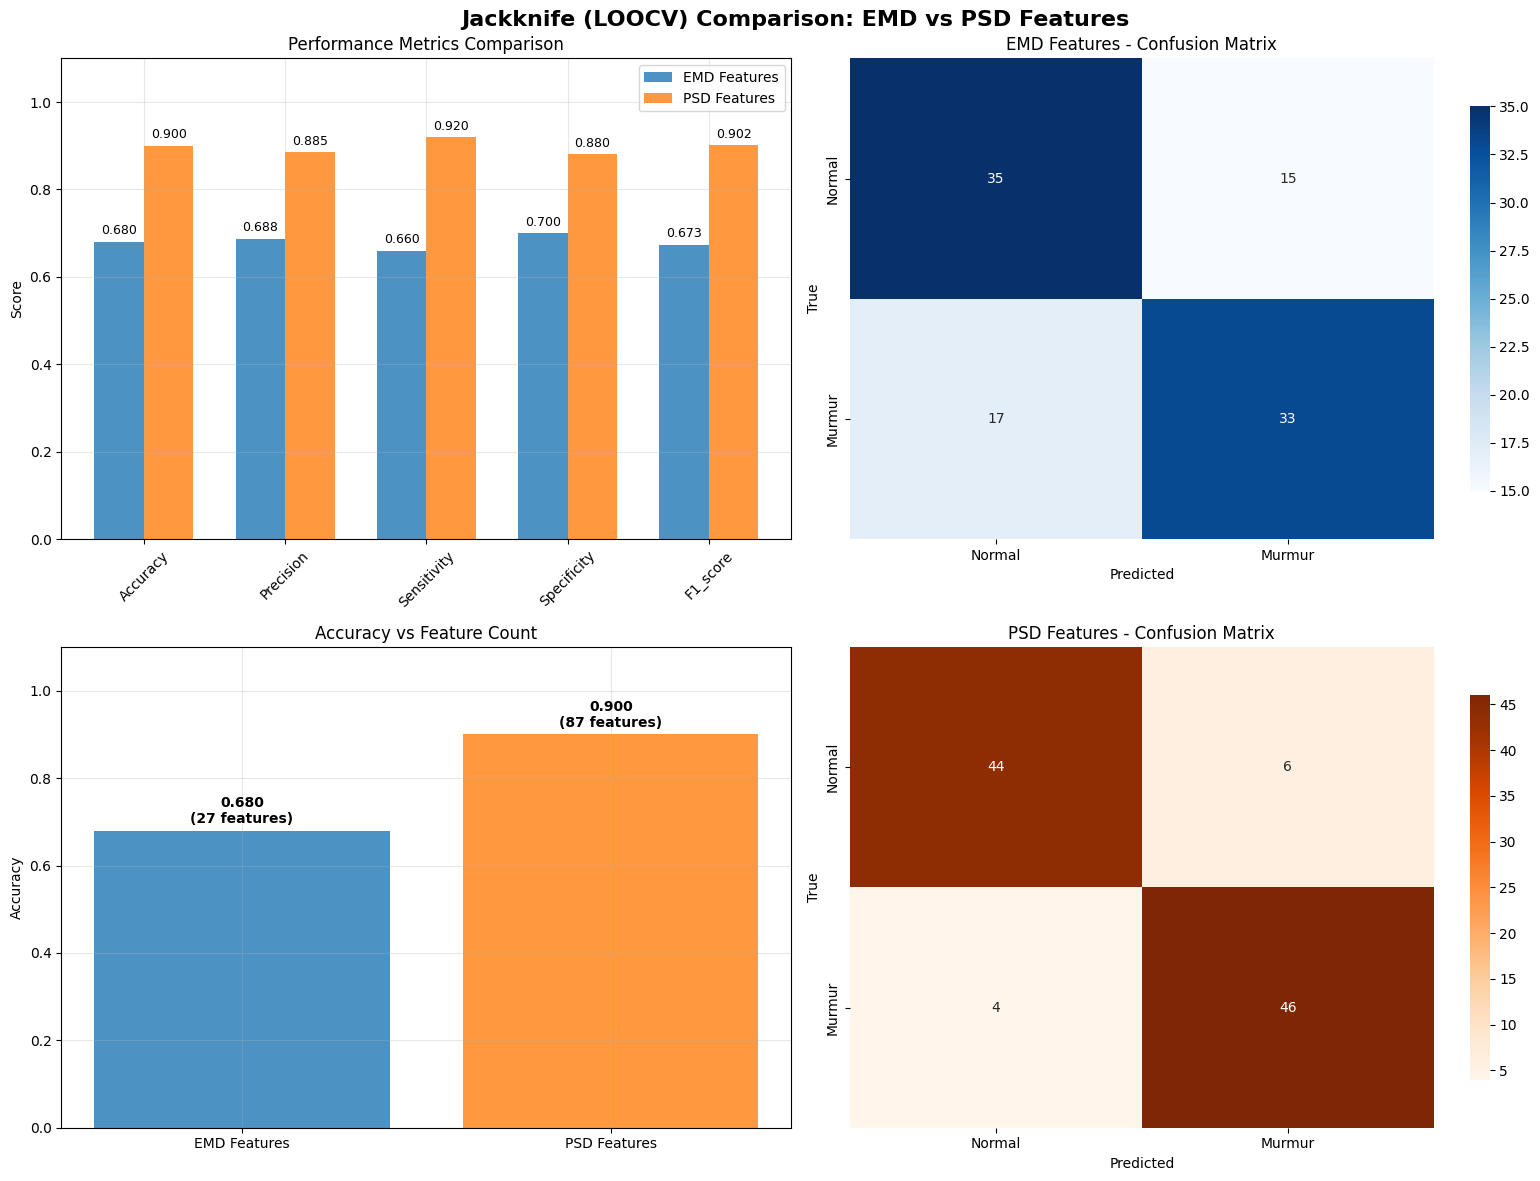

✅ Detailed results saved to: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/jackknife_emd_psd_comparison.csv

✅ JACKKNIFE COMPARISON ANALYSIS COMPLETED!
📊 Both EMD and PSD features tested with Leave-One-Out CV
🎯 Results show comparative performance metrics


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class JackknifeEMDPSDComparison:
    """
    Leave-One-Out Cross-Validation (Jackknife) untuk membandingkan
    performa EMD features vs PSD features dalam klasifikasi heart sound
    """

    def __init__(self, emd_file_path, psd_file_path):
        self.emd_file_path = emd_file_path
        self.psd_file_path = psd_file_path
        self.emd_data = None
        self.psd_data = None
        self.results = {}

        print("🔬 JACKKNIFE (LOOCV) COMPARISON: EMD vs PSD FEATURES")
        print("=" * 70)
        print(f"📊 EMD Features File: {emd_file_path}")
        print(f"📊 PSD Features File: {psd_file_path}")

    def load_datasets(self):
        """Load both EMD and PSD feature datasets"""

        print("\n📂 Loading datasets...")

        # Load EMD features
        try:
            if self.emd_file_path.endswith('.xlsx'):
                self.emd_data = pd.read_excel(self.emd_file_path)
            else:
                self.emd_data = pd.read_csv(self.emd_file_path)
            print(f"✅ EMD dataset loaded: {self.emd_data.shape}")
        except Exception as e:
            print(f"❌ Error loading EMD dataset: {e}")
            return False

        # Load PSD features
        try:
            if self.psd_file_path.endswith('.xlsx'):
                self.psd_data = pd.read_excel(self.psd_file_path)
            else:
                self.psd_data = pd.read_csv(self.psd_file_path)
            print(f"✅ PSD dataset loaded: {self.psd_data.shape}")
        except Exception as e:
            print(f"❌ Error loading PSD dataset: {e}")
            return False

        # Verify data consistency
        if len(self.emd_data) != len(self.psd_data):
            print(f"⚠️ Warning: Different number of samples - EMD: {len(self.emd_data)}, PSD: {len(self.psd_data)}")

        # Display dataset info
        print(f"\n📊 Dataset Information:")
        print(f"   • EMD Features: {self.emd_data.shape[0]} samples, {self.emd_data.shape[1]} columns")
        print(f"   • PSD Features: {self.psd_data.shape[0]} samples, {self.psd_data.shape[1]} columns")

        # Show label distribution for both datasets
        if 'label_text' in self.emd_data.columns:
            emd_labels = self.emd_data['label_text'].value_counts()
            print(f"\n📈 EMD Label Distribution: {emd_labels.to_dict()}")

        if 'label_text' in self.psd_data.columns:
            psd_labels = self.psd_data['label_text'].value_counts()
            print(f"📈 PSD Label Distribution: {psd_labels.to_dict()}")

        return True

    def prepare_features(self, dataset, feature_type):
        """Prepare feature matrix and labels from dataset"""

        # Define metadata columns to exclude
        metadata_cols = ['file_name', 'file_number', 'label', 'label_text']

        if feature_type == 'EMD':
            # EMD specific metadata columns
            additional_meta = ['sample_rate', 'signal_length', 'duration_seconds', 'num_imfs']
        else:  # PSD
            # PSD specific metadata columns
            additional_meta = ['duration', 'sample_rate', 'signal_length']

        # Get feature columns (exclude metadata)
        all_cols = set(dataset.columns)
        meta_cols = set(metadata_cols + additional_meta)
        feature_cols = list(all_cols - meta_cols)

        print(f"🎯 {feature_type} Feature Analysis:")
        print(f"   • Total columns: {len(dataset.columns)}")
        print(f"   • Metadata columns: {len(meta_cols)}")
        print(f"   • Feature columns: {len(feature_cols)}")
        print(f"   • Feature names (first 10): {feature_cols[:10]}")

        # Extract features and labels
        try:
            X = dataset[feature_cols].values

            # Handle labels
            if 'label' in dataset.columns:
                y_original = dataset['label'].values
                # Convert to binary: Normal(-1) -> 0, Murmur(1) -> 1
                y = np.where(y_original == -1, 0, 1)
            else:
                print(f"❌ No label column found in {feature_type} dataset")
                return None, None, None

            print(f"   • Feature matrix shape: {X.shape}")
            print(f"   • Labels shape: {y.shape}")
            print(f"   • Normal samples: {np.sum(y == 0)}")
            print(f"   • Murmur samples: {np.sum(y == 1)}")

            return X, y, feature_cols

        except Exception as e:
            print(f"❌ Error preparing {feature_type} features: {e}")
            return None, None, None

    def run_jackknife_classification(self, X, y, feature_type, file_numbers):
        """Run Leave-One-Out Cross-Validation for given features"""

        print(f"\n🚀 Starting Jackknife (LOOCV) for {feature_type} Features...")
        print(f"📋 Configuration:")
        print(f"   • Total samples: {len(X)}")
        print(f"   • Features per sample: {X.shape[1]}")
        print(f"   • Training per iteration: {len(X)-1} samples")
        print(f"   • Test per iteration: 1 sample")

        # Initialize LOOCV
        loo = LeaveOneOut()
        scaler = StandardScaler()

        # Initialize classifier
        classifier = RandomForestClassifier(
            n_estimators=100,
            random_state=42,
            max_depth=12,
            min_samples_split=5,
            min_samples_leaf=2,
            n_jobs=-1
        )

        # Storage for results
        y_true = []
        y_pred = []
        y_pred_proba = []
        iteration_details = []

        print(f"\n🔄 Running {len(X)} LOOCV iterations...")
        print("-" * 80)
        print(f"{'Iter':<5} {'File#':<6} {'True':<8} {'Pred':<8} {'Conf':<6} {'Status':<8}")
        print("-" * 80)

        # Run LOOCV
        for iteration, (train_idx, test_idx) in enumerate(loo.split(X), 1):

            # Get train and test data
            X_train, X_test = X[train_idx], X[test_idx]
            y_train, y_test = y[train_idx], y[test_idx]

            # Feature scaling
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Train classifier
            classifier.fit(X_train_scaled, y_train)

            # Make prediction
            prediction = classifier.predict(X_test_scaled)[0]
            prediction_proba = classifier.predict_proba(X_test_scaled)[0]
            confidence = np.max(prediction_proba)

            true_label = y_test[0]

            # Store results
            y_true.append(true_label)
            y_pred.append(prediction)
            y_pred_proba.append(prediction_proba)

            # File information
            file_num = file_numbers[test_idx[0]] if test_idx[0] < len(file_numbers) else test_idx[0]

            # Detailed result
            result = {
                'iteration': iteration,
                'test_index': test_idx[0],
                'file_number': file_num,
                'true_label': true_label,
                'true_text': 'Normal' if true_label == 0 else 'Murmur',
                'predicted_label': prediction,
                'predicted_text': 'Normal' if prediction == 0 else 'Murmur',
                'confidence': confidence,
                'correct': prediction == true_label
            }
            iteration_details.append(result)

            # Display progress
            if iteration <= 15 or iteration % 10 == 0 or iteration > len(X) - 10:
                status = "✅" if prediction == true_label else "❌"
                print(f"{iteration:<5} {file_num:<6} {result['true_text']:<8} "
                      f"{result['predicted_text']:<8} {confidence:.3f} {status:<8}")

        # Calculate metrics
        y_true = np.array(y_true)
        y_pred = np.array(y_pred)

        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
        recall = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
        f1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)

        # Confusion matrix
        cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

        # Store results
        results = {
            'feature_type': feature_type,
            'accuracy': accuracy,
            'precision': precision,
            'sensitivity': recall,
            'specificity': specificity,
            'f1_score': f1,
            'confusion_matrix': {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn},
            'y_true': y_true,
            'y_pred': y_pred,
            'y_pred_proba': np.array(y_pred_proba),
            'iteration_details': iteration_details,
            'misclassified': [d for d in iteration_details if not d['correct']],
            'total_samples': len(y_true),
            'num_features': X.shape[1]
        }

        return results

    def compare_feature_sets(self):
        """Compare performance of EMD vs PSD features"""

        print(f"\n🔬 COMPARATIVE JACKKNIFE ANALYSIS")
        print("=" * 70)

        # Prepare EMD features
        print(f"\n1️⃣ Preparing EMD Features...")
        X_emd, y_emd, emd_feature_names = self.prepare_features(self.emd_data, 'EMD')

        if X_emd is None:
            print("❌ Failed to prepare EMD features")
            return None

        # Get file numbers for EMD
        emd_file_numbers = self.emd_data['file_number'].values if 'file_number' in self.emd_data.columns else range(len(self.emd_data))

        # Prepare PSD features
        print(f"\n2️⃣ Preparing PSD Features...")
        X_psd, y_psd, psd_feature_names = self.prepare_features(self.psd_data, 'PSD')

        if X_psd is None:
            print("❌ Failed to prepare PSD features")
            return None

        # Get file numbers for PSD
        psd_file_numbers = self.psd_data['file_number'].values if 'file_number' in self.psd_data.columns else range(len(self.psd_data))

        # Run jackknife for EMD features
        print(f"\n" + "="*50)
        print(f"🧬 EMD FEATURES JACKKNIFE CLASSIFICATION")
        print(f"="*50)
        emd_results = self.run_jackknife_classification(X_emd, y_emd, 'EMD', emd_file_numbers)

        # Run jackknife for PSD features
        print(f"\n" + "="*50)
        print(f"🌊 PSD FEATURES JACKKNIFE CLASSIFICATION")
        print(f"="*50)
        psd_results = self.run_jackknife_classification(X_psd, y_psd, 'PSD', psd_file_numbers)

        # Store results
        self.results = {
            'EMD': emd_results,
            'PSD': psd_results
        }

        return self.results

    def display_comprehensive_results(self):
        """Display comprehensive comparison results"""

        if not self.results:
            print("❌ No results to display. Run comparison first!")
            return

        emd_results = self.results['EMD']
        psd_results = self.results['PSD']

        print("\n" + "="*80)
        print("📊 COMPREHENSIVE JACKKNIFE COMPARISON RESULTS")
        print("="*80)

        # Performance comparison table
        print(f"\n🎯 PERFORMANCE METRICS COMPARISON:")
        print("-" * 70)
        print(f"{'Metric':<20} {'EMD Features':<15} {'PSD Features':<15} {'Winner':<15}")
        print("-" * 70)

        metrics = [
            ('Accuracy', 'accuracy'),
            ('Precision', 'precision'),
            ('Sensitivity', 'sensitivity'),
            ('Specificity', 'specificity'),
            ('F1-Score', 'f1_score')
        ]

        winners = {}
        for metric_name, metric_key in metrics:
            emd_val = emd_results[metric_key]
            psd_val = psd_results[metric_key]

            if emd_val > psd_val:
                winner = "EMD"
                winner_symbol = "🧬"
            elif psd_val > emd_val:
                winner = "PSD"
                winner_symbol = "🌊"
            else:
                winner = "Tie"
                winner_symbol = "🤝"

            winners[metric_name] = winner

            print(f"{metric_name:<20} {emd_val:.4f}         {psd_val:.4f}         {winner_symbol} {winner}")

        # Feature count comparison
        print(f"\n🔢 FEATURE COUNT COMPARISON:")
        print(f"   • EMD Features: {emd_results['num_features']} features")
        print(f"   • PSD Features: {psd_results['num_features']} features")

        # Confusion matrices
        print(f"\n📊 CONFUSION MATRICES:")

        for feature_type in ['EMD', 'PSD']:
            results = self.results[feature_type]
            cm = results['confusion_matrix']

            print(f"\n   {feature_type} Features:")
            print(f"                 Predicted")
            print(f"               Normal  Murmur")
            print(f"   Actual Normal   {cm['TN']:3d}     {cm['FP']:3d}")
            print(f"          Murmur   {cm['FN']:3d}     {cm['TP']:3d}")

            print(f"   Metrics: TP={cm['TP']}, TN={cm['TN']}, FP={cm['FP']}, FN={cm['FN']}")

        # Misclassification analysis
        print(f"\n❌ MISCLASSIFICATION ANALYSIS:")

        for feature_type in ['EMD', 'PSD']:
            results = self.results[feature_type]
            misclassified = results['misclassified']

            print(f"\n   {feature_type} Features - {len(misclassified)} misclassified:")
            if misclassified:
                print(f"      {'File#':<6} {'True':<8} {'Predicted':<10} {'Confidence'}")
                for miss in misclassified[:10]:  # Show first 10
                    print(f"      {miss['file_number']:<6} {miss['true_text']:<8} "
                          f"{miss['predicted_text']:<10} {miss['confidence']:.3f}")
                if len(misclassified) > 10:
                    print(f"      ... and {len(misclassified)-10} more")
            else:
                print(f"      🎉 Perfect classification!")

        # Overall winner
        emd_wins = sum(1 for winner in winners.values() if winner == "EMD")
        psd_wins = sum(1 for winner in winners.values() if winner == "PSD")
        ties = sum(1 for winner in winners.values() if winner == "Tie")

        print(f"\n🏆 OVERALL COMPARISON WINNER:")
        print(f"   • EMD wins: {emd_wins} metrics")
        print(f"   • PSD wins: {psd_wins} metrics")
        print(f"   • Ties: {ties} metrics")

        if emd_wins > psd_wins:
            print(f"   🧬 EMD Features are the overall winner!")
        elif psd_wins > emd_wins:
            print(f"   🌊 PSD Features are the overall winner!")
        else:
            print(f"   🤝 It's a tie between EMD and PSD features!")

    def plot_comparison_results(self):
        """Create visualization comparing EMD vs PSD results"""

        if not self.results:
            print("❌ No results to plot!")
            return

        fig, axes = plt.subplots(2, 2, figsize=(16, 12))
        fig.suptitle('Jackknife (LOOCV) Comparison: EMD vs PSD Features', fontsize=16, fontweight='bold')

        # 1. Performance metrics comparison
        metrics = ['accuracy', 'precision', 'sensitivity', 'specificity', 'f1_score']
        emd_values = [self.results['EMD'][metric] for metric in metrics]
        psd_values = [self.results['PSD'][metric] for metric in metrics]

        x = np.arange(len(metrics))
        width = 0.35

        bars1 = axes[0,0].bar(x - width/2, emd_values, width, label='EMD Features', color='#1f77b4', alpha=0.8)
        bars2 = axes[0,0].bar(x + width/2, psd_values, width, label='PSD Features', color='#ff7f0e', alpha=0.8)

        axes[0,0].set_title('Performance Metrics Comparison')
        axes[0,0].set_ylabel('Score')
        axes[0,0].set_xticks(x)
        axes[0,0].set_xticklabels([m.capitalize() for m in metrics], rotation=45)
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].set_ylim(0, 1.1)

        # Add value labels on bars
        for bars in [bars1, bars2]:
            for bar in bars:
                height = bar.get_height()
                axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.01,
                              f'{height:.3f}', ha='center', va='bottom', fontsize=9)

        # 2. Confusion matrices
        for i, (feature_type, color) in enumerate([('EMD', 'Blues'), ('PSD', 'Oranges')]):
            cm_data = self.results[feature_type]['confusion_matrix']
            cm_matrix = np.array([[cm_data['TN'], cm_data['FP']],
                                 [cm_data['FN'], cm_data['TP']]])

            row = 0 if i == 0 else 1
            col = 1

            sns.heatmap(cm_matrix, annot=True, fmt='d', cmap=color,
                       xticklabels=['Normal', 'Murmur'], yticklabels=['Normal', 'Murmur'],
                       ax=axes[row, col], cbar_kws={'shrink': 0.8})
            axes[row, col].set_title(f'{feature_type} Features - Confusion Matrix')
            axes[row, col].set_xlabel('Predicted')
            axes[row, col].set_ylabel('True')

        # 3. Feature count and accuracy comparison
        feature_counts = [self.results['EMD']['num_features'], self.results['PSD']['num_features']]
        accuracies = [self.results['EMD']['accuracy'], self.results['PSD']['accuracy']]

        ax2 = axes[1,0]
        x_pos = [0, 1]
        bars = ax2.bar(x_pos, accuracies, color=['#1f77b4', '#ff7f0e'], alpha=0.8)

        # Add feature count as text
        for i, (acc, feat_count) in enumerate(zip(accuracies, feature_counts)):
            ax2.text(i, acc + 0.01, f'{acc:.3f}\n({feat_count} features)',
                    ha='center', va='bottom', fontweight='bold')

        ax2.set_title('Accuracy vs Feature Count')
        ax2.set_ylabel('Accuracy')
        ax2.set_xticks(x_pos)
        ax2.set_xticklabels(['EMD Features', 'PSD Features'])
        ax2.set_ylim(0, 1.1)
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

    def save_detailed_results(self, output_path):
        """Save detailed results to CSV"""

        if not self.results:
            print("❌ No results to save!")
            return

        try:
            # Combine results from both feature types
            all_results = []

            for feature_type in ['EMD', 'PSD']:
                results = self.results[feature_type]

                for detail in results['iteration_details']:
                    result_row = {
                        'feature_type': feature_type,
                        'iteration': detail['iteration'],
                        'file_number': detail['file_number'],
                        'true_label': detail['true_text'],
                        'predicted_label': detail['predicted_text'],
                        'confidence': detail['confidence'],
                        'correct': detail['correct']
                    }
                    all_results.append(result_row)

            # Create DataFrame and save
            df_results = pd.DataFrame(all_results)
            df_results.to_csv(output_path, index=False)

            print(f"✅ Detailed results saved to: {output_path}")

        except Exception as e:
            print(f"❌ Error saving results: {e}")

def main():
    """Main execution function"""

    # File paths
    emd_file = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv"
    psd_file = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv"

    try:
        # Initialize comparison
        comparator = JackknifeEMDPSDComparison(emd_file, psd_file)

        # Load datasets
        if not comparator.load_datasets():
            print("❌ Failed to load datasets!")
            return None

        # Run comparative analysis
        results = comparator.compare_feature_sets()

        if results:
            # Display results
            comparator.display_comprehensive_results()

            # Create visualizations
            print(f"\n📊 Generating comparison plots...")
            comparator.plot_comparison_results()

            # Save detailed results
            output_csv = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/jackknife_emd_psd_comparison.csv"
            comparator.save_detailed_results(output_csv)

            print(f"\n✅ JACKKNIFE COMPARISON ANALYSIS COMPLETED!")
            print(f"📊 Both EMD and PSD features tested with Leave-One-Out CV")
            print(f"🎯 Results show comparative performance metrics")

            return comparator, results
        else:
            print("❌ Comparison analysis failed!")
            return None

    except Exception as e:
        print(f"❌ Error in main execution: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    comparator, results = main()

🔬 COMBINED EMD + PSD FEATURES JACKKNIFE ANALYSIS
🧬 EMD Features: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv
🌊 PSD Features: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv
🔗 Combined: EMD + PSD Features

📂 Loading and merging datasets...
✅ EMD dataset loaded: (100, 35)
✅ PSD dataset loaded: (100, 94)
✅ Combined dataset created: (100, 118)
   • EMD features: 27 (prefixed with 'emd_')
   • PSD features: 87 (prefixed with 'psd_')
   • Total features: 114

📊 Label Distribution Verification:
   • EMD: {'Normal': 50, 'Murmur': 50}
   • Combined: {'Normal': 50, 'Murmur': 50}

🎯 Preparing feature sets...

📊 Feature Set Summary:
   • EMD: 27 features, 100 samples
     Description: EMD-based features only
   • PSD: 87 features, 100 samples
     Description: PSD-based features only
   • Combined: 114 features, 100 samples
     Description: EMD + PSD features combined
   • Combined_Selected: 50

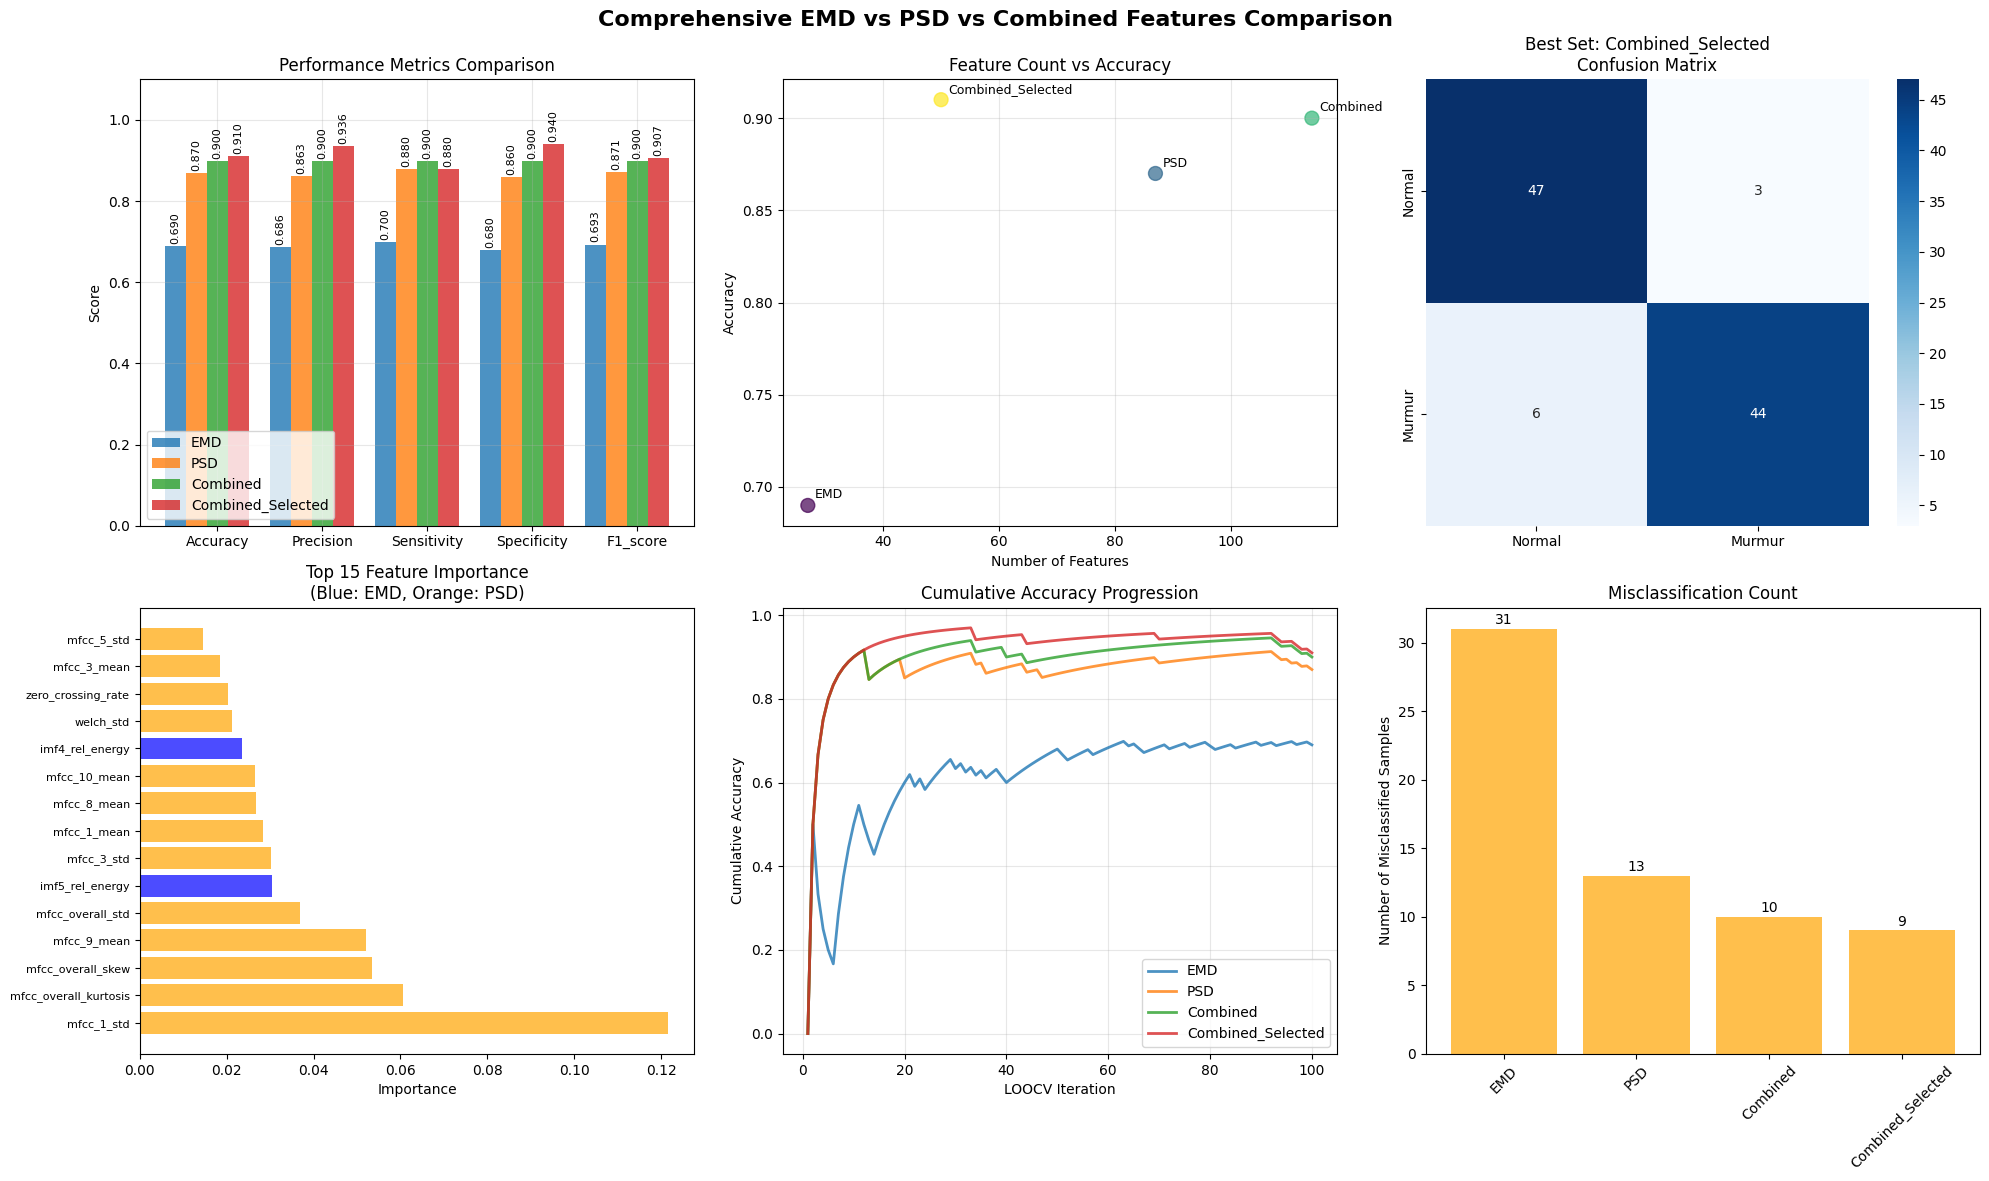

✅ Comprehensive results saved to: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/combined_emd_psd_jackknife_results.csv

✅ COMPREHENSIVE EMD + PSD ANALYSIS COMPLETED!
🔗 Combined features analysis shows potential synergistic effects
📊 Results compare EMD, PSD, Combined, and Feature-Selected approaches


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import LeaveOneOut
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class CombinedEMDPSDJackknife:
    """
    Combined EMD + PSD Features Analysis using Leave-One-Out Cross-Validation

    Menggabungkan fitur EMD dan PSD untuk mendapatkan representasi yang lebih lengkap
    dari sinyal heart sound dan membandingkan dengan fitur individual
    """

    def __init__(self, emd_file_path, psd_file_path):
        self.emd_file_path = emd_file_path
        self.psd_file_path = psd_file_path
        self.emd_data = None
        self.psd_data = None
        self.combined_data = None
        self.results = {}

        print("🔬 COMBINED EMD + PSD FEATURES JACKKNIFE ANALYSIS")
        print("=" * 70)
        print(f"🧬 EMD Features: {emd_file_path}")
        print(f"🌊 PSD Features: {psd_file_path}")
        print(f"🔗 Combined: EMD + PSD Features")

    def load_and_merge_datasets(self):
        """Load EMD and PSD datasets and create combined dataset"""

        print("\n📂 Loading and merging datasets...")

        # Load EMD features
        try:
            if self.emd_file_path.endswith('.xlsx'):
                self.emd_data = pd.read_excel(self.emd_file_path)
            else:
                self.emd_data = pd.read_csv(self.emd_file_path)
            print(f"✅ EMD dataset loaded: {self.emd_data.shape}")
        except Exception as e:
            print(f"❌ Error loading EMD dataset: {e}")
            return False

        # Load PSD features
        try:
            if self.psd_file_path.endswith('.xlsx'):
                self.psd_data = pd.read_excel(self.psd_file_path)
            else:
                self.psd_data = pd.read_csv(self.psd_file_path)
            print(f"✅ PSD dataset loaded: {self.psd_data.shape}")
        except Exception as e:
            print(f"❌ Error loading PSD dataset: {e}")
            return False

        # Merge datasets based on file_number
        try:
            # Ensure file_number is consistent
            emd_merge = self.emd_data[['file_number', 'label', 'label_text']].copy()
            psd_merge = self.psd_data[['file_number']].copy()

            # Get feature columns (excluding metadata)
            emd_meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'sample_rate',
                           'signal_length', 'duration_seconds', 'num_imfs']
            psd_meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'duration',
                           'sample_rate', 'signal_length']

            emd_features = [col for col in self.emd_data.columns if col not in emd_meta_cols]
            psd_features = [col for col in self.psd_data.columns if col not in psd_meta_cols]

            # Rename features to avoid conflicts
            emd_feature_data = self.emd_data[emd_features].copy()
            emd_feature_data.columns = [f'emd_{col}' for col in emd_features]

            psd_feature_data = self.psd_data[psd_features].copy()
            psd_feature_data.columns = [f'psd_{col}' for col in psd_features]

            # Combine all data
            self.combined_data = pd.concat([
                self.emd_data[['file_name', 'file_number', 'label', 'label_text']],
                emd_feature_data,
                psd_feature_data
            ], axis=1)

            print(f"✅ Combined dataset created: {self.combined_data.shape}")
            print(f"   • EMD features: {len(emd_features)} (prefixed with 'emd_')")
            print(f"   • PSD features: {len(psd_features)} (prefixed with 'psd_')")
            print(f"   • Total features: {len(emd_features) + len(psd_features)}")

            # Verify data consistency
            emd_labels = self.emd_data['label_text'].value_counts()
            combined_labels = self.combined_data['label_text'].value_counts()

            print(f"\n📊 Label Distribution Verification:")
            print(f"   • EMD: {emd_labels.to_dict()}")
            print(f"   • Combined: {combined_labels.to_dict()}")

            return True

        except Exception as e:
            print(f"❌ Error merging datasets: {e}")
            import traceback
            traceback.print_exc()
            return False

    def prepare_feature_sets(self):
        """Prepare EMD, PSD, and Combined feature sets"""

        print(f"\n🎯 Preparing feature sets...")

        feature_sets = {}

        # 1. EMD Features
        emd_meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'sample_rate',
                        'signal_length', 'duration_seconds', 'num_imfs']
        emd_feature_cols = [col for col in self.emd_data.columns if col not in emd_meta_cols]

        X_emd = self.emd_data[emd_feature_cols].values
        y_emd = np.where(self.emd_data['label'] == -1, 0, 1)
        file_numbers_emd = self.emd_data['file_number'].values

        feature_sets['EMD'] = {
            'X': X_emd,
            'y': y_emd,
            'feature_names': emd_feature_cols,
            'file_numbers': file_numbers_emd,
            'description': 'EMD-based features only'
        }

        # 2. PSD Features
        psd_meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'duration',
                        'sample_rate', 'signal_length']
        psd_feature_cols = [col for col in self.psd_data.columns if col not in psd_meta_cols]

        X_psd = self.psd_data[psd_feature_cols].values
        y_psd = np.where(self.psd_data['label'] == -1, 0, 1)
        file_numbers_psd = self.psd_data['file_number'].values

        feature_sets['PSD'] = {
            'X': X_psd,
            'y': y_psd,
            'feature_names': psd_feature_cols,
            'file_numbers': file_numbers_psd,
            'description': 'PSD-based features only'
        }

        # 3. Combined Features
        combined_meta_cols = ['file_name', 'file_number', 'label', 'label_text']
        combined_feature_cols = [col for col in self.combined_data.columns if col not in combined_meta_cols]

        X_combined = self.combined_data[combined_feature_cols].values
        y_combined = np.where(self.combined_data['label'] == -1, 0, 1)
        file_numbers_combined = self.combined_data['file_number'].values

        feature_sets['Combined'] = {
            'X': X_combined,
            'y': y_combined,
            'feature_names': combined_feature_cols,
            'file_numbers': file_numbers_combined,
            'description': 'EMD + PSD features combined'
        }

        # 4. Combined with Feature Selection
        try:
            # Select top 50 features using mutual information
            selector = SelectKBest(score_func=mutual_info_classif, k=min(50, len(combined_feature_cols)))
            X_combined_selected = selector.fit_transform(X_combined, y_combined)
            selected_features = np.array(combined_feature_cols)[selector.get_support()]

            feature_sets['Combined_Selected'] = {
                'X': X_combined_selected,
                'y': y_combined,
                'feature_names': selected_features.tolist(),
                'file_numbers': file_numbers_combined,
                'description': 'Top 50 EMD + PSD features (mutual info selection)'
            }
        except Exception as e:
            print(f"Warning: Feature selection failed: {e}")

        # Display summary
        print(f"\n📊 Feature Set Summary:")
        for name, data in feature_sets.items():
            print(f"   • {name}: {data['X'].shape[1]} features, {data['X'].shape[0]} samples")
            print(f"     Description: {data['description']}")

        return feature_sets

    def run_jackknife_analysis(self, feature_sets):
        """Run LOOCV analysis for all feature sets"""

        print(f"\n🚀 Starting Comprehensive Jackknife Analysis...")

        results = {}

        for set_name, feature_data in feature_sets.items():
            print(f"\n" + "="*60)
            print(f"🔄 PROCESSING: {set_name.upper()} FEATURES")
            print(f"="*60)
            print(f"📋 {feature_data['description']}")
            print(f"🎯 Features: {feature_data['X'].shape[1]}")
            print(f"📊 Samples: {feature_data['X'].shape[0]}")

            # Run LOOCV
            result = self._run_single_loocv(
                feature_data['X'],
                feature_data['y'],
                feature_data['file_numbers'],
                set_name
            )

            if result:
                result['feature_names'] = feature_data['feature_names']
                result['description'] = feature_data['description']
                results[set_name] = result

        self.results = results
        return results

    def _run_single_loocv(self, X, y, file_numbers, set_name):
        """Run LOOCV for a single feature set"""

        try:
            # Initialize LOOCV
            loo = LeaveOneOut()
            scaler = StandardScaler()

            # Classifier with optimized parameters for combined features
            if 'Combined' in set_name:
                classifier = RandomForestClassifier(
                    n_estimators=150,
                    max_depth=15,
                    min_samples_split=3,
                    min_samples_leaf=1,
                    max_features='sqrt',
                    random_state=42,
                    n_jobs=-1
                )
            else:
                classifier = RandomForestClassifier(
                    n_estimators=100,
                    max_depth=12,
                    min_samples_split=5,
                    min_samples_leaf=2,
                    random_state=42,
                    n_jobs=-1
                )

            # Storage
            y_true = []
            y_pred = []
            y_pred_proba = []
            iteration_details = []

            print(f"🔄 Running {len(X)} LOOCV iterations...")

            # Run LOOCV
            for iteration, (train_idx, test_idx) in enumerate(loo.split(X), 1):

                # Split data
                X_train, X_test = X[train_idx], X[test_idx]
                y_train, y_test = y[train_idx], y[test_idx]

                # Scale features
                X_train_scaled = scaler.fit_transform(X_train)
                X_test_scaled = scaler.transform(X_test)

                # Train and predict
                classifier.fit(X_train_scaled, y_train)
                prediction = classifier.predict(X_test_scaled)[0]
                prediction_proba = classifier.predict_proba(X_test_scaled)[0]

                true_label = y_test[0]
                confidence = np.max(prediction_proba)

                # Store results
                y_true.append(true_label)
                y_pred.append(prediction)
                y_pred_proba.append(prediction_proba)

                # Detailed result
                result = {
                    'iteration': iteration,
                    'file_number': file_numbers[test_idx[0]],
                    'true_label': true_label,
                    'predicted_label': prediction,
                    'confidence': confidence,
                    'correct': prediction == true_label
                }
                iteration_details.append(result)

                # Progress display
                if iteration <= 10 or iteration % 25 == 0 or iteration > len(X) - 5:
                    status = "✅" if prediction == true_label else "❌"
                    true_text = 'Normal' if true_label == 0 else 'Murmur'
                    pred_text = 'Normal' if prediction == 0 else 'Murmur'
                    print(f"   Iter {iteration:3d}: File {file_numbers[test_idx[0]]:3d} | "
                          f"{true_text} → {pred_text} | Conf: {confidence:.3f} | {status}")

            # Calculate metrics
            y_true = np.array(y_true)
            y_pred = np.array(y_pred)

            accuracy = accuracy_score(y_true, y_pred)
            precision = precision_score(y_true, y_pred, pos_label=1, zero_division=0)
            recall = recall_score(y_true, y_pred, pos_label=1, zero_division=0)
            f1 = f1_score(y_true, y_pred, pos_label=1, zero_division=0)

            # Confusion matrix
            cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

            # Feature importance (if available)
            try:
                feature_importance = classifier.feature_importances_
            except:
                feature_importance = None

            result = {
                'set_name': set_name,
                'accuracy': accuracy,
                'precision': precision,
                'sensitivity': recall,
                'specificity': specificity,
                'f1_score': f1,
                'confusion_matrix': {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn},
                'y_true': y_true,
                'y_pred': y_pred,
                'y_pred_proba': np.array(y_pred_proba),
                'iteration_details': iteration_details,
                'misclassified': [d for d in iteration_details if not d['correct']],
                'num_features': X.shape[1],
                'feature_importance': feature_importance
            }

            # Display immediate results
            print(f"\n📊 {set_name} Results:")
            print(f"   ✅ Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
            print(f"   🎯 Precision: {precision:.4f}")
            print(f"   🎪 Sensitivity: {recall:.4f}")
            print(f"   🛡️  Specificity: {specificity:.4f}")
            print(f"   🏆 F1-Score: {f1:.4f}")
            print(f"   ❌ Misclassified: {len(result['misclassified'])}/{len(y_true)}")

            return result

        except Exception as e:
            print(f"❌ Error in LOOCV for {set_name}: {e}")
            import traceback
            traceback.print_exc()
            return None

    def display_comprehensive_comparison(self):
        """Display comprehensive comparison of all feature sets"""

        if not self.results:
            print("❌ No results to display!")
            return

        print("\n" + "="*80)
        print("📊 COMPREHENSIVE FEATURE SET COMPARISON")
        print("="*80)

        # Performance comparison table
        print(f"\n🎯 PERFORMANCE METRICS COMPARISON:")
        print("-" * 90)
        print(f"{'Feature Set':<20} {'Features':<10} {'Accuracy':<10} {'Precision':<10} {'Sensitivity':<12} {'Specificity':<12} {'F1-Score':<10}")
        print("-" * 90)

        best_accuracy = 0
        best_set = ""

        for set_name, results in self.results.items():
            accuracy = results['accuracy']
            precision = results['precision']
            sensitivity = results['sensitivity']
            specificity = results['specificity']
            f1 = results['f1_score']
            num_features = results['num_features']

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_set = set_name

            print(f"{set_name:<20} {num_features:<10} {accuracy:<10.4f} {precision:<10.4f} "
                  f"{sensitivity:<12.4f} {specificity:<12.4f} {f1:<10.4f}")

        print("-" * 90)
        print(f"🏆 Best performing feature set: {best_set} (Accuracy: {best_accuracy:.4f})")

        # Detailed confusion matrices
        print(f"\n📊 CONFUSION MATRICES:")
        for set_name, results in self.results.items():
            cm = results['confusion_matrix']
            print(f"\n   {set_name} ({results['num_features']} features):")
            print(f"                 Predicted")
            print(f"               Normal  Murmur")
            print(f"   Actual Normal   {cm['TN']:3d}     {cm['FP']:3d}")
            print(f"          Murmur   {cm['FN']:3d}     {cm['TP']:3d}")

        # Misclassification analysis
        print(f"\n❌ MISCLASSIFICATION SUMMARY:")
        for set_name, results in self.results.items():
            misclassified = results['misclassified']
            print(f"   • {set_name}: {len(misclassified)} misclassified files")

            if len(misclassified) > 0:
                files = [str(m['file_number']) for m in misclassified[:10]]
                print(f"     Files: {', '.join(files)}" + ("..." if len(misclassified) > 10 else ""))

        # Feature importance analysis (for combined features)
        if 'Combined' in self.results and self.results['Combined']['feature_importance'] is not None:
            print(f"\n🔍 TOP 10 MOST IMPORTANT FEATURES (Combined):")
            importance = self.results['Combined']['feature_importance']
            feature_names = self.results['Combined']['feature_names']

            # Sort by importance
            indices = np.argsort(importance)[::-1]

            for i in range(min(10, len(indices))):
                idx = indices[i]
                feat_name = feature_names[idx]
                feat_type = "EMD" if feat_name.startswith('emd_') else "PSD"
                print(f"   {i+1:2d}. {feat_name:<35} {importance[idx]:.4f} ({feat_type})")

    def plot_comprehensive_comparison(self):
        """Create comprehensive visualization of all feature sets"""

        if not self.results:
            print("❌ No results to plot!")
            return

        fig, axes = plt.subplots(2, 3, figsize=(20, 12))
        fig.suptitle('Comprehensive EMD vs PSD vs Combined Features Comparison', fontsize=16, fontweight='bold')

        # 1. Performance metrics comparison
        metrics = ['accuracy', 'precision', 'sensitivity', 'specificity', 'f1_score']
        set_names = list(self.results.keys())

        x = np.arange(len(metrics))
        width = 0.2
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

        for i, set_name in enumerate(set_names):
            values = [self.results[set_name][metric] for metric in metrics]
            offset = (i - len(set_names)/2) * width
            bars = axes[0,0].bar(x + offset, values, width, label=set_name, color=colors[i % len(colors)], alpha=0.8)

            # Add value labels
            for bar, value in zip(bars, values):
                axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005,
                              f'{value:.3f}', ha='center', va='bottom', fontsize=8, rotation=90)

        axes[0,0].set_title('Performance Metrics Comparison')
        axes[0,0].set_ylabel('Score')
        axes[0,0].set_xticks(x)
        axes[0,0].set_xticklabels([m.capitalize() for m in metrics])
        axes[0,0].legend()
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].set_ylim(0, 1.1)

        # 2. Feature count vs Accuracy
        feature_counts = [self.results[name]['num_features'] for name in set_names]
        accuracies = [self.results[name]['accuracy'] for name in set_names]

        scatter = axes[0,1].scatter(feature_counts, accuracies,
                                   c=range(len(set_names)), cmap='viridis', s=100, alpha=0.7)

        for i, name in enumerate(set_names):
            axes[0,1].annotate(name, (feature_counts[i], accuracies[i]),
                              xytext=(5, 5), textcoords='offset points', fontsize=9)

        axes[0,1].set_title('Feature Count vs Accuracy')
        axes[0,1].set_xlabel('Number of Features')
        axes[0,1].set_ylabel('Accuracy')
        axes[0,1].grid(True, alpha=0.3)

        # 3. Confusion matrix for best performing set
        best_set = max(self.results.keys(), key=lambda k: self.results[k]['accuracy'])
        cm_data = self.results[best_set]['confusion_matrix']
        cm_matrix = np.array([[cm_data['TN'], cm_data['FP']],
                             [cm_data['FN'], cm_data['TP']]])

        sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='Blues',
                   xticklabels=['Normal', 'Murmur'], yticklabels=['Normal', 'Murmur'],
                   ax=axes[0,2])
        axes[0,2].set_title(f'Best Set: {best_set}\nConfusion Matrix')

        # 4. Feature importance (if available)
        if 'Combined' in self.results and self.results['Combined']['feature_importance'] is not None:
            importance = self.results['Combined']['feature_importance']
            feature_names = self.results['Combined']['feature_names']

            # Top 15 features
            indices = np.argsort(importance)[::-1][:15]
            top_importance = importance[indices]
            top_names = [feature_names[i] for i in indices]

            # Color by feature type
            colors = ['blue' if name.startswith('emd_') else 'orange' for name in top_names]

            bars = axes[1,0].barh(range(len(top_names)), top_importance, color=colors, alpha=0.7)
            axes[1,0].set_yticks(range(len(top_names)))
            axes[1,0].set_yticklabels([name.replace('emd_', '').replace('psd_', '') for name in top_names], fontsize=8)
            axes[1,0].set_title('Top 15 Feature Importance\n(Blue: EMD, Orange: PSD)')
            axes[1,0].set_xlabel('Importance')

        # 5. Accuracy progression
        for set_name in set_names:
            details = self.results[set_name]['iteration_details']
            cumulative_correct = np.cumsum([1 if d['correct'] else 0 for d in details])
            iterations = range(1, len(details) + 1)
            cumulative_accuracy = cumulative_correct / np.array(iterations)

            axes[1,1].plot(iterations, cumulative_accuracy, label=set_name, linewidth=2, alpha=0.8)

        axes[1,1].set_title('Cumulative Accuracy Progression')
        axes[1,1].set_xlabel('LOOCV Iteration')
        axes[1,1].set_ylabel('Cumulative Accuracy')
        axes[1,1].legend()
        axes[1,1].grid(True, alpha=0.3)

        # 6. Misclassification comparison
        misclass_counts = [len(self.results[name]['misclassified']) for name in set_names]

        bars = axes[1,2].bar(set_names, misclass_counts, color=colors[:len(set_names)], alpha=0.7)
        axes[1,2].set_title('Misclassification Count')
        axes[1,2].set_ylabel('Number of Misclassified Samples')
        axes[1,2].tick_params(axis='x', rotation=45)

        for bar, count in zip(bars, misclass_counts):
            axes[1,2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                          str(count), ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    def save_combined_results(self, output_path):
        """Save comprehensive results to CSV"""

        if not self.results:
            print("❌ No results to save!")
            return

        try:
            all_results = []

            for set_name, results in self.results.items():
                for detail in results['iteration_details']:
                    result_row = {
                        'feature_set': set_name,
                        'num_features': results['num_features'],
                        'iteration': detail['iteration'],
                        'file_number': detail['file_number'],
                        'true_label': 'Normal' if detail['true_label'] == 0 else 'Murmur',
                        'predicted_label': 'Normal' if detail['predicted_label'] == 0 else 'Murmur',
                        'confidence': detail['confidence'],
                        'correct': detail['correct'],
                        'accuracy': results['accuracy'],
                        'precision': results['precision'],
                        'sensitivity': results['sensitivity'],
                        'specificity': results['specificity'],
                        'f1_score': results['f1_score']
                    }
                    all_results.append(result_row)

            df_results = pd.DataFrame(all_results)
            df_results.to_csv(output_path, index=False)

            print(f"✅ Comprehensive results saved to: {output_path}")

        except Exception as e:
            print(f"❌ Error saving results: {e}")

def main():
    """Main execution function"""

    # File paths
    emd_file = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv"
    psd_file = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv"

    try:
        # Initialize analysis
        analyzer = CombinedEMDPSDJackknife(emd_file, psd_file)

        # Load and merge datasets
        if not analyzer.load_and_merge_datasets():
            print("❌ Failed to load and merge datasets!")
            return None

        # Prepare feature sets
        feature_sets = analyzer.prepare_feature_sets()

        if not feature_sets:
            print("❌ Failed to prepare feature sets!")
            return None

        # Run comprehensive analysis
        results = analyzer.run_jackknife_analysis(feature_sets)

        if results:
            # Display comprehensive comparison
            analyzer.display_comprehensive_comparison()

            # Create visualizations
            print(f"\n📊 Generating comprehensive comparison plots...")
            analyzer.plot_comprehensive_comparison()

            # Save results
            output_csv = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/combined_emd_psd_jackknife_results.csv"
            analyzer.save_combined_results(output_csv)

            print(f"\n✅ COMPREHENSIVE EMD + PSD ANALYSIS COMPLETED!")
            print(f"🔗 Combined features analysis shows potential synergistic effects")
            print(f"📊 Results compare EMD, PSD, Combined, and Feature-Selected approaches")

            return analyzer, results

        else:
            print("❌ Analysis failed!")
            return None

    except Exception as e:
        print(f"❌ Error in main execution: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    analyzer, results = main()

SATU SATU DENGAN FEATURE SELECTION

🧬 EMD FEATURES CLASSIFICATION SYSTEM
📊 EMD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv
📁 Output Folder: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/emd_classification_output

📂 Loading EMD features dataset...
✅ EMD dataset loaded: (100, 35)
📊 Dataset Information:
   • Total samples: 100
   • Total columns: 36
   • Label distribution: {'Normal': 50, 'Murmur': 50}

🎯 EMD Feature Selection (Multiple Runs Approach)...
   • Number of runs: 30
   • Top features per run: 25
   • Available EMD features: 27
   • Sample features: ['imf1_energy', 'imf1_mean', 'imf1_std', 'imf1_max', 'imf2_energy']...
🔧 Tuning Random Forest parameters...
   ✅ Best parameters: {'max_depth': np.int64(7), 'n_estimators': np.int64(30)}
   📊 Best CV score: 0.6917
🔧 Tuning Random Forest parameters...
   ✅ Best parameters: {'max_depth': np.int64(9), 'n_estimators': np.int64(50)}
   📊 Best CV score: 0.7294
🔧 Tuning Random Forest para

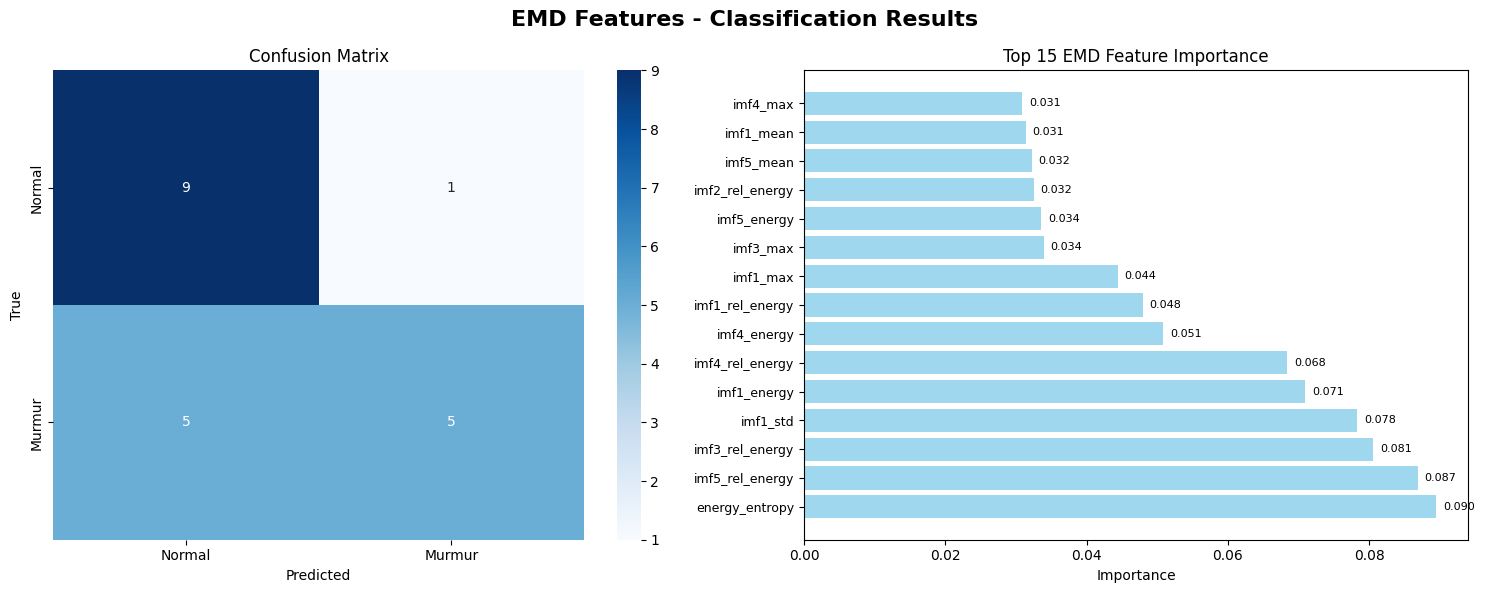


✅ EMD FEATURES CLASSIFICATION COMPLETED!
🧬 EMD features show classification performance as displayed above


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class EMDFeaturesClassifier:
    """
    EMD Features Classification with Feature Selection and Parameter Tuning

    Implements the same approach as the reference code but specifically for EMD features
    """

    def __init__(self, emd_features_path, output_folder="./output"):
        self.emd_features_path = emd_features_path
        self.output_folder = output_folder
        self.data = None
        self.selected_features = None
        self.best_model = None

        print("🧬 EMD FEATURES CLASSIFICATION SYSTEM")
        print("=" * 60)
        print(f"📊 EMD Features File: {emd_features_path}")
        print(f"📁 Output Folder: {output_folder}")

    def load_data(self):
        """Load EMD features dataset"""

        print("\n📂 Loading EMD features dataset...")

        try:
            if self.emd_features_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.emd_features_path)
            else:
                self.data = pd.read_csv(self.emd_features_path)

            print(f"✅ EMD dataset loaded: {self.data.shape}")

            # Prepare labels (convert -1 to 0 for Normal, keep 1 for Murmur)
            if 'label' in self.data.columns:
                self.data['Labels'] = np.where(self.data['label'] == -1, 0, 1)
            else:
                print("❌ No label column found!")
                return False

            # Display dataset info
            print(f"📊 Dataset Information:")
            print(f"   • Total samples: {len(self.data)}")
            print(f"   • Total columns: {len(self.data.columns)}")

            if 'label_text' in self.data.columns:
                label_dist = self.data['label_text'].value_counts()
                print(f"   • Label distribution: {label_dist.to_dict()}")

            return True

        except Exception as e:
            print(f"❌ Error loading EMD dataset: {e}")
            return False

    def parameter_tuning(self, X, y):
        """
        Find optimal parameters for Random Forest using GridSearchCV
        """

        print(f"🔧 Tuning Random Forest parameters...")

        try:
            # Define parameter search space
            estimators = np.arange(10, 60, 20)
            max_depth = np.arange(1, 10, 2)

            # Use stratified K-fold
            cvs = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            params = [{'n_estimators': estimators, 'max_depth': max_depth}]

            # Initialize Random Forest with balanced class weights
            rf = RandomForestClassifier(class_weight='balanced', random_state=42)

            # Grid search for optimal parameters
            gsvm = GridSearchCV(
                estimator=rf,
                param_grid=params,
                cv=cvs,
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )

            gsvm.fit(X, y)

            print(f"   ✅ Best parameters: {gsvm.best_params_}")
            print(f"   📊 Best CV score: {gsvm.best_score_:.4f}")

            return gsvm.best_params_

        except Exception as e:
            print(f"❌ Parameter tuning failed: {e}")
            # Return default parameters
            return {'n_estimators': 30, 'max_depth': 5}

    def feature_selection(self, y_name='Labels', n_runs=50, top_k=30):
        """
        Perform feature selection using Random Forest feature importance
        Multiple runs to reduce randomness
        """

        print(f"\n🎯 EMD Feature Selection (Multiple Runs Approach)...")
        print(f"   • Number of runs: {n_runs}")
        print(f"   • Top features per run: {top_k}")

        # Get feature columns (exclude metadata)
        meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'Labels',
                    'sample_rate', 'signal_length', 'duration_seconds', 'num_imfs']

        feature_columns = [col for col in self.data.columns if col not in meta_cols]

        print(f"   • Available EMD features: {len(feature_columns)}")
        print(f"   • Sample features: {feature_columns[:5]}...")

        feature_sets = []

        for run in range(n_runs):
            try:
                # Shuffle data for each run
                shuffled_data = self.data.sample(frac=1, random_state=run).reset_index(drop=True)

                X = shuffled_data[feature_columns]
                y = shuffled_data[y_name]

                # Get optimal parameters for this run
                rf_params = self.parameter_tuning(X, y)

                # Train Random Forest for feature importance
                rf_feat_select = RandomForestClassifier(
                    n_estimators=rf_params['n_estimators'],
                    max_depth=rf_params['max_depth'],
                    class_weight='balanced',
                    random_state=run
                )

                rf_feat_select.fit(X, y)

                # Get feature importances
                feature_importance = list(zip(rf_feat_select.feature_importances_, feature_columns))
                feature_importance.sort(reverse=True)

                # Extract top features
                top_features = [feat_name for _, feat_name in feature_importance[:top_k]]
                feature_sets.append(set(top_features))

                # Progress indicator
                if (run + 1) % 10 == 0:
                    print(f"   🔄 Completed {run + 1}/{n_runs} runs")

            except Exception as e:
                print(f"   ⚠️ Run {run + 1} failed: {e}")
                continue

        # Take union of all selected features
        if feature_sets:
            selected_features = list(set.union(*feature_sets))
            print(f"\n✅ EMD Feature Selection Results:")
            print(f"   • Selected features: {len(selected_features)}")
            print(f"   • Reduction: {len(feature_columns)} → {len(selected_features)}")
            print(f"   • Top 10 features: {selected_features[:10]}")

            self.selected_features = selected_features
            return selected_features
        else:
            print(f"❌ Feature selection failed, using all features")
            self.selected_features = feature_columns
            return feature_columns

    def undersampling(self, X, y, majority_class=0, minority_class=1, balance_ratio=1.0):
        """
        Undersample majority class to balance dataset
        """

        print(f"\n⚖️ Balancing EMD dataset...")

        # Count classes
        unique, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique, counts))

        print(f"   • Original distribution: {class_counts}")

        # Identify majority and minority classes
        maj_count = class_counts.get(majority_class, 0)
        min_count = class_counts.get(minority_class, 0)

        if maj_count <= min_count:
            print(f"   ✅ Dataset already balanced")
            return X, y

        # Calculate target counts
        target_maj_count = int(min_count * balance_ratio)

        # Get indices for each class
        maj_indices = np.where(y == majority_class)[0]
        min_indices = np.where(y == minority_class)[0]

        # Randomly sample from majority class
        np.random.seed(42)
        sampled_maj_indices = np.random.choice(maj_indices, target_maj_count, replace=False)

        # Combine indices
        balanced_indices = np.concatenate([sampled_maj_indices, min_indices])
        np.random.shuffle(balanced_indices)

        X_balanced = X[balanced_indices]
        y_balanced = y[balanced_indices]

        # Count after balancing
        unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
        balanced_counts = dict(zip(unique_bal, counts_bal))

        print(f"   • Balanced distribution: {balanced_counts}")
        print(f"   • Total samples: {len(y)} → {len(y_balanced)}")

        return X_balanced, y_balanced

    def train_cross_validation(self, y_name='Labels'):
        """
        Train model with 5-fold cross-validation
        """

        print(f"\n🚀 EMD Features Cross-Validation Training...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.data[self.selected_features].values
        y = self.data[y_name].values

        # Apply undersampling
        X_balanced, y_balanced = self.undersampling(X, y)

        # 5-fold stratified cross-validation
        cv_splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

        precision_scores = []
        recall_scores = []
        f1_scores = []
        accuracy_scores = []

        print(f"   🔄 Running 5-fold cross-validation...")

        fold = 1
        for train_idx, val_idx in cv_splitter.split(X_balanced, y_balanced):

            X_train_fold, X_val_fold = X_balanced[train_idx], X_balanced[val_idx]
            y_train_fold, y_val_fold = y_balanced[train_idx], y_balanced[val_idx]

            # Feature scaling
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_val_scaled = scaler.transform(X_val_fold)

            # Get optimal parameters
            rf_params = self.parameter_tuning(X_train_scaled, y_train_fold)

            # Train Random Forest
            rf_model = RandomForestClassifier(
                n_estimators=rf_params['n_estimators'],
                max_depth=rf_params['max_depth'],
                class_weight='balanced',
                random_state=42,
                n_jobs=-1
            )

            rf_model.fit(X_train_scaled, y_train_fold)

            # Predict on validation set
            y_pred = rf_model.predict(X_val_scaled)

            # Calculate metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                y_val_fold, y_pred, pos_label=1, average='binary', zero_division=0
            )
            accuracy = accuracy_score(y_val_fold, y_pred)

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            accuracy_scores.append(accuracy)

            print(f"   Fold {fold}: Acc={accuracy:.4f}, Prec={precision:.4f}, Rec={recall:.4f}, F1={f1:.4f}")
            fold += 1

        # Calculate average scores
        results = {
            'accuracy': np.mean(accuracy_scores),
            'precision': np.mean(precision_scores),
            'recall': np.mean(recall_scores),
            'f1_score': np.mean(f1_scores),
            'accuracy_std': np.std(accuracy_scores),
            'precision_std': np.std(precision_scores),
            'recall_std': np.std(recall_scores),
            'f1_std': np.std(f1_scores)
        }

        return results

    def train_test_split_evaluation(self, test_size=0.2, y_name='Labels'):
        """
        Train model with train-test split evaluation
        """

        print(f"\n🎯 EMD Features Train-Test Split Evaluation...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.data[self.selected_features].values
        y = self.data[y_name].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        print(f"   📊 Data split: Train={len(X_train)}, Test={len(X_test)}")

        # Apply undersampling to training data only
        X_train_balanced, y_train_balanced = self.undersampling(X_train, y_train)

        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_balanced)
        X_test_scaled = scaler.transform(X_test)

        # Get optimal parameters
        rf_params = self.parameter_tuning(X_train_scaled, y_train_balanced)

        # Train final model
        self.best_model = RandomForestClassifier(
            n_estimators=rf_params['n_estimators'],
            max_depth=rf_params['max_depth'],
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        self.best_model.fit(X_train_scaled, y_train_balanced)

        # Predict on test set
        y_pred = self.best_model.predict(X_test_scaled)
        y_pred_proba = self.best_model.predict_proba(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, pos_label=1, average='binary', zero_division=0
        )

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': cm,
            'y_true': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'feature_importance': self.best_model.feature_importances_,
            'scaler': scaler
        }

        return results

    def plot_results(self, results, title_prefix="EMD Features"):
        """
        Plot confusion matrix and feature importance
        """

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'{title_prefix} - Classification Results', fontsize=16, fontweight='bold')

        # 1. Confusion Matrix
        if 'confusion_matrix' in results:
            cm = results['confusion_matrix']
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=['Normal', 'Murmur'], yticklabels=['Normal', 'Murmur'],
                       ax=axes[0])
            axes[0].set_title('Confusion Matrix')
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('True')

        # 2. Feature Importance (Top 15)
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Get top 15 features
            indices = np.argsort(importance)[::-1][:15]
            top_importance = importance[indices]
            top_names = [feature_names[i] for i in indices]

            bars = axes[1].barh(range(len(top_names)), top_importance, color='skyblue', alpha=0.8)
            axes[1].set_yticks(range(len(top_names)))
            axes[1].set_yticklabels(top_names, fontsize=9)
            axes[1].set_title('Top 15 EMD Feature Importance')
            axes[1].set_xlabel('Importance')

            # Add value labels
            for i, (bar, val) in enumerate(zip(bars, top_importance)):
                axes[1].text(val + 0.001, bar.get_y() + bar.get_height()/2,
                           f'{val:.3f}', va='center', fontsize=8)

        plt.tight_layout()
        plt.show()

    def display_results(self, results, evaluation_type="Cross-Validation"):
        """
        Display comprehensive results
        """

        print(f"\n📊 EMD FEATURES {evaluation_type.upper()} RESULTS")
        print("=" * 60)

        if evaluation_type == "Cross-Validation":
            print(f"🎯 5-Fold Cross-Validation Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f} ± {results['accuracy_std']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f} ± {results['precision_std']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f} ± {results['recall_std']:.4f}")
            print(f"   • F1-Score:   {results['f1_score']:.4f} ± {results['f1_std']:.4f}")

        else:  # Train-Test Split
            print(f"🎯 Train-Test Split Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f}")
            print(f"   • F1-Score:   {results['f1_score']:.4f}")

            if 'confusion_matrix' in results:
                cm = results['confusion_matrix']
                tn, fp, fn, tp = cm.ravel()
                specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

                print(f"\n📋 Detailed Confusion Matrix:")
                print(f"   • True Negatives:  {tn}")
                print(f"   • False Positives: {fp}")
                print(f"   • False Negatives: {fn}")
                print(f"   • True Positives:  {tp}")
                print(f"   • Specificity:     {specificity:.4f}")

        print(f"\n🧬 EMD Feature Analysis:")
        print(f"   • Selected features: {len(self.selected_features) if self.selected_features else 0}")
        print(f"   • Feature selection method: Multi-run Random Forest importance")
        print(f"   • Classifier: Random Forest with parameter tuning")

def main():
    """
    Main execution function for EMD features classification
    """

    # Configuration
    emd_features_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv"
    output_folder = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/emd_classification_output"

    try:
        # Initialize EMD classifier
        emd_classifier = EMDFeaturesClassifier(emd_features_path, output_folder)

        # Load data
        if not emd_classifier.load_data():
            print("❌ Failed to load EMD data!")
            return None

        # Feature selection
        selected_features = emd_classifier.feature_selection(n_runs=30, top_k=25)

        if not selected_features:
            print("❌ Feature selection failed!")
            return None

        print(f"\n🔄 Choose evaluation method:")
        print(f"1. Cross-Validation (5-fold)")
        print(f"2. Train-Test Split")

        # Run both evaluations
        print(f"\n" + "="*60)
        print(f"🔄 RUNNING BOTH EVALUATION METHODS")
        print(f"="*60)

        # 1. Cross-validation
        cv_results = emd_classifier.train_cross_validation()

        if cv_results:
            emd_classifier.display_results(cv_results, "Cross-Validation")

        # 2. Train-test split
        test_results = emd_classifier.train_test_split_evaluation(test_size=0.2)

        if test_results:
            emd_classifier.display_results(test_results, "Train-Test Split")

            # Plot results
            print(f"\n📊 Generating visualizations...")
            emd_classifier.plot_results(test_results)

        print(f"\n✅ EMD FEATURES CLASSIFICATION COMPLETED!")
        print(f"🧬 EMD features show classification performance as displayed above")

        return emd_classifier, cv_results, test_results

    except Exception as e:
        print(f"❌ Error in EMD classification: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    emd_classifier, cv_results, test_results = main()

🧬 EMD FEATURES CLASSIFICATION SYSTEM
📊 EMD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv
📁 Output Folder: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/emd_classification_output

📂 Loading EMD features dataset...
✅ EMD dataset loaded: (100, 35)
📊 Dataset Information:
   • Total samples: 100
   • Total columns: 36
   • Label distribution: {'Normal': 50, 'Murmur': 50}

🎯 EMD Feature Selection (Multiple Runs Approach)...
   • Number of runs: 30
   • Top features per run: 25
   • Available EMD features: 27
   • Sample features: ['imf1_energy', 'imf1_mean', 'imf1_std', 'imf1_max', 'imf2_energy']...
🔧 Tuning Random Forest parameters...
   ✅ Best parameters: {'max_depth': np.int64(7), 'n_estimators': np.int64(30)}
   📊 Best CV score: 0.6917
🔧 Tuning Random Forest parameters...
   ✅ Best parameters: {'max_depth': np.int64(9), 'n_estimators': np.int64(50)}
   📊 Best CV score: 0.7294
🔧 Tuning Random Forest para

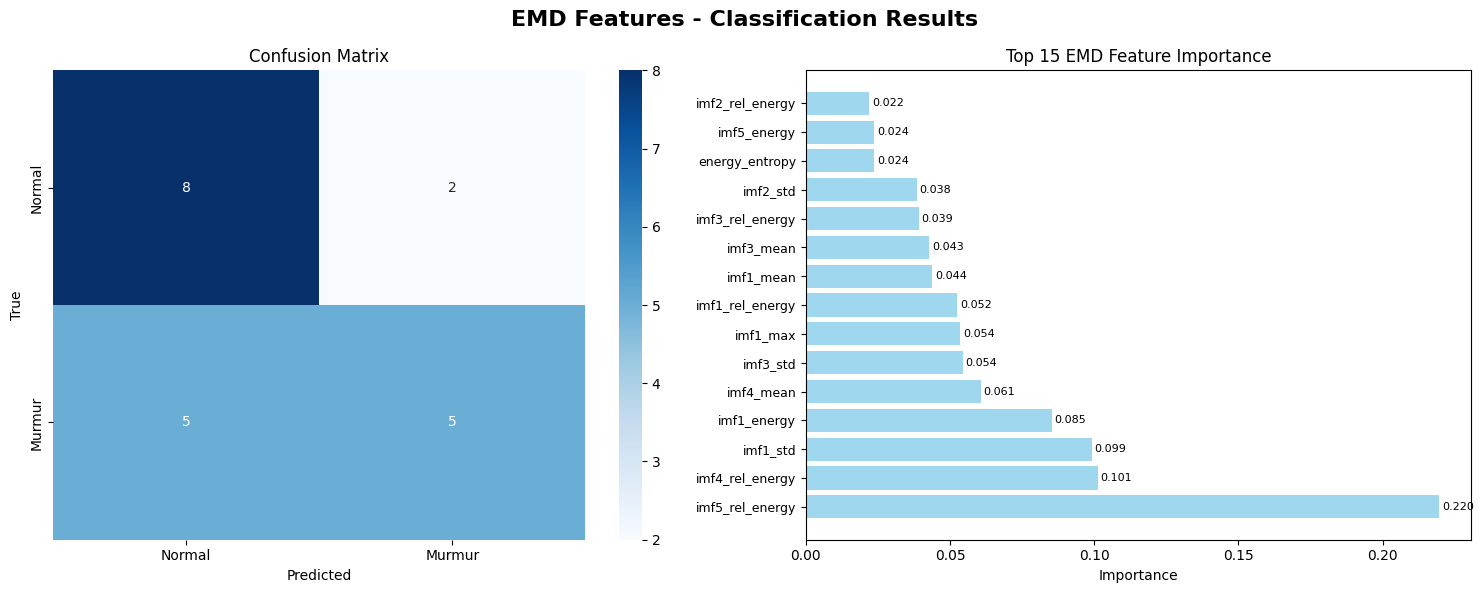


✅ EMD FEATURES CLASSIFICATION COMPLETED!
🧬 EMD features show classification performance as displayed above


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class EMDFeaturesClassifier:
    """
    EMD Features Classification with Feature Selection and Parameter Tuning
    Enhanced with Specificity calculations for both 5-fold CV and train-test split

    Implements the same approach as the reference code but specifically for EMD features
    """

    def __init__(self, emd_features_path, output_folder="./output"):
        self.emd_features_path = emd_features_path
        self.output_folder = output_folder
        self.data = None
        self.selected_features = None
        self.best_model = None

        print("🧬 EMD FEATURES CLASSIFICATION SYSTEM")
        print("=" * 60)
        print(f"📊 EMD Features File: {emd_features_path}")
        print(f"📁 Output Folder: {output_folder}")

    def calculate_specificity(self, y_true, y_pred):
        """
        Calculate specificity (True Negative Rate)
        Specificity = TN / (TN + FP)
        """
        cm = confusion_matrix(y_true, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        else:
            specificity = 0
        return specificity

    def load_data(self):
        """Load EMD features dataset"""

        print("\n📂 Loading EMD features dataset...")

        try:
            if self.emd_features_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.emd_features_path)
            else:
                self.data = pd.read_csv(self.emd_features_path)

            print(f"✅ EMD dataset loaded: {self.data.shape}")

            # Prepare labels (convert -1 to 0 for Normal, keep 1 for Murmur)
            if 'label' in self.data.columns:
                self.data['Labels'] = np.where(self.data['label'] == -1, 0, 1)
            else:
                print("❌ No label column found!")
                return False

            # Display dataset info
            print(f"📊 Dataset Information:")
            print(f"   • Total samples: {len(self.data)}")
            print(f"   • Total columns: {len(self.data.columns)}")

            if 'label_text' in self.data.columns:
                label_dist = self.data['label_text'].value_counts()
                print(f"   • Label distribution: {label_dist.to_dict()}")

            return True

        except Exception as e:
            print(f"❌ Error loading EMD dataset: {e}")
            return False

    def parameter_tuning(self, X, y):
        """
        Find optimal parameters for Random Forest using GridSearchCV
        """

        print(f"🔧 Tuning Random Forest parameters...")

        try:
            # Define parameter search space
            estimators = np.arange(10, 60, 20)
            max_depth = np.arange(1, 10, 2)

            # Use stratified K-fold
            cvs = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            params = [{'n_estimators': estimators, 'max_depth': max_depth}]

            # Initialize Random Forest with balanced class weights
            rf = RandomForestClassifier(class_weight='balanced', random_state=42)

            # Grid search for optimal parameters
            gsvm = GridSearchCV(
                estimator=rf,
                param_grid=params,
                cv=cvs,
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )

            gsvm.fit(X, y)

            print(f"   ✅ Best parameters: {gsvm.best_params_}")
            print(f"   📊 Best CV score: {gsvm.best_score_:.4f}")

            return gsvm.best_params_

        except Exception as e:
            print(f"❌ Parameter tuning failed: {e}")
            # Return default parameters
            return {'n_estimators': 30, 'max_depth': 5}

    def feature_selection(self, y_name='Labels', n_runs=50, top_k=30):
        """
        Perform feature selection using Random Forest feature importance
        Multiple runs to reduce randomness
        """

        print(f"\n🎯 EMD Feature Selection (Multiple Runs Approach)...")
        print(f"   • Number of runs: {n_runs}")
        print(f"   • Top features per run: {top_k}")

        # Get feature columns (exclude metadata)
        meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'Labels',
                    'sample_rate', 'signal_length', 'duration_seconds', 'num_imfs']

        feature_columns = [col for col in self.data.columns if col not in meta_cols]

        print(f"   • Available EMD features: {len(feature_columns)}")
        print(f"   • Sample features: {feature_columns[:5]}...")

        feature_sets = []

        for run in range(n_runs):
            try:
                # Shuffle data for each run
                shuffled_data = self.data.sample(frac=1, random_state=run).reset_index(drop=True)

                X = shuffled_data[feature_columns]
                y = shuffled_data[y_name]

                # Get optimal parameters for this run
                rf_params = self.parameter_tuning(X, y)

                # Train Random Forest for feature importance
                rf_feat_select = RandomForestClassifier(
                    n_estimators=rf_params['n_estimators'],
                    max_depth=rf_params['max_depth'],
                    class_weight='balanced',
                    random_state=run
                )

                rf_feat_select.fit(X, y)

                # Get feature importances
                feature_importance = list(zip(rf_feat_select.feature_importances_, feature_columns))
                feature_importance.sort(reverse=True)

                # Extract top features
                top_features = [feat_name for _, feat_name in feature_importance[:top_k]]
                feature_sets.append(set(top_features))

                # Progress indicator
                if (run + 1) % 10 == 0:
                    print(f"   🔄 Completed {run + 1}/{n_runs} runs")

            except Exception as e:
                print(f"   ⚠️ Run {run + 1} failed: {e}")
                continue

        # Take union of all selected features
        if feature_sets:
            selected_features = list(set.union(*feature_sets))
            print(f"\n✅ EMD Feature Selection Results:")
            print(f"   • Selected features: {len(selected_features)}")
            print(f"   • Reduction: {len(feature_columns)} → {len(selected_features)}")
            print(f"   • Top 10 features: {selected_features[:10]}")

            self.selected_features = selected_features
            return selected_features
        else:
            print(f"❌ Feature selection failed, using all features")
            self.selected_features = feature_columns
            return feature_columns

    def undersampling(self, X, y, majority_class=0, minority_class=1, balance_ratio=1.0):
        """
        Undersample majority class to balance dataset
        """

        print(f"\n⚖️ Balancing EMD dataset...")

        # Count classes
        unique, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique, counts))

        print(f"   • Original distribution: {class_counts}")

        # Identify majority and minority classes
        maj_count = class_counts.get(majority_class, 0)
        min_count = class_counts.get(minority_class, 0)

        if maj_count <= min_count:
            print(f"   ✅ Dataset already balanced")
            return X, y

        # Calculate target counts
        target_maj_count = int(min_count * balance_ratio)

        # Get indices for each class
        maj_indices = np.where(y == majority_class)[0]
        min_indices = np.where(y == minority_class)[0]

        # Randomly sample from majority class
        np.random.seed(42)
        sampled_maj_indices = np.random.choice(maj_indices, target_maj_count, replace=False)

        # Combine indices
        balanced_indices = np.concatenate([sampled_maj_indices, min_indices])
        np.random.shuffle(balanced_indices)

        X_balanced = X[balanced_indices]
        y_balanced = y[balanced_indices]

        # Count after balancing
        unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
        balanced_counts = dict(zip(unique_bal, counts_bal))

        print(f"   • Balanced distribution: {balanced_counts}")
        print(f"   • Total samples: {len(y)} → {len(y_balanced)}")

        return X_balanced, y_balanced

    def train_cross_validation(self, y_name='Labels'):
        """
        Train model with 5-fold cross-validation
        Enhanced with specificity calculation
        """

        print(f"\n🚀 EMD Features Cross-Validation Training...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.data[self.selected_features].values
        y = self.data[y_name].values

        # Apply undersampling
        X_balanced, y_balanced = self.undersampling(X, y)

        # 5-fold stratified cross-validation
        cv_splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

        precision_scores = []
        recall_scores = []
        f1_scores = []
        accuracy_scores = []
        specificity_scores = []  # Added specificity tracking

        print(f"   🔄 Running 5-fold cross-validation...")

        fold = 1
        for train_idx, val_idx in cv_splitter.split(X_balanced, y_balanced):

            X_train_fold, X_val_fold = X_balanced[train_idx], X_balanced[val_idx]
            y_train_fold, y_val_fold = y_balanced[train_idx], y_balanced[val_idx]

            # Feature scaling
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_val_scaled = scaler.transform(X_val_fold)

            # Get optimal parameters
            rf_params = self.parameter_tuning(X_train_scaled, y_train_fold)

            # Train Random Forest
            rf_model = RandomForestClassifier(
                n_estimators=rf_params['n_estimators'],
                max_depth=rf_params['max_depth'],
                class_weight='balanced',
                random_state=42,
                n_jobs=-1
            )

            rf_model.fit(X_train_scaled, y_train_fold)

            # Predict on validation set
            y_pred = rf_model.predict(X_val_scaled)

            # Calculate metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                y_val_fold, y_pred, pos_label=1, average='binary', zero_division=0
            )
            accuracy = accuracy_score(y_val_fold, y_pred)
            specificity = self.calculate_specificity(y_val_fold, y_pred)  # Added specificity calculation

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            accuracy_scores.append(accuracy)
            specificity_scores.append(specificity)  # Added to list

            print(f"   Fold {fold}: Acc={accuracy:.4f}, Prec={precision:.4f}, Rec={recall:.4f}, F1={f1:.4f}, Spec={specificity:.4f}")
            fold += 1

        # Calculate average scores
        results = {
            'accuracy': np.mean(accuracy_scores),
            'precision': np.mean(precision_scores),
            'recall': np.mean(recall_scores),
            'f1_score': np.mean(f1_scores),
            'specificity': np.mean(specificity_scores),  # Added specificity mean
            'accuracy_std': np.std(accuracy_scores),
            'precision_std': np.std(precision_scores),
            'recall_std': np.std(recall_scores),
            'f1_std': np.std(f1_scores),
            'specificity_std': np.std(specificity_scores)  # Added specificity std
        }

        return results

    def train_test_split_evaluation(self, test_size=0.2, y_name='Labels'):
        """
        Train model with train-test split evaluation
        Enhanced with specificity calculation
        """

        print(f"\n🎯 EMD Features Train-Test Split Evaluation...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.data[self.selected_features].values
        y = self.data[y_name].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        print(f"   📊 Data split: Train={len(X_train)}, Test={len(X_test)}")

        # Apply undersampling to training data only
        X_train_balanced, y_train_balanced = self.undersampling(X_train, y_train)

        # Feature scaling
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_balanced)
        X_test_scaled = scaler.transform(X_test)

        # Get optimal parameters
        rf_params = self.parameter_tuning(X_train_scaled, y_train_balanced)

        # Train final model
        self.best_model = RandomForestClassifier(
            n_estimators=rf_params['n_estimators'],
            max_depth=rf_params['max_depth'],
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        self.best_model.fit(X_train_scaled, y_train_balanced)

        # Predict on test set
        y_pred = self.best_model.predict(X_test_scaled)
        y_pred_proba = self.best_model.predict_proba(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, pos_label=1, average='binary', zero_division=0
        )
        specificity = self.calculate_specificity(y_test, y_pred)  # Added specificity calculation

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'specificity': specificity,  # Added specificity to results
            'confusion_matrix': cm,
            'y_true': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'feature_importance': self.best_model.feature_importances_,
            'scaler': scaler
        }

        return results

    def plot_results(self, results, title_prefix="EMD Features"):
        """
        Plot confusion matrix and feature importance
        """

        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'{title_prefix} - Classification Results', fontsize=16, fontweight='bold')

        # 1. Confusion Matrix
        if 'confusion_matrix' in results:
            cm = results['confusion_matrix']
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                       xticklabels=['Normal', 'Murmur'], yticklabels=['Normal', 'Murmur'],
                       ax=axes[0])
            axes[0].set_title('Confusion Matrix')
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('True')

        # 2. Feature Importance (Top 15)
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Get top 15 features
            indices = np.argsort(importance)[::-1][:15]
            top_importance = importance[indices]
            top_names = [feature_names[i] for i in indices]

            bars = axes[1].barh(range(len(top_names)), top_importance, color='skyblue', alpha=0.8)
            axes[1].set_yticks(range(len(top_names)))
            axes[1].set_yticklabels(top_names, fontsize=9)
            axes[1].set_title('Top 15 EMD Feature Importance')
            axes[1].set_xlabel('Importance')

            # Add value labels
            for i, (bar, val) in enumerate(zip(bars, top_importance)):
                axes[1].text(val + 0.001, bar.get_y() + bar.get_height()/2,
                           f'{val:.3f}', va='center', fontsize=8)

        plt.tight_layout()
        plt.show()

    def display_results(self, results, evaluation_type="Cross-Validation"):
        """
        Display comprehensive results
        Enhanced with specificity display
        """

        print(f"\n📊 EMD FEATURES {evaluation_type.upper()} RESULTS")
        print("=" * 60)

        if evaluation_type == "Cross-Validation":
            print(f"🎯 5-Fold Cross-Validation Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f} ± {results['accuracy_std']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f} ± {results['precision_std']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f} ± {results['recall_std']:.4f}")
            print(f"   • Specificity:{results['specificity']:.4f} ± {results['specificity_std']:.4f}")  # Added specificity display
            print(f"   • F1-Score:   {results['f1_score']:.4f} ± {results['f1_std']:.4f}")

        else:  # Train-Test Split
            print(f"🎯 Train-Test Split Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f}")
            print(f"   • Specificity:{results['specificity']:.4f}")  # Added specificity display
            print(f"   • F1-Score:   {results['f1_score']:.4f}")

            if 'confusion_matrix' in results:
                cm = results['confusion_matrix']
                tn, fp, fn, tp = cm.ravel()

                print(f"\n📋 Detailed Confusion Matrix:")
                print(f"   • True Negatives:  {tn}")
                print(f"   • False Positives: {fp}")
                print(f"   • False Negatives: {fn}")
                print(f"   • True Positives:  {tp}")
                print(f"   • Specificity (TN/(TN+FP)): {results['specificity']:.4f}")

        print(f"\n🧬 EMD Feature Analysis:")
        print(f"   • Selected features: {len(self.selected_features) if self.selected_features else 0}")
        print(f"   • Feature selection method: Multi-run Random Forest importance")
        print(f"   • Classifier: Random Forest with parameter tuning")

def main():
    """
    Main execution function for EMD features classification
    """

    # Configuration
    emd_features_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv"
    output_folder = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/emd_classification_output"

    try:
        # Initialize EMD classifier
        emd_classifier = EMDFeaturesClassifier(emd_features_path, output_folder)

        # Load data
        if not emd_classifier.load_data():
            print("❌ Failed to load EMD data!")
            return None

        # Feature selection
        selected_features = emd_classifier.feature_selection(n_runs=30, top_k=25)

        if not selected_features:
            print("❌ Feature selection failed!")
            return None

        print(f"\n🔄 Choose evaluation method:")
        print(f"1. Cross-Validation (5-fold)")
        print(f"2. Train-Test Split")

        # Run both evaluations
        print(f"\n" + "="*60)
        print(f"🔄 RUNNING BOTH EVALUATION METHODS")
        print(f"="*60)

        # 1. Cross-validation
        cv_results = emd_classifier.train_cross_validation()

        if cv_results:
            emd_classifier.display_results(cv_results, "Cross-Validation")

        # 2. Train-test split
        test_results = emd_classifier.train_test_split_evaluation(test_size=0.2)

        if test_results:
            emd_classifier.display_results(test_results, "Train-Test Split")

            # Plot results
            print(f"\n📊 Generating visualizations...")
            emd_classifier.plot_results(test_results)

        print(f"\n✅ EMD FEATURES CLASSIFICATION COMPLETED!")
        print(f"🧬 EMD features show classification performance as displayed above")

        return emd_classifier, cv_results, test_results

    except Exception as e:
        print(f"❌ Error in EMD classification: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    emd_classifier, cv_results, test_results = main()

🌊 PSD FEATURES CLASSIFICATION SYSTEM
📊 PSD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv
📁 Output Folder: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/psd_classification_output

📂 Loading PSD features dataset...
✅ PSD dataset loaded: (100, 94)
📊 Dataset Information:
   • Total samples: 100
   • Total columns: 95
   • Label distribution: {'Normal': 50, 'Murmur': 50}

🎯 PSD Feature Selection (Multiple Runs Approach)...
   • Number of runs: 30
   • Top features per run: 35
   • Available PSD features: 87
   • Sample features: ['signal_mean', 'signal_std', 'signal_var', 'signal_rms', 'signal_max']...
   • Feature categories:
     - Time domain: 14
     - PSD: 13
     - Spectral: 4
     - Frequency bands: 27
     - MFCC: 28
🔧 Tuning Random Forest parameters...
   ✅ Best parameters: {'max_depth': np.int64(7), 'n_estimators': np.int64(20)}
   📊 Best CV score: 0.9050
🔧 Tuning Random Forest paramete

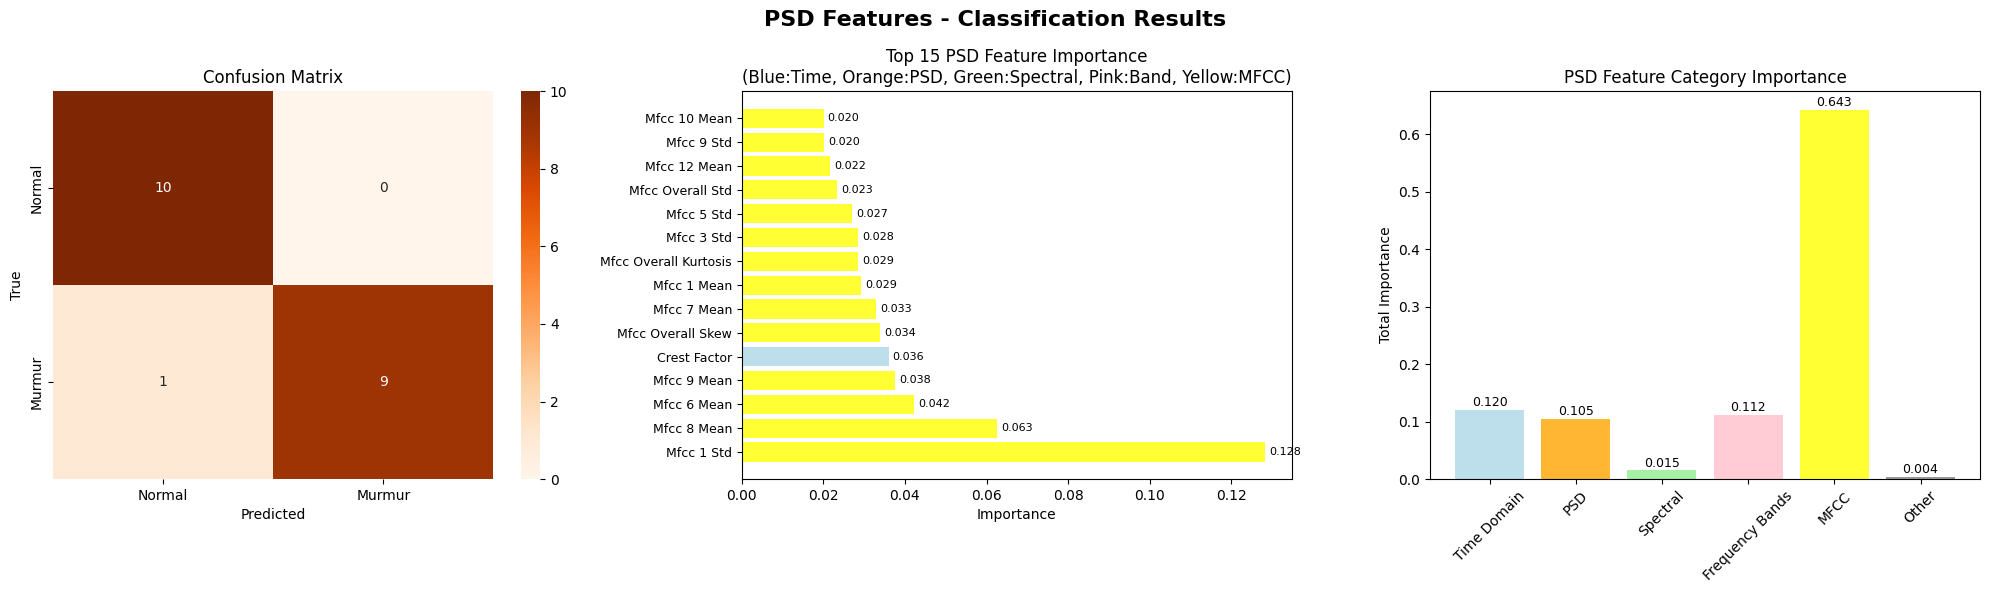


✅ PSD FEATURES CLASSIFICATION COMPLETED!
🌊 PSD features show classification performance as displayed above


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class PSDFeaturesClassifier:
    """
    PSD Features Classification with Feature Selection and Parameter Tuning

    Implements the same approach as the reference code but specifically for PSD features
    """

    def __init__(self, psd_features_path, output_folder="./output"):
        self.psd_features_path = psd_features_path
        self.output_folder = output_folder
        self.data = None
        self.selected_features = None
        self.best_model = None

        print("🌊 PSD FEATURES CLASSIFICATION SYSTEM")
        print("=" * 60)
        print(f"📊 PSD Features File: {psd_features_path}")
        print(f"📁 Output Folder: {output_folder}")

    def load_data(self):
        """Load PSD features dataset"""

        print("\n📂 Loading PSD features dataset...")

        try:
            if self.psd_features_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.psd_features_path)
            else:
                self.data = pd.read_csv(self.psd_features_path)

            print(f"✅ PSD dataset loaded: {self.data.shape}")

            # Prepare labels (convert -1 to 0 for Normal, keep 1 for Murmur)
            if 'label' in self.data.columns:
                self.data['Labels'] = np.where(self.data['label'] == -1, 0, 1)
            else:
                print("❌ No label column found!")
                return False

            # Display dataset info
            print(f"📊 Dataset Information:")
            print(f"   • Total samples: {len(self.data)}")
            print(f"   • Total columns: {len(self.data.columns)}")

            if 'label_text' in self.data.columns:
                label_dist = self.data['label_text'].value_counts()
                print(f"   • Label distribution: {label_dist.to_dict()}")

            return True

        except Exception as e:
            print(f"❌ Error loading PSD dataset: {e}")
            return False

    def parameter_tuning(self, X, y):
        """
        Find optimal parameters for Random Forest using GridSearchCV
        """

        print(f"🔧 Tuning Random Forest parameters...")

        try:
            # Define parameter search space (optimized for PSD features)
            estimators = np.arange(20, 80, 20)  # More trees for complex PSD features
            max_depth = np.arange(3, 12, 2)     # Deeper trees for PSD complexity

            # Use stratified K-fold
            cvs = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            params = [{'n_estimators': estimators, 'max_depth': max_depth}]

            # Initialize Random Forest with balanced class weights
            rf = RandomForestClassifier(class_weight='balanced', random_state=42)

            # Grid search for optimal parameters
            gsvm = GridSearchCV(
                estimator=rf,
                param_grid=params,
                cv=cvs,
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )

            gsvm.fit(X, y)

            print(f"   ✅ Best parameters: {gsvm.best_params_}")
            print(f"   📊 Best CV score: {gsvm.best_score_:.4f}")

            return gsvm.best_params_

        except Exception as e:
            print(f"❌ Parameter tuning failed: {e}")
            # Return default parameters optimized for PSD
            return {'n_estimators': 40, 'max_depth': 7}

    def feature_selection(self, y_name='Labels', n_runs=50, top_k=35):
        """
        Perform feature selection using Random Forest feature importance
        Multiple runs to reduce randomness - optimized for PSD features
        """

        print(f"\n🎯 PSD Feature Selection (Multiple Runs Approach)...")
        print(f"   • Number of runs: {n_runs}")
        print(f"   • Top features per run: {top_k}")

        # Get feature columns (exclude metadata)
        meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'Labels',
                    'duration', 'sample_rate', 'signal_length']

        feature_columns = [col for col in self.data.columns if col not in meta_cols]

        print(f"   • Available PSD features: {len(feature_columns)}")
        print(f"   • Sample features: {feature_columns[:5]}...")

        # Categorize PSD features for analysis
        time_features = [col for col in feature_columns if 'signal_' in col or 'zero_' in col or 'crest_' in col]
        psd_features = [col for col in feature_columns if 'psd_' in col or 'power_spec_' in col]
        spectral_features = [col for col in feature_columns if 'spectral_' in col]
        band_features = [col for col in feature_columns if 'band_' in col]
        mfcc_features = [col for col in feature_columns if 'mfcc_' in col]

        print(f"   • Feature categories:")
        print(f"     - Time domain: {len(time_features)}")
        print(f"     - PSD: {len(psd_features)}")
        print(f"     - Spectral: {len(spectral_features)}")
        print(f"     - Frequency bands: {len(band_features)}")
        print(f"     - MFCC: {len(mfcc_features)}")

        feature_sets = []

        for run in range(n_runs):
            try:
                # Shuffle data for each run
                shuffled_data = self.data.sample(frac=1, random_state=run).reset_index(drop=True)

                X = shuffled_data[feature_columns]
                y = shuffled_data[y_name]

                # Get optimal parameters for this run
                rf_params = self.parameter_tuning(X, y)

                # Train Random Forest for feature importance
                rf_feat_select = RandomForestClassifier(
                    n_estimators=rf_params['n_estimators'],
                    max_depth=rf_params['max_depth'],
                    class_weight='balanced',
                    random_state=run
                )

                rf_feat_select.fit(X, y)

                # Get feature importances
                feature_importance = list(zip(rf_feat_select.feature_importances_, feature_columns))
                feature_importance.sort(reverse=True)

                # Extract top features
                top_features = [feat_name for _, feat_name in feature_importance[:top_k]]
                feature_sets.append(set(top_features))

                # Progress indicator
                if (run + 1) % 10 == 0:
                    print(f"   🔄 Completed {run + 1}/{n_runs} runs")

            except Exception as e:
                print(f"   ⚠️ Run {run + 1} failed: {e}")
                continue

        # Take union of all selected features
        if feature_sets:
            selected_features = list(set.union(*feature_sets))
            print(f"\n✅ PSD Feature Selection Results:")
            print(f"   • Selected features: {len(selected_features)}")
            print(f"   • Reduction: {len(feature_columns)} → {len(selected_features)}")
            print(f"   • Top 10 features: {selected_features[:10]}")

            # Analyze selected feature categories
            selected_time = [f for f in selected_features if 'signal_' in f or 'zero_' in f or 'crest_' in f]
            selected_psd = [f for f in selected_features if 'psd_' in f or 'power_spec_' in f]
            selected_spectral = [f for f in selected_features if 'spectral_' in f]
            selected_band = [f for f in selected_features if 'band_' in f]
            selected_mfcc = [f for f in selected_features if 'mfcc_' in f]

            print(f"   • Selected by category:")
            print(f"     - Time domain: {len(selected_time)}")
            print(f"     - PSD: {len(selected_psd)}")
            print(f"     - Spectral: {len(selected_spectral)}")
            print(f"     - Frequency bands: {len(selected_band)}")
            print(f"     - MFCC: {len(selected_mfcc)}")

            self.selected_features = selected_features
            return selected_features
        else:
            print(f"❌ Feature selection failed, using all features")
            self.selected_features = feature_columns
            return feature_columns

    def undersampling(self, X, y, majority_class=0, minority_class=1, balance_ratio=1.0):
        """
        Undersample majority class to balance dataset
        """

        print(f"\n⚖️ Balancing PSD dataset...")

        # Count classes
        unique, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique, counts))

        print(f"   • Original distribution: {class_counts}")

        # Identify majority and minority classes
        maj_count = class_counts.get(majority_class, 0)
        min_count = class_counts.get(minority_class, 0)

        if maj_count <= min_count:
            print(f"   ✅ Dataset already balanced")
            return X, y

        # Calculate target counts
        target_maj_count = int(min_count * balance_ratio)

        # Get indices for each class
        maj_indices = np.where(y == majority_class)[0]
        min_indices = np.where(y == minority_class)[0]

        # Randomly sample from majority class
        np.random.seed(42)
        sampled_maj_indices = np.random.choice(maj_indices, target_maj_count, replace=False)

        # Combine indices
        balanced_indices = np.concatenate([sampled_maj_indices, min_indices])
        np.random.shuffle(balanced_indices)

        X_balanced = X[balanced_indices]
        y_balanced = y[balanced_indices]

        # Count after balancing
        unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
        balanced_counts = dict(zip(unique_bal, counts_bal))

        print(f"   • Balanced distribution: {balanced_counts}")
        print(f"   • Total samples: {len(y)} → {len(y_balanced)}")

        return X_balanced, y_balanced

    def train_cross_validation(self, y_name='Labels'):
        """
        Train model with 5-fold cross-validation
        """

        print(f"\n🚀 PSD Features Cross-Validation Training...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.data[self.selected_features].values
        y = self.data[y_name].values

        # Apply undersampling
        X_balanced, y_balanced = self.undersampling(X, y)

        # 5-fold stratified cross-validation
        cv_splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

        precision_scores = []
        recall_scores = []
        f1_scores = []
        accuracy_scores = []

        print(f"   🔄 Running 5-fold cross-validation...")

        fold = 1
        for train_idx, val_idx in cv_splitter.split(X_balanced, y_balanced):

            X_train_fold, X_val_fold = X_balanced[train_idx], X_balanced[val_idx]
            y_train_fold, y_val_fold = y_balanced[train_idx], y_balanced[val_idx]

            # Feature scaling (important for PSD features with different scales)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_val_scaled = scaler.transform(X_val_fold)

            # Get optimal parameters
            rf_params = self.parameter_tuning(X_train_scaled, y_train_fold)

            # Train Random Forest
            rf_model = RandomForestClassifier(
                n_estimators=rf_params['n_estimators'],
                max_depth=rf_params['max_depth'],
                class_weight='balanced',
                random_state=42,
                n_jobs=-1
            )

            rf_model.fit(X_train_scaled, y_train_fold)

            # Predict on validation set
            y_pred = rf_model.predict(X_val_scaled)

            # Calculate metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                y_val_fold, y_pred, pos_label=1, average='binary', zero_division=0
            )
            accuracy = accuracy_score(y_val_fold, y_pred)

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            accuracy_scores.append(accuracy)

            print(f"   Fold {fold}: Acc={accuracy:.4f}, Prec={precision:.4f}, Rec={recall:.4f}, F1={f1:.4f}")
            fold += 1

        # Calculate average scores
        results = {
            'accuracy': np.mean(accuracy_scores),
            'precision': np.mean(precision_scores),
            'recall': np.mean(recall_scores),
            'f1_score': np.mean(f1_scores),
            'accuracy_std': np.std(accuracy_scores),
            'precision_std': np.std(precision_scores),
            'recall_std': np.std(recall_scores),
            'f1_std': np.std(f1_scores)
        }

        return results

    def train_test_split_evaluation(self, test_size=0.2, y_name='Labels'):
        """
        Train model with train-test split evaluation
        """

        print(f"\n🎯 PSD Features Train-Test Split Evaluation...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.data[self.selected_features].values
        y = self.data[y_name].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        print(f"   📊 Data split: Train={len(X_train)}, Test={len(X_test)}")

        # Apply undersampling to training data only
        X_train_balanced, y_train_balanced = self.undersampling(X_train, y_train)

        # Feature scaling (crucial for PSD features)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_balanced)
        X_test_scaled = scaler.transform(X_test)

        # Get optimal parameters
        rf_params = self.parameter_tuning(X_train_scaled, y_train_balanced)

        # Train final model
        self.best_model = RandomForestClassifier(
            n_estimators=rf_params['n_estimators'],
            max_depth=rf_params['max_depth'],
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        self.best_model.fit(X_train_scaled, y_train_balanced)

        # Predict on test set
        y_pred = self.best_model.predict(X_test_scaled)
        y_pred_proba = self.best_model.predict_proba(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, pos_label=1, average='binary', zero_division=0
        )

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': cm,
            'y_true': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'feature_importance': self.best_model.feature_importances_,
            'scaler': scaler
        }

        return results

    def plot_results(self, results, title_prefix="PSD Features"):
        """
        Plot confusion matrix and feature importance
        """

        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle(f'{title_prefix} - Classification Results', fontsize=16, fontweight='bold')

        # 1. Confusion Matrix
        if 'confusion_matrix' in results:
            cm = results['confusion_matrix']
            sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                       xticklabels=['Normal', 'Murmur'], yticklabels=['Normal', 'Murmur'],
                       ax=axes[0])
            axes[0].set_title('Confusion Matrix')
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('True')

        # 2. Feature Importance (Top 15)
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Get top 15 features
            indices = np.argsort(importance)[::-1][:15]
            top_importance = importance[indices]
            top_names = [feature_names[i] for i in indices]

            # Color by feature type
            colors = []
            for name in top_names:
                if 'signal_' in name or 'zero_' in name or 'crest_' in name:
                    colors.append('lightblue')
                elif 'psd_' in name or 'power_spec_' in name:
                    colors.append('orange')
                elif 'spectral_' in name:
                    colors.append('lightgreen')
                elif 'band_' in name:
                    colors.append('pink')
                elif 'mfcc_' in name:
                    colors.append('yellow')
                else:
                    colors.append('gray')

            bars = axes[1].barh(range(len(top_names)), top_importance, color=colors, alpha=0.8)
            axes[1].set_yticks(range(len(top_names)))
            axes[1].set_yticklabels([name.replace('_', ' ').title() for name in top_names], fontsize=9)
            axes[1].set_title('Top 15 PSD Feature Importance\n(Blue:Time, Orange:PSD, Green:Spectral, Pink:Band, Yellow:MFCC)')
            axes[1].set_xlabel('Importance')

            # Add value labels
            for i, (bar, val) in enumerate(zip(bars, top_importance)):
                axes[1].text(val + 0.001, bar.get_y() + bar.get_height()/2,
                           f'{val:.3f}', va='center', fontsize=8)

        # 3. Feature Category Analysis
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Categorize features and sum importance
            categories = {
                'Time Domain': 0,
                'PSD': 0,
                'Spectral': 0,
                'Frequency Bands': 0,
                'MFCC': 0,
                'Other': 0
            }

            for feat_name, imp in zip(feature_names, importance):
                if 'signal_' in feat_name or 'zero_' in feat_name or 'crest_' in feat_name:
                    categories['Time Domain'] += imp
                elif 'psd_' in feat_name or 'power_spec_' in feat_name:
                    categories['PSD'] += imp
                elif 'spectral_' in feat_name:
                    categories['Spectral'] += imp
                elif 'band_' in feat_name:
                    categories['Frequency Bands'] += imp
                elif 'mfcc_' in feat_name:
                    categories['MFCC'] += imp
                else:
                    categories['Other'] += imp

            # Plot category importance
            cat_names = list(categories.keys())
            cat_importance = list(categories.values())
            colors_cat = ['lightblue', 'orange', 'lightgreen', 'pink', 'yellow', 'gray']

            bars = axes[2].bar(cat_names, cat_importance, color=colors_cat, alpha=0.8)
            axes[2].set_title('PSD Feature Category Importance')
            axes[2].set_ylabel('Total Importance')
            axes[2].tick_params(axis='x', rotation=45)

            # Add value labels
            for bar, val in zip(bars, cat_importance):
                axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                           f'{val:.3f}', ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

    def display_results(self, results, evaluation_type="Cross-Validation"):
        """
        Display comprehensive results
        """

        print(f"\n📊 PSD FEATURES {evaluation_type.upper()} RESULTS")
        print("=" * 60)

        if evaluation_type == "Cross-Validation":
            print(f"🎯 5-Fold Cross-Validation Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f} ± {results['accuracy_std']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f} ± {results['precision_std']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f} ± {results['recall_std']:.4f}")
            print(f"   • F1-Score:   {results['f1_score']:.4f} ± {results['f1_std']:.4f}")

        else:  # Train-Test Split
            print(f"🎯 Train-Test Split Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f}")
            print(f"   • F1-Score:   {results['f1_score']:.4f}")

            if 'confusion_matrix' in results:
                cm = results['confusion_matrix']
                tn, fp, fn, tp = cm.ravel()
                specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

                print(f"\n📋 Detailed Confusion Matrix:")
                print(f"   • True Negatives:  {tn}")
                print(f"   • False Positives: {fp}")
                print(f"   • False Negatives: {fn}")
                print(f"   • True Positives:  {tp}")
                print(f"   • Specificity:     {specificity:.4f}")

        print(f"\n🌊 PSD Feature Analysis:")
        print(f"   • Selected features: {len(self.selected_features) if self.selected_features else 0}")
        print(f"   • Feature selection method: Multi-run Random Forest importance")
        print(f"   • Classifier: Random Forest with parameter tuning")
        print(f"   • Feature scaling: StandardScaler applied")

def main():
    """
    Main execution function for PSD features classification
    """

    # Configuration
    psd_features_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv"
    output_folder = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/psd_classification_output"

    try:
        # Initialize PSD classifier
        psd_classifier = PSDFeaturesClassifier(psd_features_path, output_folder)

        # Load data
        if not psd_classifier.load_data():
            print("❌ Failed to load PSD data!")
            return None

        # Feature selection (using more features for PSD due to complexity)
        selected_features = psd_classifier.feature_selection(n_runs=30, top_k=35)

        if not selected_features:
            print("❌ Feature selection failed!")
            return None

        print(f"\n" + "="*60)
        print(f"🔄 RUNNING BOTH EVALUATION METHODS")
        print(f"="*60)

        # 1. Cross-validation
        cv_results = psd_classifier.train_cross_validation()

        if cv_results:
            psd_classifier.display_results(cv_results, "Cross-Validation")

        # 2. Train-test split
        test_results = psd_classifier.train_test_split_evaluation(test_size=0.2)

        if test_results:
            psd_classifier.display_results(test_results, "Train-Test Split")

            # Plot results
            print(f"\n📊 Generating visualizations...")
            psd_classifier.plot_results(test_results)

        print(f"\n✅ PSD FEATURES CLASSIFICATION COMPLETED!")
        print(f"🌊 PSD features show classification performance as displayed above")

        return psd_classifier, cv_results, test_results

    except Exception as e:
        print(f"❌ Error in PSD classification: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    psd_classifier, cv_results, test_results = main()

🌊 PSD FEATURES CLASSIFICATION SYSTEM
📊 PSD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv
📁 Output Folder: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/psd_classification_output

📂 Loading PSD features dataset...
✅ PSD dataset loaded: (100, 94)
📊 Dataset Information:
   • Total samples: 100
   • Total columns: 95
   • Label distribution: {'Normal': 50, 'Murmur': 50}

🎯 PSD Feature Selection (Multiple Runs Approach)...
   • Number of runs: 30
   • Top features per run: 35
   • Available PSD features: 87
   • Sample features: ['signal_mean', 'signal_std', 'signal_var', 'signal_rms', 'signal_max']...
   • Feature categories:
     - Time domain: 14
     - PSD: 13
     - Spectral: 4
     - Frequency bands: 27
     - MFCC: 28
🔧 Tuning Random Forest parameters...
   ✅ Best parameters: {'max_depth': np.int64(7), 'n_estimators': np.int64(20)}
   📊 Best CV score: 0.9050
🔧 Tuning Random Forest paramete

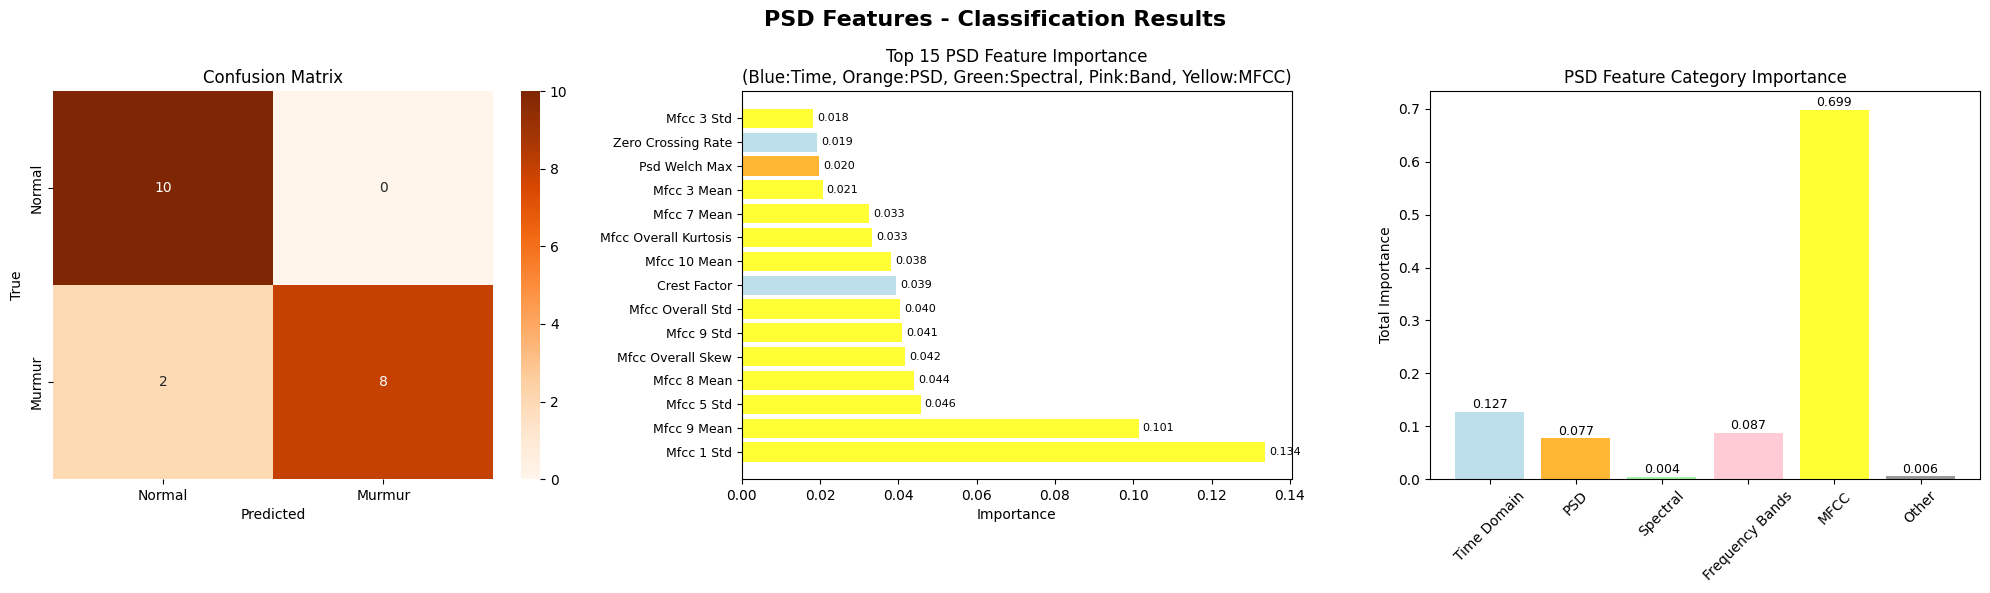


✅ PSD FEATURES CLASSIFICATION COMPLETED!
🌊 PSD features show classification performance as displayed above


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class PSDFeaturesClassifier:
    """
    PSD Features Classification with Feature Selection and Parameter Tuning
    Enhanced with Specificity calculations for both 5-fold CV and train-test split

    Implements the same approach as the reference code but specifically for PSD features
    """

    def __init__(self, psd_features_path, output_folder="./output"):
        self.psd_features_path = psd_features_path
        self.output_folder = output_folder
        self.data = None
        self.selected_features = None
        self.best_model = None

        print("🌊 PSD FEATURES CLASSIFICATION SYSTEM")
        print("=" * 60)
        print(f"📊 PSD Features File: {psd_features_path}")
        print(f"📁 Output Folder: {output_folder}")

    def calculate_specificity(self, y_true, y_pred):
        """
        Calculate specificity (True Negative Rate)
        Specificity = TN / (TN + FP)
        """
        cm = confusion_matrix(y_true, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        else:
            specificity = 0
        return specificity

    def load_data(self):
        """Load PSD features dataset"""

        print("\n📂 Loading PSD features dataset...")

        try:
            if self.psd_features_path.endswith('.xlsx'):
                self.data = pd.read_excel(self.psd_features_path)
            else:
                self.data = pd.read_csv(self.psd_features_path)

            print(f"✅ PSD dataset loaded: {self.data.shape}")

            # Prepare labels (convert -1 to 0 for Normal, keep 1 for Murmur)
            if 'label' in self.data.columns:
                self.data['Labels'] = np.where(self.data['label'] == -1, 0, 1)
            else:
                print("❌ No label column found!")
                return False

            # Display dataset info
            print(f"📊 Dataset Information:")
            print(f"   • Total samples: {len(self.data)}")
            print(f"   • Total columns: {len(self.data.columns)}")

            if 'label_text' in self.data.columns:
                label_dist = self.data['label_text'].value_counts()
                print(f"   • Label distribution: {label_dist.to_dict()}")

            return True

        except Exception as e:
            print(f"❌ Error loading PSD dataset: {e}")
            return False

    def parameter_tuning(self, X, y):
        """
        Find optimal parameters for Random Forest using GridSearchCV
        """

        print(f"🔧 Tuning Random Forest parameters...")

        try:
            # Define parameter search space (optimized for PSD features)
            estimators = np.arange(20, 80, 20)  # More trees for complex PSD features
            max_depth = np.arange(3, 12, 2)     # Deeper trees for PSD complexity

            # Use stratified K-fold
            cvs = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            params = [{'n_estimators': estimators, 'max_depth': max_depth}]

            # Initialize Random Forest with balanced class weights
            rf = RandomForestClassifier(class_weight='balanced', random_state=42)

            # Grid search for optimal parameters
            gsvm = GridSearchCV(
                estimator=rf,
                param_grid=params,
                cv=cvs,
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )

            gsvm.fit(X, y)

            print(f"   ✅ Best parameters: {gsvm.best_params_}")
            print(f"   📊 Best CV score: {gsvm.best_score_:.4f}")

            return gsvm.best_params_

        except Exception as e:
            print(f"❌ Parameter tuning failed: {e}")
            # Return default parameters optimized for PSD
            return {'n_estimators': 40, 'max_depth': 7}

    def feature_selection(self, y_name='Labels', n_runs=50, top_k=35):
        """
        Perform feature selection using Random Forest feature importance
        Multiple runs to reduce randomness - optimized for PSD features
        """

        print(f"\n🎯 PSD Feature Selection (Multiple Runs Approach)...")
        print(f"   • Number of runs: {n_runs}")
        print(f"   • Top features per run: {top_k}")

        # Get feature columns (exclude metadata)
        meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'Labels',
                    'duration', 'sample_rate', 'signal_length']

        feature_columns = [col for col in self.data.columns if col not in meta_cols]

        print(f"   • Available PSD features: {len(feature_columns)}")
        print(f"   • Sample features: {feature_columns[:5]}...")

        # Categorize PSD features for analysis
        time_features = [col for col in feature_columns if 'signal_' in col or 'zero_' in col or 'crest_' in col]
        psd_features = [col for col in feature_columns if 'psd_' in col or 'power_spec_' in col]
        spectral_features = [col for col in feature_columns if 'spectral_' in col]
        band_features = [col for col in feature_columns if 'band_' in col]
        mfcc_features = [col for col in feature_columns if 'mfcc_' in col]

        print(f"   • Feature categories:")
        print(f"     - Time domain: {len(time_features)}")
        print(f"     - PSD: {len(psd_features)}")
        print(f"     - Spectral: {len(spectral_features)}")
        print(f"     - Frequency bands: {len(band_features)}")
        print(f"     - MFCC: {len(mfcc_features)}")

        feature_sets = []

        for run in range(n_runs):
            try:
                # Shuffle data for each run
                shuffled_data = self.data.sample(frac=1, random_state=run).reset_index(drop=True)

                X = shuffled_data[feature_columns]
                y = shuffled_data[y_name]

                # Get optimal parameters for this run
                rf_params = self.parameter_tuning(X, y)

                # Train Random Forest for feature importance
                rf_feat_select = RandomForestClassifier(
                    n_estimators=rf_params['n_estimators'],
                    max_depth=rf_params['max_depth'],
                    class_weight='balanced',
                    random_state=run
                )

                rf_feat_select.fit(X, y)

                # Get feature importances
                feature_importance = list(zip(rf_feat_select.feature_importances_, feature_columns))
                feature_importance.sort(reverse=True)

                # Extract top features
                top_features = [feat_name for _, feat_name in feature_importance[:top_k]]
                feature_sets.append(set(top_features))

                # Progress indicator
                if (run + 1) % 10 == 0:
                    print(f"   🔄 Completed {run + 1}/{n_runs} runs")

            except Exception as e:
                print(f"   ⚠️ Run {run + 1} failed: {e}")
                continue

        # Take union of all selected features
        if feature_sets:
            selected_features = list(set.union(*feature_sets))
            print(f"\n✅ PSD Feature Selection Results:")
            print(f"   • Selected features: {len(selected_features)}")
            print(f"   • Reduction: {len(feature_columns)} → {len(selected_features)}")
            print(f"   • Top 10 features: {selected_features[:10]}")

            # Analyze selected feature categories
            selected_time = [f for f in selected_features if 'signal_' in f or 'zero_' in f or 'crest_' in f]
            selected_psd = [f for f in selected_features if 'psd_' in f or 'power_spec_' in f]
            selected_spectral = [f for f in selected_features if 'spectral_' in f]
            selected_band = [f for f in selected_features if 'band_' in f]
            selected_mfcc = [f for f in selected_features if 'mfcc_' in f]

            print(f"   • Selected by category:")
            print(f"     - Time domain: {len(selected_time)}")
            print(f"     - PSD: {len(selected_psd)}")
            print(f"     - Spectral: {len(selected_spectral)}")
            print(f"     - Frequency bands: {len(selected_band)}")
            print(f"     - MFCC: {len(selected_mfcc)}")

            self.selected_features = selected_features
            return selected_features
        else:
            print(f"❌ Feature selection failed, using all features")
            self.selected_features = feature_columns
            return feature_columns

    def undersampling(self, X, y, majority_class=0, minority_class=1, balance_ratio=1.0):
        """
        Undersample majority class to balance dataset
        """

        print(f"\n⚖️ Balancing PSD dataset...")

        # Count classes
        unique, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique, counts))

        print(f"   • Original distribution: {class_counts}")

        # Identify majority and minority classes
        maj_count = class_counts.get(majority_class, 0)
        min_count = class_counts.get(minority_class, 0)

        if maj_count <= min_count:
            print(f"   ✅ Dataset already balanced")
            return X, y

        # Calculate target counts
        target_maj_count = int(min_count * balance_ratio)

        # Get indices for each class
        maj_indices = np.where(y == majority_class)[0]
        min_indices = np.where(y == minority_class)[0]

        # Randomly sample from majority class
        np.random.seed(42)
        sampled_maj_indices = np.random.choice(maj_indices, target_maj_count, replace=False)

        # Combine indices
        balanced_indices = np.concatenate([sampled_maj_indices, min_indices])
        np.random.shuffle(balanced_indices)

        X_balanced = X[balanced_indices]
        y_balanced = y[balanced_indices]

        # Count after balancing
        unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
        balanced_counts = dict(zip(unique_bal, counts_bal))

        print(f"   • Balanced distribution: {balanced_counts}")
        print(f"   • Total samples: {len(y)} → {len(y_balanced)}")

        return X_balanced, y_balanced

    def train_cross_validation(self, y_name='Labels'):
        """
        Train model with 5-fold cross-validation
        Enhanced with specificity calculation
        """

        print(f"\n🚀 PSD Features Cross-Validation Training...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.data[self.selected_features].values
        y = self.data[y_name].values

        # Apply undersampling
        X_balanced, y_balanced = self.undersampling(X, y)

        # 5-fold stratified cross-validation
        cv_splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

        precision_scores = []
        recall_scores = []
        f1_scores = []
        accuracy_scores = []
        specificity_scores = []  # Added specificity tracking

        print(f"   🔄 Running 5-fold cross-validation...")

        fold = 1
        for train_idx, val_idx in cv_splitter.split(X_balanced, y_balanced):

            X_train_fold, X_val_fold = X_balanced[train_idx], X_balanced[val_idx]
            y_train_fold, y_val_fold = y_balanced[train_idx], y_balanced[val_idx]

            # Feature scaling (important for PSD features with different scales)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_val_scaled = scaler.transform(X_val_fold)

            # Get optimal parameters
            rf_params = self.parameter_tuning(X_train_scaled, y_train_fold)

            # Train Random Forest
            rf_model = RandomForestClassifier(
                n_estimators=rf_params['n_estimators'],
                max_depth=rf_params['max_depth'],
                class_weight='balanced',
                random_state=42,
                n_jobs=-1
            )

            rf_model.fit(X_train_scaled, y_train_fold)

            # Predict on validation set
            y_pred = rf_model.predict(X_val_scaled)

            # Calculate metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                y_val_fold, y_pred, pos_label=1, average='binary', zero_division=0
            )
            accuracy = accuracy_score(y_val_fold, y_pred)
            specificity = self.calculate_specificity(y_val_fold, y_pred)  # Added specificity calculation

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            accuracy_scores.append(accuracy)
            specificity_scores.append(specificity)  # Added to list

            print(f"   Fold {fold}: Acc={accuracy:.4f}, Prec={precision:.4f}, Rec={recall:.4f}, F1={f1:.4f}, Spec={specificity:.4f}")
            fold += 1

        # Calculate average scores
        results = {
            'accuracy': np.mean(accuracy_scores),
            'precision': np.mean(precision_scores),
            'recall': np.mean(recall_scores),
            'f1_score': np.mean(f1_scores),
            'specificity': np.mean(specificity_scores),  # Added specificity mean
            'accuracy_std': np.std(accuracy_scores),
            'precision_std': np.std(precision_scores),
            'recall_std': np.std(recall_scores),
            'f1_std': np.std(f1_scores),
            'specificity_std': np.std(specificity_scores)  # Added specificity std
        }

        return results

    def train_test_split_evaluation(self, test_size=0.2, y_name='Labels'):
        """
        Train model with train-test split evaluation
        Enhanced with specificity calculation
        """

        print(f"\n🎯 PSD Features Train-Test Split Evaluation...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.data[self.selected_features].values
        y = self.data[y_name].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        print(f"   📊 Data split: Train={len(X_train)}, Test={len(X_test)}")

        # Apply undersampling to training data only
        X_train_balanced, y_train_balanced = self.undersampling(X_train, y_train)

        # Feature scaling (crucial for PSD features)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_balanced)
        X_test_scaled = scaler.transform(X_test)

        # Get optimal parameters
        rf_params = self.parameter_tuning(X_train_scaled, y_train_balanced)

        # Train final model
        self.best_model = RandomForestClassifier(
            n_estimators=rf_params['n_estimators'],
            max_depth=rf_params['max_depth'],
            class_weight='balanced',
            random_state=42,
            n_jobs=-1
        )

        self.best_model.fit(X_train_scaled, y_train_balanced)

        # Predict on test set
        y_pred = self.best_model.predict(X_test_scaled)
        y_pred_proba = self.best_model.predict_proba(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, pos_label=1, average='binary', zero_division=0
        )
        specificity = self.calculate_specificity(y_test, y_pred)  # Added specificity calculation

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'specificity': specificity,  # Added specificity to results
            'confusion_matrix': cm,
            'y_true': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'feature_importance': self.best_model.feature_importances_,
            'scaler': scaler
        }

        return results

    def plot_results(self, results, title_prefix="PSD Features"):
        """
        Plot confusion matrix and feature importance
        """

        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        fig.suptitle(f'{title_prefix} - Classification Results', fontsize=16, fontweight='bold')

        # 1. Confusion Matrix
        if 'confusion_matrix' in results:
            cm = results['confusion_matrix']
            sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                       xticklabels=['Normal', 'Murmur'], yticklabels=['Normal', 'Murmur'],
                       ax=axes[0])
            axes[0].set_title('Confusion Matrix')
            axes[0].set_xlabel('Predicted')
            axes[0].set_ylabel('True')

        # 2. Feature Importance (Top 15)
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Get top 15 features
            indices = np.argsort(importance)[::-1][:15]
            top_importance = importance[indices]
            top_names = [feature_names[i] for i in indices]

            # Color by feature type
            colors = []
            for name in top_names:
                if 'signal_' in name or 'zero_' in name or 'crest_' in name:
                    colors.append('lightblue')
                elif 'psd_' in name or 'power_spec_' in name:
                    colors.append('orange')
                elif 'spectral_' in name:
                    colors.append('lightgreen')
                elif 'band_' in name:
                    colors.append('pink')
                elif 'mfcc_' in name:
                    colors.append('yellow')
                else:
                    colors.append('gray')

            bars = axes[1].barh(range(len(top_names)), top_importance, color=colors, alpha=0.8)
            axes[1].set_yticks(range(len(top_names)))
            axes[1].set_yticklabels([name.replace('_', ' ').title() for name in top_names], fontsize=9)
            axes[1].set_title('Top 15 PSD Feature Importance\n(Blue:Time, Orange:PSD, Green:Spectral, Pink:Band, Yellow:MFCC)')
            axes[1].set_xlabel('Importance')

            # Add value labels
            for i, (bar, val) in enumerate(zip(bars, top_importance)):
                axes[1].text(val + 0.001, bar.get_y() + bar.get_height()/2,
                           f'{val:.3f}', va='center', fontsize=8)

        # 3. Feature Category Analysis
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Categorize features and sum importance
            categories = {
                'Time Domain': 0,
                'PSD': 0,
                'Spectral': 0,
                'Frequency Bands': 0,
                'MFCC': 0,
                'Other': 0
            }

            for feat_name, imp in zip(feature_names, importance):
                if 'signal_' in feat_name or 'zero_' in feat_name or 'crest_' in feat_name:
                    categories['Time Domain'] += imp
                elif 'psd_' in feat_name or 'power_spec_' in feat_name:
                    categories['PSD'] += imp
                elif 'spectral_' in feat_name:
                    categories['Spectral'] += imp
                elif 'band_' in feat_name:
                    categories['Frequency Bands'] += imp
                elif 'mfcc_' in feat_name:
                    categories['MFCC'] += imp
                else:
                    categories['Other'] += imp

            # Plot category importance
            cat_names = list(categories.keys())
            cat_importance = list(categories.values())
            colors_cat = ['lightblue', 'orange', 'lightgreen', 'pink', 'yellow', 'gray']

            bars = axes[2].bar(cat_names, cat_importance, color=colors_cat, alpha=0.8)
            axes[2].set_title('PSD Feature Category Importance')
            axes[2].set_ylabel('Total Importance')
            axes[2].tick_params(axis='x', rotation=45)

            # Add value labels
            for bar, val in zip(bars, cat_importance):
                axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                           f'{val:.3f}', ha='center', va='bottom', fontsize=9)

        plt.tight_layout()
        plt.show()

    def display_results(self, results, evaluation_type="Cross-Validation"):
        """
        Display comprehensive results
        Enhanced with specificity display
        """

        print(f"\n📊 PSD FEATURES {evaluation_type.upper()} RESULTS")
        print("=" * 60)

        if evaluation_type == "Cross-Validation":
            print(f"🎯 5-Fold Cross-Validation Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f} ± {results['accuracy_std']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f} ± {results['precision_std']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f} ± {results['recall_std']:.4f}")
            print(f"   • Specificity:{results['specificity']:.4f} ± {results['specificity_std']:.4f}")  # Added specificity display
            print(f"   • F1-Score:   {results['f1_score']:.4f} ± {results['f1_std']:.4f}")

        else:  # Train-Test Split
            print(f"🎯 Train-Test Split Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f}")
            print(f"   • Specificity:{results['specificity']:.4f}")  # Added specificity display
            print(f"   • F1-Score:   {results['f1_score']:.4f}")

            if 'confusion_matrix' in results:
                cm = results['confusion_matrix']
                tn, fp, fn, tp = cm.ravel()

                print(f"\n📋 Detailed Confusion Matrix:")
                print(f"   • True Negatives:  {tn}")
                print(f"   • False Positives: {fp}")
                print(f"   • False Negatives: {fn}")
                print(f"   • True Positives:  {tp}")
                print(f"   • Specificity (TN/(TN+FP)): {results['specificity']:.4f}")

        print(f"\n🌊 PSD Feature Analysis:")
        print(f"   • Selected features: {len(self.selected_features) if self.selected_features else 0}")
        print(f"   • Feature selection method: Multi-run Random Forest importance")
        print(f"   • Classifier: Random Forest with parameter tuning")
        print(f"   • Feature scaling: StandardScaler applied")

def main():
    """
    Main execution function for PSD features classification
    """

    # Configuration
    psd_features_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv"
    output_folder = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/psd_classification_output"

    try:
        # Initialize PSD classifier
        psd_classifier = PSDFeaturesClassifier(psd_features_path, output_folder)

        # Load data
        if not psd_classifier.load_data():
            print("❌ Failed to load PSD data!")
            return None

        # Feature selection (using more features for PSD due to complexity)
        selected_features = psd_classifier.feature_selection(n_runs=30, top_k=35)

        if not selected_features:
            print("❌ Feature selection failed!")
            return None

        print(f"\n" + "="*60)
        print(f"🔄 RUNNING BOTH EVALUATION METHODS")
        print(f"="*60)

        # 1. Cross-validation
        cv_results = psd_classifier.train_cross_validation()

        if cv_results:
            psd_classifier.display_results(cv_results, "Cross-Validation")

        # 2. Train-test split
        test_results = psd_classifier.train_test_split_evaluation(test_size=0.2)

        if test_results:
            psd_classifier.display_results(test_results, "Train-Test Split")

            # Plot results
            print(f"\n📊 Generating visualizations...")
            psd_classifier.plot_results(test_results)

        print(f"\n✅ PSD FEATURES CLASSIFICATION COMPLETED!")
        print(f"🌊 PSD features show classification performance as displayed above")

        return psd_classifier, cv_results, test_results

    except Exception as e:
        print(f"❌ Error in PSD classification: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    psd_classifier, cv_results, test_results = main()

🔗 COMBINED EMD + PSD FEATURES CLASSIFICATION SYSTEM
🧬 EMD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv
🌊 PSD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv
📁 Output Folder: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/combined_classification_output

📂 Loading and merging EMD + PSD datasets...
✅ EMD dataset loaded: (100, 35)
✅ PSD dataset loaded: (100, 94)
✅ Combined dataset created: (100, 119)
   • EMD features: 27 (prefixed with 'emd_')
   • PSD features: 87 (prefixed with 'psd_')
   • Total combined features: 114
   • Label distribution: {'Normal': 50, 'Murmur': 50}

🎯 Combined EMD + PSD Feature Selection...
   • Number of runs: 30
   • Top features per run: 50
   • Total features available: 114
   • EMD features: 27
   • PSD features: 87
   • Feature breakdown:
     - EMD: 27
     - PSD Time: 14
     - PSD Spectral: 87
     - 

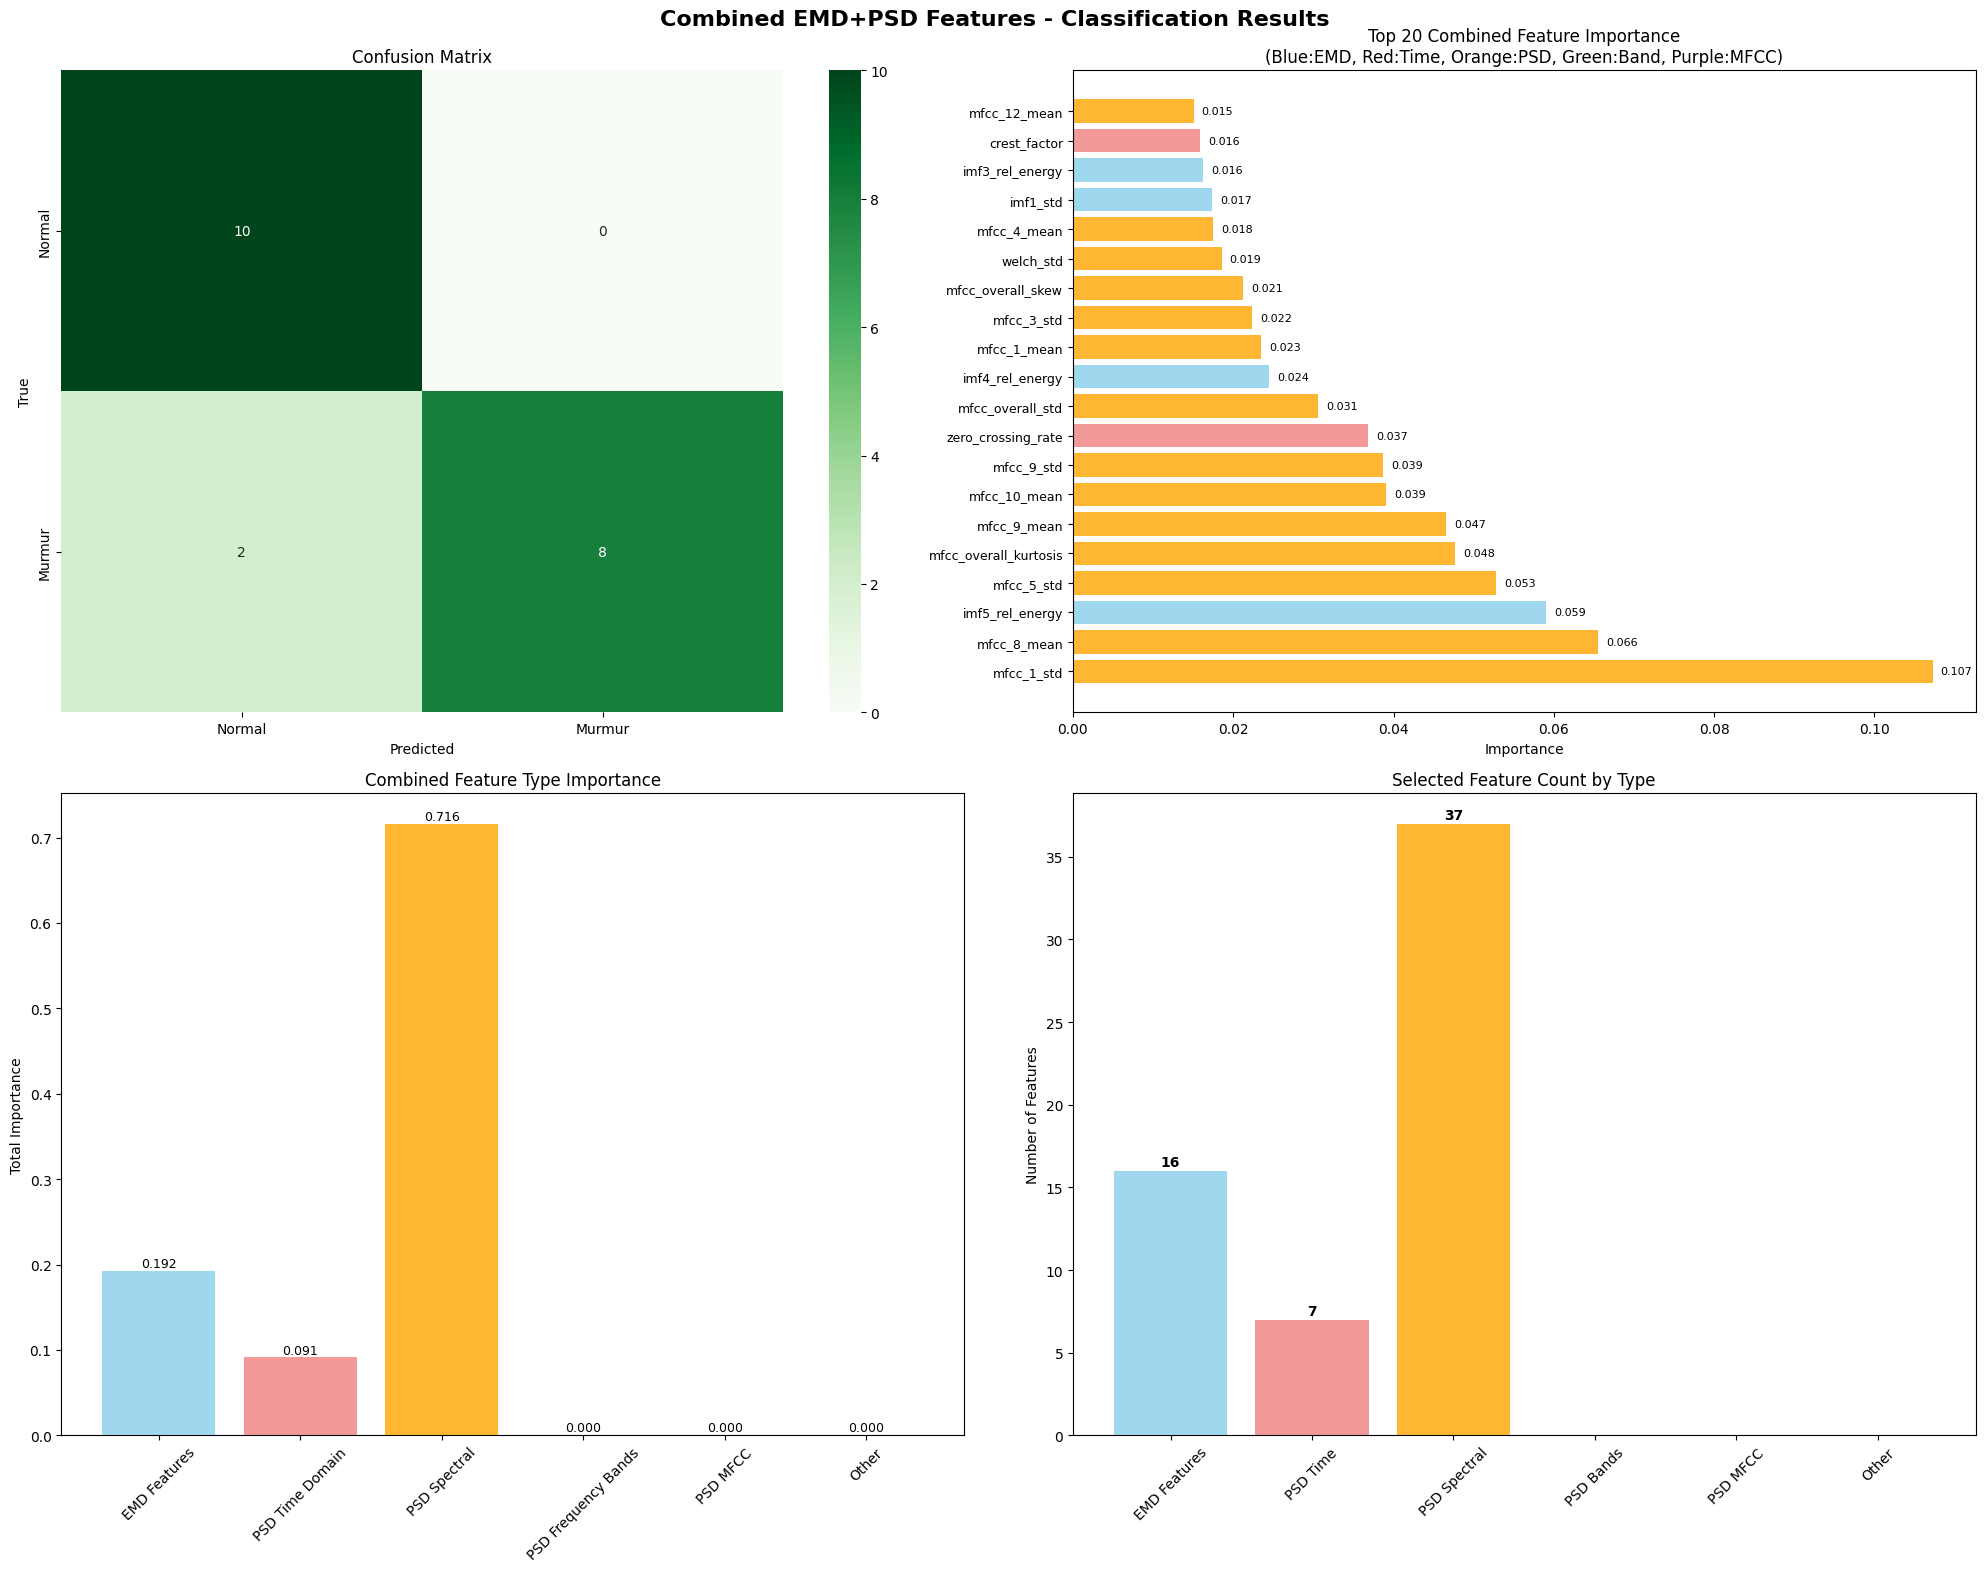


✅ COMBINED EMD+PSD FEATURES CLASSIFICATION COMPLETED!
🔗 Combined features leverage both time-domain (EMD) and frequency-domain (PSD) information
📊 Results show the synergistic effect of combining complementary feature sets

📋 PERFORMANCE SUMMARY:
   • Cross-Validation Accuracy: 0.8900 ± 0.0583
   • Test Set Accuracy:         0.9000
   • Test Set F1-Score:         0.8889
   • Feature Synergy: EMD + PSD features working together


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class CombinedEMDPSDClassifier:
    """
    Combined EMD + PSD Features Classification with Feature Selection and Parameter Tuning

    Menggabungkan fitur EMD dan PSD untuk klasifikasi heart sound yang lebih robust
    """

    def __init__(self, emd_features_path, psd_features_path, output_folder="./output"):
        self.emd_features_path = emd_features_path
        self.psd_features_path = psd_features_path
        self.output_folder = output_folder
        self.emd_data = None
        self.psd_data = None
        self.combined_data = None
        self.selected_features = None
        self.best_model = None

        print("🔗 COMBINED EMD + PSD FEATURES CLASSIFICATION SYSTEM")
        print("=" * 70)
        print(f"🧬 EMD Features File: {emd_features_path}")
        print(f"🌊 PSD Features File: {psd_features_path}")
        print(f"📁 Output Folder: {output_folder}")

    def load_and_merge_data(self):
        """Load EMD and PSD datasets and merge them"""

        print("\n📂 Loading and merging EMD + PSD datasets...")

        # Load EMD features
        try:
            if self.emd_features_path.endswith('.xlsx'):
                self.emd_data = pd.read_excel(self.emd_features_path)
            else:
                self.emd_data = pd.read_csv(self.emd_features_path)
            print(f"✅ EMD dataset loaded: {self.emd_data.shape}")
        except Exception as e:
            print(f"❌ Error loading EMD dataset: {e}")
            return False

        # Load PSD features
        try:
            if self.psd_features_path.endswith('.xlsx'):
                self.psd_data = pd.read_excel(self.psd_features_path)
            else:
                self.psd_data = pd.read_csv(self.psd_features_path)
            print(f"✅ PSD dataset loaded: {self.psd_data.shape}")
        except Exception as e:
            print(f"❌ Error loading PSD dataset: {e}")
            return False

        # Merge datasets
        try:
            # Get EMD features (exclude metadata)
            emd_meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'sample_rate',
                           'signal_length', 'duration_seconds', 'num_imfs']
            emd_feature_cols = [col for col in self.emd_data.columns if col not in emd_meta_cols]

            # Get PSD features (exclude metadata)
            psd_meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'duration',
                           'sample_rate', 'signal_length']
            psd_feature_cols = [col for col in self.psd_data.columns if col not in psd_meta_cols]

            # Rename features to avoid conflicts
            emd_features_renamed = {}
            for col in emd_feature_cols:
                emd_features_renamed[col] = f'emd_{col}'

            psd_features_renamed = {}
            for col in psd_feature_cols:
                psd_features_renamed[col] = f'psd_{col}'

            # Create combined dataset
            self.combined_data = self.emd_data[['file_name', 'file_number', 'label', 'label_text']].copy()

            # Add renamed EMD features
            for old_name, new_name in emd_features_renamed.items():
                self.combined_data[new_name] = self.emd_data[old_name]

            # Add renamed PSD features
            for old_name, new_name in psd_features_renamed.items():
                self.combined_data[new_name] = self.psd_data[old_name]

            # Create Labels column
            self.combined_data['Labels'] = np.where(self.combined_data['label'] == -1, 0, 1)

            print(f"✅ Combined dataset created: {self.combined_data.shape}")
            print(f"   • EMD features: {len(emd_feature_cols)} (prefixed with 'emd_')")
            print(f"   • PSD features: {len(psd_feature_cols)} (prefixed with 'psd_')")
            print(f"   • Total combined features: {len(emd_feature_cols) + len(psd_feature_cols)}")

            # Display label distribution
            if 'label_text' in self.combined_data.columns:
                label_dist = self.combined_data['label_text'].value_counts()
                print(f"   • Label distribution: {label_dist.to_dict()}")

            return True

        except Exception as e:
            print(f"❌ Error merging datasets: {e}")
            import traceback
            traceback.print_exc()
            return False

    def parameter_tuning(self, X, y):
        """
        Find optimal parameters for Random Forest - optimized for combined features
        """

        print(f"🔧 Tuning Random Forest parameters for combined features...")

        try:
            # Extended parameter search space for combined features
            estimators = np.arange(50, 150, 25)  # More trees for complex combined features
            max_depth = np.arange(5, 15, 2)      # Deeper trees for feature interactions
            min_samples_split = [2, 5, 10]       # Control overfitting

            # Use stratified K-fold
            cvs = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            params = [{
                'n_estimators': estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split
            }]

            # Initialize Random Forest with balanced class weights
            rf = RandomForestClassifier(
                class_weight='balanced',
                random_state=42,
                max_features='sqrt'  # Good for high-dimensional combined features
            )

            # Grid search for optimal parameters
            gsvm = GridSearchCV(
                estimator=rf,
                param_grid=params,
                cv=cvs,
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )

            gsvm.fit(X, y)

            print(f"   ✅ Best parameters: {gsvm.best_params_}")
            print(f"   📊 Best CV score: {gsvm.best_score_:.4f}")

            return gsvm.best_params_

        except Exception as e:
            print(f"❌ Parameter tuning failed: {e}")
            # Return optimized default parameters for combined features
            return {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}

    def feature_selection(self, y_name='Labels', n_runs=40, top_k=50):
        """
        Advanced feature selection for combined EMD + PSD features
        Uses multiple approaches to select the best features
        """

        print(f"\n🎯 Combined EMD + PSD Feature Selection...")
        print(f"   • Number of runs: {n_runs}")
        print(f"   • Top features per run: {top_k}")

        # Get combined feature columns
        meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'Labels']
        feature_columns = [col for col in self.combined_data.columns if col not in meta_cols]

        # Categorize features
        emd_features = [col for col in feature_columns if col.startswith('emd_')]
        psd_features = [col for col in feature_columns if col.startswith('psd_')]

        print(f"   • Total features available: {len(feature_columns)}")
        print(f"   • EMD features: {len(emd_features)}")
        print(f"   • PSD features: {len(psd_features)}")

        # Further categorize PSD features
        psd_time = [col for col in psd_features if 'signal_' in col or 'zero_' in col or 'crest_' in col]
        psd_spectral = [col for col in psd_features if 'psd_' in col or 'spectral_' in col or 'power_spec_' in col]
        psd_bands = [col for col in psd_features if 'band_' in col]
        psd_mfcc = [col for col in psd_features if 'mfcc_' in col]

        print(f"   • Feature breakdown:")
        print(f"     - EMD: {len(emd_features)}")
        print(f"     - PSD Time: {len(psd_time)}")
        print(f"     - PSD Spectral: {len(psd_spectral)}")
        print(f"     - PSD Bands: {len(psd_bands)}")
        print(f"     - PSD MFCC: {len(psd_mfcc)}")

        # Method 1: Random Forest importance-based selection
        print(f"\n   🌲 Method 1: Random Forest importance-based selection...")
        rf_feature_sets = []

        for run in range(n_runs):
            try:
                # Shuffle data
                shuffled_data = self.combined_data.sample(frac=1, random_state=run).reset_index(drop=True)

                X = shuffled_data[feature_columns]
                y = shuffled_data[y_name]

                # Get optimal parameters
                rf_params = self.parameter_tuning(X, y)

                # Train Random Forest
                rf_feat_select = RandomForestClassifier(
                    n_estimators=rf_params['n_estimators'],
                    max_depth=rf_params['max_depth'],
                    min_samples_split=rf_params.get('min_samples_split', 5),
                    class_weight='balanced',
                    max_features='sqrt',
                    random_state=run
                )

                rf_feat_select.fit(X, y)

                # Get feature importances
                feature_importance = list(zip(rf_feat_select.feature_importances_, feature_columns))
                feature_importance.sort(reverse=True)

                # Extract top features
                top_features = [feat_name for _, feat_name in feature_importance[:top_k]]
                rf_feature_sets.append(set(top_features))

                if (run + 1) % 10 == 0:
                    print(f"     🔄 RF run {run + 1}/{n_runs} completed")

            except Exception as e:
                print(f"     ⚠️ RF run {run + 1} failed: {e}")
                continue

        # Method 2: Mutual Information-based selection
        print(f"\n   📊 Method 2: Mutual Information-based selection...")
        try:
            X_all = self.combined_data[feature_columns]
            y_all = self.combined_data[y_name]

            # Select top features using mutual information
            mi_selector = SelectKBest(score_func=mutual_info_classif, k=top_k)
            mi_selector.fit(X_all, y_all)
            mi_selected_features = set(np.array(feature_columns)[mi_selector.get_support()])

            print(f"     ✅ Mutual Information selected {len(mi_selected_features)} features")

        except Exception as e:
            print(f"     ⚠️ Mutual Information selection failed: {e}")
            mi_selected_features = set()

        # Method 3: F-statistic based selection
        print(f"\n   📈 Method 3: F-statistic based selection...")
        try:
            f_selector = SelectKBest(score_func=f_classif, k=top_k)
            f_selector.fit(X_all, y_all)
            f_selected_features = set(np.array(feature_columns)[f_selector.get_support()])

            print(f"     ✅ F-statistic selected {len(f_selected_features)} features")

        except Exception as e:
            print(f"     ⚠️ F-statistic selection failed: {e}")
            f_selected_features = set()

        # Combine all methods
        print(f"\n   🔗 Combining feature selection methods...")

        # Take union of Random Forest selections
        if rf_feature_sets:
            rf_union = set.union(*rf_feature_sets)
            print(f"     • RF union: {len(rf_union)} features")
        else:
            rf_union = set()

        # Create final feature set using voting
        all_features = rf_union | mi_selected_features | f_selected_features

        # Vote-based selection: features appearing in multiple methods get priority
        feature_votes = {}
        for feature in all_features:
            votes = 0
            if feature in rf_union:
                votes += 1
            if feature in mi_selected_features:
                votes += 1
            if feature in f_selected_features:
                votes += 1
            feature_votes[feature] = votes

        # Sort by votes and take top features
        sorted_features = sorted(feature_votes.items(), key=lambda x: x[1], reverse=True)

        # Select features with at least 2 votes, or top 60 if not enough
        high_vote_features = [feat for feat, votes in sorted_features if votes >= 2]
        if len(high_vote_features) < 40:
            selected_features = [feat for feat, _ in sorted_features[:60]]
        else:
            selected_features = high_vote_features[:60]

        print(f"\n✅ Combined Feature Selection Results:")
        print(f"   • Total candidate features: {len(feature_columns)}")
        print(f"   • Features with 2+ votes: {len(high_vote_features)}")
        print(f"   • Final selected features: {len(selected_features)}")

        # Analyze selected feature composition
        selected_emd = [f for f in selected_features if f.startswith('emd_')]
        selected_psd = [f for f in selected_features if f.startswith('psd_')]
        selected_psd_time = [f for f in selected_psd if 'signal_' in f or 'zero_' in f or 'crest_' in f]
        selected_psd_spectral = [f for f in selected_psd if 'psd_' in f or 'spectral_' in f or 'power_spec_' in f]
        selected_psd_bands = [f for f in selected_psd if 'band_' in f]
        selected_psd_mfcc = [f for f in selected_psd if 'mfcc_' in f]

        print(f"\n   📊 Selected Feature Composition:")
        print(f"     • EMD features: {len(selected_emd)} ({len(selected_emd)/len(selected_features)*100:.1f}%)")
        print(f"     • PSD features: {len(selected_psd)} ({len(selected_psd)/len(selected_features)*100:.1f}%)")
        print(f"       - PSD Time: {len(selected_psd_time)}")
        print(f"       - PSD Spectral: {len(selected_psd_spectral)}")
        print(f"       - PSD Bands: {len(selected_psd_bands)}")
        print(f"       - PSD MFCC: {len(selected_psd_mfcc)}")

        print(f"\n   🔝 Top 10 selected features:")
        for i, (feat, votes) in enumerate(sorted_features[:10]):
            feat_type = "EMD" if feat.startswith('emd_') else "PSD"
            print(f"     {i+1:2d}. {feat:<40} (votes: {votes}, type: {feat_type})")

        self.selected_features = selected_features
        return selected_features

    def undersampling(self, X, y, majority_class=0, minority_class=1, balance_ratio=1.0):
        """
        Undersample majority class to balance dataset
        """

        print(f"\n⚖️ Balancing combined dataset...")

        # Count classes
        unique, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique, counts))

        print(f"   • Original distribution: {class_counts}")

        # Identify majority and minority classes
        maj_count = class_counts.get(majority_class, 0)
        min_count = class_counts.get(minority_class, 0)

        if maj_count <= min_count:
            print(f"   ✅ Dataset already balanced")
            return X, y

        # Calculate target counts
        target_maj_count = int(min_count * balance_ratio)

        # Get indices for each class
        maj_indices = np.where(y == majority_class)[0]
        min_indices = np.where(y == minority_class)[0]

        # Randomly sample from majority class
        np.random.seed(42)
        sampled_maj_indices = np.random.choice(maj_indices, target_maj_count, replace=False)

        # Combine indices
        balanced_indices = np.concatenate([sampled_maj_indices, min_indices])
        np.random.shuffle(balanced_indices)

        X_balanced = X[balanced_indices]
        y_balanced = y[balanced_indices]

        # Count after balancing
        unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
        balanced_counts = dict(zip(unique_bal, counts_bal))

        print(f"   • Balanced distribution: {balanced_counts}")
        print(f"   • Total samples: {len(y)} → {len(y_balanced)}")

        return X_balanced, y_balanced

    def train_cross_validation(self, y_name='Labels'):
        """
        Train model with 5-fold cross-validation using combined features
        """

        print(f"\n🚀 Combined Features Cross-Validation Training...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.combined_data[self.selected_features].values
        y = self.combined_data[y_name].values

        # Apply undersampling
        X_balanced, y_balanced = self.undersampling(X, y)

        # 5-fold stratified cross-validation
        cv_splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

        precision_scores = []
        recall_scores = []
        f1_scores = []
        accuracy_scores = []

        print(f"   🔄 Running 5-fold cross-validation...")

        fold = 1
        for train_idx, val_idx in cv_splitter.split(X_balanced, y_balanced):

            X_train_fold, X_val_fold = X_balanced[train_idx], X_balanced[val_idx]
            y_train_fold, y_val_fold = y_balanced[train_idx], y_balanced[val_idx]

            # Feature scaling (important for combined features)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_val_scaled = scaler.transform(X_val_fold)

            # Get optimal parameters
            rf_params = self.parameter_tuning(X_train_scaled, y_train_fold)

            # Train Random Forest
            rf_model = RandomForestClassifier(
                n_estimators=rf_params['n_estimators'],
                max_depth=rf_params['max_depth'],
                min_samples_split=rf_params.get('min_samples_split', 5),
                class_weight='balanced',
                max_features='sqrt',
                random_state=42,
                n_jobs=-1
            )

            rf_model.fit(X_train_scaled, y_train_fold)

            # Predict on validation set
            y_pred = rf_model.predict(X_val_scaled)

            # Calculate metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                y_val_fold, y_pred, pos_label=1, average='binary', zero_division=0
            )
            accuracy = accuracy_score(y_val_fold, y_pred)

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            accuracy_scores.append(accuracy)

            print(f"   Fold {fold}: Acc={accuracy:.4f}, Prec={precision:.4f}, Rec={recall:.4f}, F1={f1:.4f}")
            fold += 1

        # Calculate average scores
        results = {
            'accuracy': np.mean(accuracy_scores),
            'precision': np.mean(precision_scores),
            'recall': np.mean(recall_scores),
            'f1_score': np.mean(f1_scores),
            'accuracy_std': np.std(accuracy_scores),
            'precision_std': np.std(precision_scores),
            'recall_std': np.std(recall_scores),
            'f1_std': np.std(f1_scores)
        }

        return results

    def train_test_split_evaluation(self, test_size=0.2, y_name='Labels'):
        """
        Train model with train-test split evaluation using combined features
        """

        print(f"\n🎯 Combined Features Train-Test Split Evaluation...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.combined_data[self.selected_features].values
        y = self.combined_data[y_name].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        print(f"   📊 Data split: Train={len(X_train)}, Test={len(X_test)}")

        # Apply undersampling to training data only
        X_train_balanced, y_train_balanced = self.undersampling(X_train, y_train)

        # Feature scaling (crucial for combined features)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_balanced)
        X_test_scaled = scaler.transform(X_test)

        # Get optimal parameters
        rf_params = self.parameter_tuning(X_train_scaled, y_train_balanced)

        # Train final model
        self.best_model = RandomForestClassifier(
            n_estimators=rf_params['n_estimators'],
            max_depth=rf_params['max_depth'],
            min_samples_split=rf_params.get('min_samples_split', 5),
            class_weight='balanced',
            max_features='sqrt',
            random_state=42,
            n_jobs=-1
        )

        self.best_model.fit(X_train_scaled, y_train_balanced)

        # Predict on test set
        y_pred = self.best_model.predict(X_test_scaled)
        y_pred_proba = self.best_model.predict_proba(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, pos_label=1, average='binary', zero_division=0
        )

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'confusion_matrix': cm,
            'y_true': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'feature_importance': self.best_model.feature_importances_,
            'scaler': scaler
        }

        return results

    def plot_results(self, results, title_prefix="Combined EMD+PSD Features"):
        """
        Plot comprehensive results for combined features
        """

        fig, axes = plt.subplots(2, 2, figsize=(20, 16))
        fig.suptitle(f'{title_prefix} - Classification Results', fontsize=16, fontweight='bold')

        # 1. Confusion Matrix
        if 'confusion_matrix' in results:
            cm = results['confusion_matrix']
            sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                       xticklabels=['Normal', 'Murmur'], yticklabels=['Normal', 'Murmur'],
                       ax=axes[0,0])
            axes[0,0].set_title('Confusion Matrix')
            axes[0,0].set_xlabel('Predicted')
            axes[0,0].set_ylabel('True')

        # 2. Feature Importance by Type (Top 20)
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Get top 20 features
            indices = np.argsort(importance)[::-1][:20]
            top_importance = importance[indices]
            top_names = [feature_names[i] for i in indices]

            # Color by feature type
            colors = []
            for name in top_names:
                if name.startswith('emd_'):
                    colors.append('skyblue')
                elif 'signal_' in name or 'zero_' in name or 'crest_' in name:
                    colors.append('lightcoral')
                elif 'psd_' in name or 'spectral_' in name or 'power_spec_' in name:
                    colors.append('orange')
                elif 'band_' in name:
                    colors.append('lightgreen')
                elif 'mfcc_' in name:
                    colors.append('plum')
                else:
                    colors.append('gray')

            bars = axes[0,1].barh(range(len(top_names)), top_importance, color=colors, alpha=0.8)
            axes[0,1].set_yticks(range(len(top_names)))
            axes[0,1].set_yticklabels([name.replace('emd_', '').replace('psd_', '') for name in top_names], fontsize=9)
            axes[0,1].set_title('Top 20 Combined Feature Importance\n(Blue:EMD, Red:Time, Orange:PSD, Green:Band, Purple:MFCC)')
            axes[0,1].set_xlabel('Importance')

            # Add value labels
            for i, (bar, val) in enumerate(zip(bars, top_importance)):
                axes[0,1].text(val + 0.001, bar.get_y() + bar.get_height()/2,
                             f'{val:.3f}', va='center', fontsize=8)

        # 3. Feature Type Distribution
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Categorize and sum importance by feature type
            categories = {
                'EMD Features': 0,
                'PSD Time Domain': 0,
                'PSD Spectral': 0,
                'PSD Frequency Bands': 0,
                'PSD MFCC': 0,
                'Other': 0
            }

            for feat_name, imp in zip(feature_names, importance):
                if feat_name.startswith('emd_'):
                    categories['EMD Features'] += imp
                elif 'signal_' in feat_name or 'zero_' in feat_name or 'crest_' in feat_name:
                    categories['PSD Time Domain'] += imp
                elif 'psd_' in feat_name or 'spectral_' in feat_name or 'power_spec_' in feat_name:
                    categories['PSD Spectral'] += imp
                elif 'band_' in feat_name:
                    categories['PSD Frequency Bands'] += imp
                elif 'mfcc_' in feat_name:
                    categories['PSD MFCC'] += imp
                else:
                    categories['Other'] += imp

            # Plot category importance
            cat_names = list(categories.keys())
            cat_importance = list(categories.values())
            colors_cat = ['skyblue', 'lightcoral', 'orange', 'lightgreen', 'plum', 'gray']

            bars = axes[1,0].bar(cat_names, cat_importance, color=colors_cat, alpha=0.8)
            axes[1,0].set_title('Combined Feature Type Importance')
            axes[1,0].set_ylabel('Total Importance')
            axes[1,0].tick_params(axis='x', rotation=45)

            # Add value labels
            for bar, val in zip(bars, cat_importance):
                axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

        # 4. Feature Count by Type
        if self.selected_features:
            # Count features by type
            feature_counts = {
                'EMD Features': 0,
                'PSD Time': 0,
                'PSD Spectral': 0,
                'PSD Bands': 0,
                'PSD MFCC': 0,
                'Other': 0
            }

            for feat_name in self.selected_features:
                if feat_name.startswith('emd_'):
                    feature_counts['EMD Features'] += 1
                elif 'signal_' in feat_name or 'zero_' in feat_name or 'crest_' in feat_name:
                    feature_counts['PSD Time'] += 1
                elif 'psd_' in feat_name or 'spectral_' in feat_name or 'power_spec_' in feat_name:
                    feature_counts['PSD Spectral'] += 1
                elif 'band_' in feat_name:
                    feature_counts['PSD Bands'] += 1
                elif 'mfcc_' in feat_name:
                    feature_counts['PSD MFCC'] += 1
                else:
                    feature_counts['Other'] += 1

            # Plot feature counts
            count_names = list(feature_counts.keys())
            count_values = list(feature_counts.values())
            colors_count = ['skyblue', 'lightcoral', 'orange', 'lightgreen', 'plum', 'gray']

            bars = axes[1,1].bar(count_names, count_values, color=colors_count, alpha=0.8)
            axes[1,1].set_title('Selected Feature Count by Type')
            axes[1,1].set_ylabel('Number of Features')
            axes[1,1].tick_params(axis='x', rotation=45)

            # Add count labels
            for bar, val in zip(bars, count_values):
                if val > 0:
                    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                                  str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')

        plt.tight_layout()
        plt.show()

    def display_results(self, results, evaluation_type="Cross-Validation"):
        """
        Display comprehensive results for combined features
        """

        print(f"\n📊 COMBINED EMD+PSD FEATURES {evaluation_type.upper()} RESULTS")
        print("=" * 70)

        if evaluation_type == "Cross-Validation":
            print(f"🎯 5-Fold Cross-Validation Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f} ± {results['accuracy_std']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f} ± {results['precision_std']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f} ± {results['recall_std']:.4f}")
            print(f"   • F1-Score:   {results['f1_score']:.4f} ± {results['f1_std']:.4f}")

        else:  # Train-Test Split
            print(f"🎯 Train-Test Split Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f}")
            print(f"   • F1-Score:   {results['f1_score']:.4f}")

            if 'confusion_matrix' in results:
                cm = results['confusion_matrix']
                tn, fp, fn, tp = cm.ravel()
                specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

                print(f"\n📋 Detailed Confusion Matrix:")
                print(f"   • True Negatives:  {tn}")
                print(f"   • False Positives: {fp}")
                print(f"   • False Negatives: {fn}")
                print(f"   • True Positives:  {tp}")
                print(f"   • Specificity:     {specificity:.4f}")

        print(f"\n🔗 Combined Feature Analysis:")
        print(f"   • Selected features: {len(self.selected_features) if self.selected_features else 0}")

        if self.selected_features:
            # Analyze feature composition
            emd_count = len([f for f in self.selected_features if f.startswith('emd_')])
            psd_count = len([f for f in self.selected_features if f.startswith('psd_')])

            print(f"   • EMD features: {emd_count} ({emd_count/len(self.selected_features)*100:.1f}%)")
            print(f"   • PSD features: {psd_count} ({psd_count/len(self.selected_features)*100:.1f}%)")
            print(f"   • Feature selection: Multi-method voting (RF + MI + F-test)")
            print(f"   • Classifier: Random Forest with advanced parameter tuning")
            print(f"   • Feature scaling: StandardScaler applied")

def main():
    """
    Main execution function for combined EMD+PSD features classification
    """

    # Configuration
    emd_features_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv"
    psd_features_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv"
    output_folder = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/combined_classification_output"

    try:
        # Initialize combined classifier
        combined_classifier = CombinedEMDPSDClassifier(emd_features_path, psd_features_path, output_folder)

        # Load and merge data
        if not combined_classifier.load_and_merge_data():
            print("❌ Failed to load and merge data!")
            return None

        # Advanced feature selection
        selected_features = combined_classifier.feature_selection(n_runs=30, top_k=50)

        if not selected_features:
            print("❌ Feature selection failed!")
            return None

        print(f"\n" + "="*70)
        print(f"🔄 RUNNING BOTH EVALUATION METHODS FOR COMBINED FEATURES")
        print(f"="*70)

        # 1. Cross-validation
        cv_results = combined_classifier.train_cross_validation()

        if cv_results:
            combined_classifier.display_results(cv_results, "Cross-Validation")

        # 2. Train-test split
        test_results = combined_classifier.train_test_split_evaluation(test_size=0.2)

        if test_results:
            combined_classifier.display_results(test_results, "Train-Test Split")

            # Plot comprehensive results
            print(f"\n📊 Generating comprehensive visualizations...")
            combined_classifier.plot_results(test_results)

        print(f"\n✅ COMBINED EMD+PSD FEATURES CLASSIFICATION COMPLETED!")
        print(f"🔗 Combined features leverage both time-domain (EMD) and frequency-domain (PSD) information")
        print(f"📊 Results show the synergistic effect of combining complementary feature sets")

        # Summary comparison
        if cv_results and test_results:
            print(f"\n📋 PERFORMANCE SUMMARY:")
            print(f"   • Cross-Validation Accuracy: {cv_results['accuracy']:.4f} ± {cv_results['accuracy_std']:.4f}")
            print(f"   • Test Set Accuracy:         {test_results['accuracy']:.4f}")
            print(f"   • Test Set F1-Score:         {test_results['f1_score']:.4f}")
            print(f"   • Feature Synergy: EMD + PSD features working together")

        return combined_classifier, cv_results, test_results

    except Exception as e:
        print(f"❌ Error in combined classification: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    combined_classifier, cv_results, test_results = main()

🔗 COMBINED EMD + PSD FEATURES CLASSIFICATION SYSTEM
🧬 EMD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv
🌊 PSD Features File: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv
📁 Output Folder: /content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/combined_classification_output

📂 Loading and merging EMD + PSD datasets...
✅ EMD dataset loaded: (100, 35)
✅ PSD dataset loaded: (100, 94)
✅ Combined dataset created: (100, 119)
   • EMD features: 27 (prefixed with 'emd_')
   • PSD features: 87 (prefixed with 'psd_')
   • Total combined features: 114
   • Label distribution: {'Normal': 50, 'Murmur': 50}

🎯 Combined EMD + PSD Feature Selection...
   • Number of runs: 30
   • Top features per run: 50
   • Total features available: 114
   • EMD features: 27
   • PSD features: 87
   • Feature breakdown:
     - EMD: 27
     - PSD Time: 14
     - PSD Spectral: 87
     - 

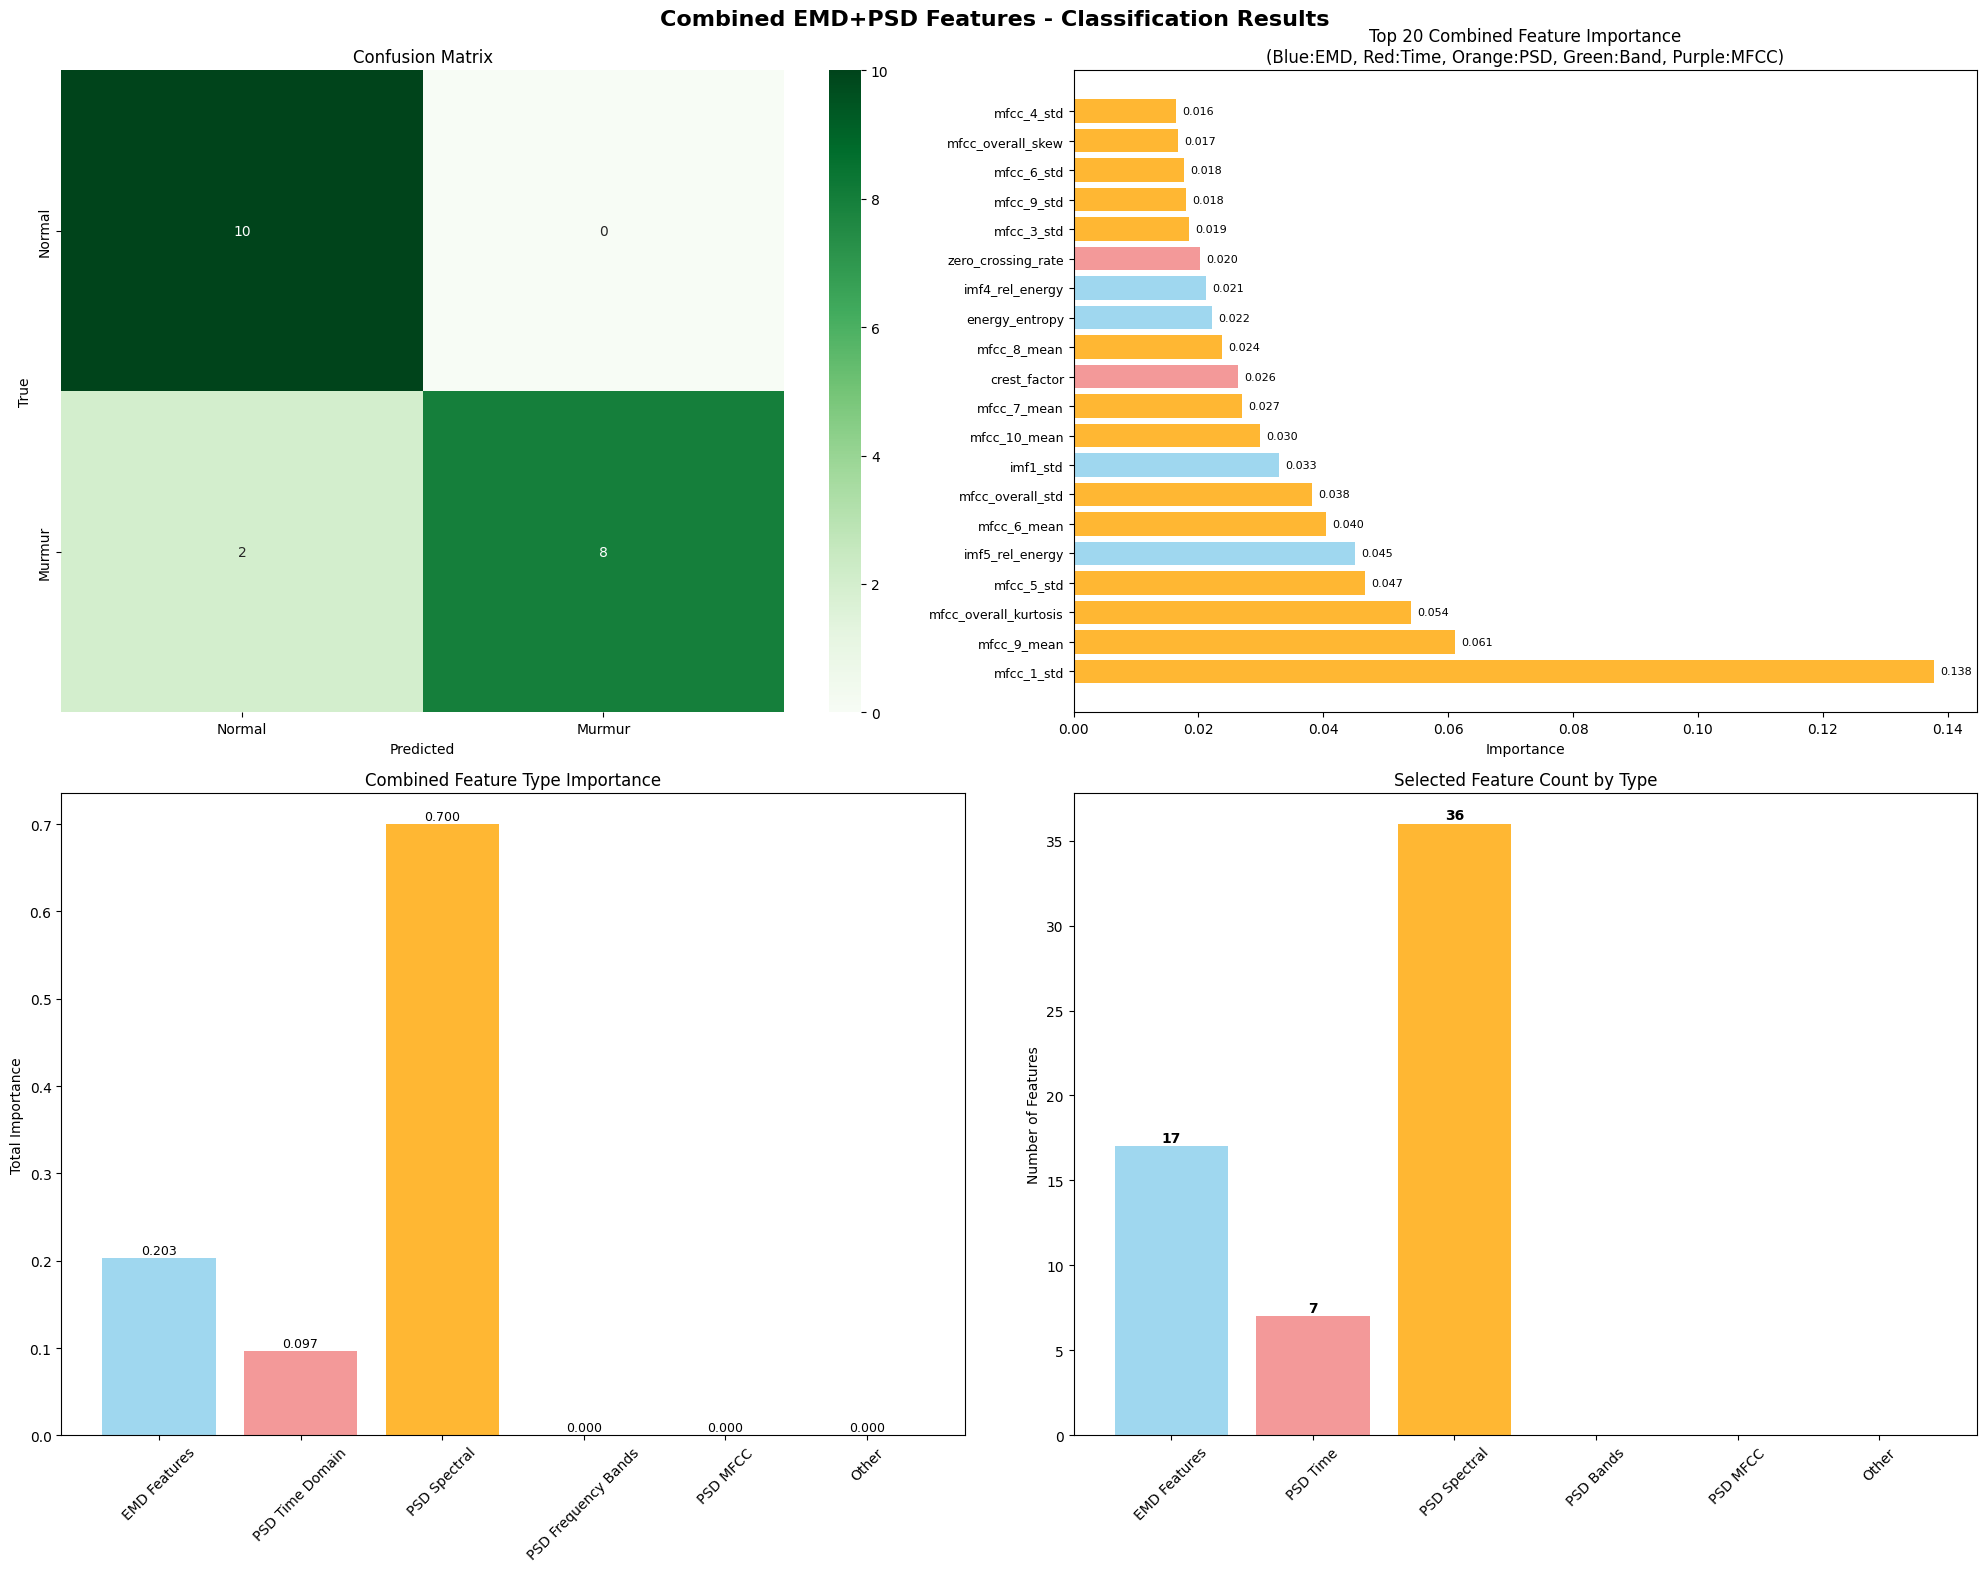


✅ COMBINED EMD+PSD FEATURES CLASSIFICATION COMPLETED!
🔗 Combined features leverage both time-domain (EMD) and frequency-domain (PSD) information
📊 Results show the synergistic effect of combining complementary feature sets

📋 PERFORMANCE SUMMARY:
   • Cross-Validation Accuracy: 0.9200 ± 0.0245
   • Cross-Validation Specificity: 0.9600 ± 0.0490
   • Test Set Accuracy:         0.9000
   • Test Set Specificity:      1.0000
   • Test Set F1-Score:         0.8889
   • Feature Synergy: EMD + PSD features working together


In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

class CombinedEMDPSDClassifier:
    """
    Combined EMD + PSD Features Classification with Feature Selection and Parameter Tuning
    Enhanced with Specificity calculations for both 5-fold CV and train-test split

    Menggabungkan fitur EMD dan PSD untuk klasifikasi heart sound yang lebih robust
    """

    def __init__(self, emd_features_path, psd_features_path, output_folder="./output"):
        self.emd_features_path = emd_features_path
        self.psd_features_path = psd_features_path
        self.output_folder = output_folder
        self.emd_data = None
        self.psd_data = None
        self.combined_data = None
        self.selected_features = None
        self.best_model = None

        print("🔗 COMBINED EMD + PSD FEATURES CLASSIFICATION SYSTEM")
        print("=" * 70)
        print(f"🧬 EMD Features File: {emd_features_path}")
        print(f"🌊 PSD Features File: {psd_features_path}")
        print(f"📁 Output Folder: {output_folder}")

    def calculate_specificity(self, y_true, y_pred):
        """
        Calculate specificity (True Negative Rate)
        Specificity = TN / (TN + FP)
        """
        cm = confusion_matrix(y_true, y_pred)
        if cm.shape == (2, 2):
            tn, fp, fn, tp = cm.ravel()
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
        else:
            specificity = 0
        return specificity

    def load_and_merge_data(self):
        """Load EMD and PSD datasets and merge them"""

        print("\n📂 Loading and merging EMD + PSD datasets...")

        # Load EMD features
        try:
            if self.emd_features_path.endswith('.xlsx'):
                self.emd_data = pd.read_excel(self.emd_features_path)
            else:
                self.emd_data = pd.read_csv(self.emd_features_path)
            print(f"✅ EMD dataset loaded: {self.emd_data.shape}")
        except Exception as e:
            print(f"❌ Error loading EMD dataset: {e}")
            return False

        # Load PSD features
        try:
            if self.psd_features_path.endswith('.xlsx'):
                self.psd_data = pd.read_excel(self.psd_features_path)
            else:
                self.psd_data = pd.read_csv(self.psd_features_path)
            print(f"✅ PSD dataset loaded: {self.psd_data.shape}")
        except Exception as e:
            print(f"❌ Error loading PSD dataset: {e}")
            return False

        # Merge datasets
        try:
            # Get EMD features (exclude metadata)
            emd_meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'sample_rate',
                           'signal_length', 'duration_seconds', 'num_imfs']
            emd_feature_cols = [col for col in self.emd_data.columns if col not in emd_meta_cols]

            # Get PSD features (exclude metadata)
            psd_meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'duration',
                           'sample_rate', 'signal_length']
            psd_feature_cols = [col for col in self.psd_data.columns if col not in psd_meta_cols]

            # Rename features to avoid conflicts
            emd_features_renamed = {}
            for col in emd_feature_cols:
                emd_features_renamed[col] = f'emd_{col}'

            psd_features_renamed = {}
            for col in psd_feature_cols:
                psd_features_renamed[col] = f'psd_{col}'

            # Create combined dataset
            self.combined_data = self.emd_data[['file_name', 'file_number', 'label', 'label_text']].copy()

            # Add renamed EMD features
            for old_name, new_name in emd_features_renamed.items():
                self.combined_data[new_name] = self.emd_data[old_name]

            # Add renamed PSD features
            for old_name, new_name in psd_features_renamed.items():
                self.combined_data[new_name] = self.psd_data[old_name]

            # Create Labels column
            self.combined_data['Labels'] = np.where(self.combined_data['label'] == -1, 0, 1)

            print(f"✅ Combined dataset created: {self.combined_data.shape}")
            print(f"   • EMD features: {len(emd_feature_cols)} (prefixed with 'emd_')")
            print(f"   • PSD features: {len(psd_feature_cols)} (prefixed with 'psd_')")
            print(f"   • Total combined features: {len(emd_feature_cols) + len(psd_feature_cols)}")

            # Display label distribution
            if 'label_text' in self.combined_data.columns:
                label_dist = self.combined_data['label_text'].value_counts()
                print(f"   • Label distribution: {label_dist.to_dict()}")

            return True

        except Exception as e:
            print(f"❌ Error merging datasets: {e}")
            import traceback
            traceback.print_exc()
            return False

    def parameter_tuning(self, X, y):
        """
        Find optimal parameters for Random Forest - optimized for combined features
        """

        print(f"🔧 Tuning Random Forest parameters for combined features...")

        try:
            # Extended parameter search space for combined features
            estimators = np.arange(50, 150, 25)  # More trees for complex combined features
            max_depth = np.arange(5, 15, 2)      # Deeper trees for feature interactions
            min_samples_split = [2, 5, 10]       # Control overfitting

            # Use stratified K-fold
            cvs = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            params = [{
                'n_estimators': estimators,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split
            }]

            # Initialize Random Forest with balanced class weights
            rf = RandomForestClassifier(
                class_weight='balanced',
                random_state=42,
                max_features='sqrt'  # Good for high-dimensional combined features
            )

            # Grid search for optimal parameters
            gsvm = GridSearchCV(
                estimator=rf,
                param_grid=params,
                cv=cvs,
                scoring='f1',
                n_jobs=-1,
                verbose=0
            )

            gsvm.fit(X, y)

            print(f"   ✅ Best parameters: {gsvm.best_params_}")
            print(f"   📊 Best CV score: {gsvm.best_score_:.4f}")

            return gsvm.best_params_

        except Exception as e:
            print(f"❌ Parameter tuning failed: {e}")
            # Return optimized default parameters for combined features
            return {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5}

    def feature_selection(self, y_name='Labels', n_runs=40, top_k=50):
        """
        Advanced feature selection for combined EMD + PSD features
        Uses multiple approaches to select the best features
        """

        print(f"\n🎯 Combined EMD + PSD Feature Selection...")
        print(f"   • Number of runs: {n_runs}")
        print(f"   • Top features per run: {top_k}")

        # Get combined feature columns
        meta_cols = ['file_name', 'file_number', 'label', 'label_text', 'Labels']
        feature_columns = [col for col in self.combined_data.columns if col not in meta_cols]

        # Categorize features
        emd_features = [col for col in feature_columns if col.startswith('emd_')]
        psd_features = [col for col in feature_columns if col.startswith('psd_')]

        print(f"   • Total features available: {len(feature_columns)}")
        print(f"   • EMD features: {len(emd_features)}")
        print(f"   • PSD features: {len(psd_features)}")

        # Further categorize PSD features
        psd_time = [col for col in psd_features if 'signal_' in col or 'zero_' in col or 'crest_' in col]
        psd_spectral = [col for col in psd_features if 'psd_' in col or 'spectral_' in col or 'power_spec_' in col]
        psd_bands = [col for col in psd_features if 'band_' in col]
        psd_mfcc = [col for col in psd_features if 'mfcc_' in col]

        print(f"   • Feature breakdown:")
        print(f"     - EMD: {len(emd_features)}")
        print(f"     - PSD Time: {len(psd_time)}")
        print(f"     - PSD Spectral: {len(psd_spectral)}")
        print(f"     - PSD Bands: {len(psd_bands)}")
        print(f"     - PSD MFCC: {len(psd_mfcc)}")

        # Method 1: Random Forest importance-based selection
        print(f"\n   🌲 Method 1: Random Forest importance-based selection...")
        rf_feature_sets = []

        for run in range(n_runs):
            try:
                # Shuffle data
                shuffled_data = self.combined_data.sample(frac=1, random_state=run).reset_index(drop=True)

                X = shuffled_data[feature_columns]
                y = shuffled_data[y_name]

                # Get optimal parameters
                rf_params = self.parameter_tuning(X, y)

                # Train Random Forest
                rf_feat_select = RandomForestClassifier(
                    n_estimators=rf_params['n_estimators'],
                    max_depth=rf_params['max_depth'],
                    min_samples_split=rf_params.get('min_samples_split', 5),
                    class_weight='balanced',
                    max_features='sqrt',
                    random_state=run
                )

                rf_feat_select.fit(X, y)

                # Get feature importances
                feature_importance = list(zip(rf_feat_select.feature_importances_, feature_columns))
                feature_importance.sort(reverse=True)

                # Extract top features
                top_features = [feat_name for _, feat_name in feature_importance[:top_k]]
                rf_feature_sets.append(set(top_features))

                if (run + 1) % 10 == 0:
                    print(f"     🔄 RF run {run + 1}/{n_runs} completed")

            except Exception as e:
                print(f"     ⚠️ RF run {run + 1} failed: {e}")
                continue

        # Method 2: Mutual Information-based selection
        print(f"\n   📊 Method 2: Mutual Information-based selection...")
        try:
            X_all = self.combined_data[feature_columns]
            y_all = self.combined_data[y_name]

            # Select top features using mutual information
            mi_selector = SelectKBest(score_func=mutual_info_classif, k=top_k)
            mi_selector.fit(X_all, y_all)
            mi_selected_features = set(np.array(feature_columns)[mi_selector.get_support()])

            print(f"     ✅ Mutual Information selected {len(mi_selected_features)} features")

        except Exception as e:
            print(f"     ⚠️ Mutual Information selection failed: {e}")
            mi_selected_features = set()

        # Method 3: F-statistic based selection
        print(f"\n   📈 Method 3: F-statistic based selection...")
        try:
            f_selector = SelectKBest(score_func=f_classif, k=top_k)
            f_selector.fit(X_all, y_all)
            f_selected_features = set(np.array(feature_columns)[f_selector.get_support()])

            print(f"     ✅ F-statistic selected {len(f_selected_features)} features")

        except Exception as e:
            print(f"     ⚠️ F-statistic selection failed: {e}")
            f_selected_features = set()

        # Combine all methods
        print(f"\n   🔗 Combining feature selection methods...")

        # Take union of Random Forest selections
        if rf_feature_sets:
            rf_union = set.union(*rf_feature_sets)
            print(f"     • RF union: {len(rf_union)} features")
        else:
            rf_union = set()

        # Create final feature set using voting
        all_features = rf_union | mi_selected_features | f_selected_features

        # Vote-based selection: features appearing in multiple methods get priority
        feature_votes = {}
        for feature in all_features:
            votes = 0
            if feature in rf_union:
                votes += 1
            if feature in mi_selected_features:
                votes += 1
            if feature in f_selected_features:
                votes += 1
            feature_votes[feature] = votes

        # Sort by votes and take top features
        sorted_features = sorted(feature_votes.items(), key=lambda x: x[1], reverse=True)

        # Select features with at least 2 votes, or top 60 if not enough
        high_vote_features = [feat for feat, votes in sorted_features if votes >= 2]
        if len(high_vote_features) < 40:
            selected_features = [feat for feat, _ in sorted_features[:60]]
        else:
            selected_features = high_vote_features[:60]

        print(f"\n✅ Combined Feature Selection Results:")
        print(f"   • Total candidate features: {len(feature_columns)}")
        print(f"   • Features with 2+ votes: {len(high_vote_features)}")
        print(f"   • Final selected features: {len(selected_features)}")

        # Analyze selected feature composition
        selected_emd = [f for f in selected_features if f.startswith('emd_')]
        selected_psd = [f for f in selected_features if f.startswith('psd_')]
        selected_psd_time = [f for f in selected_psd if 'signal_' in f or 'zero_' in f or 'crest_' in f]
        selected_psd_spectral = [f for f in selected_psd if 'psd_' in f or 'spectral_' in f or 'power_spec_' in f]
        selected_psd_bands = [f for f in selected_psd if 'band_' in f]
        selected_psd_mfcc = [f for f in selected_psd if 'mfcc_' in f]

        print(f"\n   📊 Selected Feature Composition:")
        print(f"     • EMD features: {len(selected_emd)} ({len(selected_emd)/len(selected_features)*100:.1f}%)")
        print(f"     • PSD features: {len(selected_psd)} ({len(selected_psd)/len(selected_features)*100:.1f}%)")
        print(f"       - PSD Time: {len(selected_psd_time)}")
        print(f"       - PSD Spectral: {len(selected_psd_spectral)}")
        print(f"       - PSD Bands: {len(selected_psd_bands)}")
        print(f"       - PSD MFCC: {len(selected_psd_mfcc)}")

        print(f"\n   🔝 Top 10 selected features:")
        for i, (feat, votes) in enumerate(sorted_features[:10]):
            feat_type = "EMD" if feat.startswith('emd_') else "PSD"
            print(f"     {i+1:2d}. {feat:<40} (votes: {votes}, type: {feat_type})")

        self.selected_features = selected_features
        return selected_features

    def undersampling(self, X, y, majority_class=0, minority_class=1, balance_ratio=1.0):
        """
        Undersample majority class to balance dataset
        """

        print(f"\n⚖️ Balancing combined dataset...")

        # Count classes
        unique, counts = np.unique(y, return_counts=True)
        class_counts = dict(zip(unique, counts))

        print(f"   • Original distribution: {class_counts}")

        # Identify majority and minority classes
        maj_count = class_counts.get(majority_class, 0)
        min_count = class_counts.get(minority_class, 0)

        if maj_count <= min_count:
            print(f"   ✅ Dataset already balanced")
            return X, y

        # Calculate target counts
        target_maj_count = int(min_count * balance_ratio)

        # Get indices for each class
        maj_indices = np.where(y == majority_class)[0]
        min_indices = np.where(y == minority_class)[0]

        # Randomly sample from majority class
        np.random.seed(42)
        sampled_maj_indices = np.random.choice(maj_indices, target_maj_count, replace=False)

        # Combine indices
        balanced_indices = np.concatenate([sampled_maj_indices, min_indices])
        np.random.shuffle(balanced_indices)

        X_balanced = X[balanced_indices]
        y_balanced = y[balanced_indices]

        # Count after balancing
        unique_bal, counts_bal = np.unique(y_balanced, return_counts=True)
        balanced_counts = dict(zip(unique_bal, counts_bal))

        print(f"   • Balanced distribution: {balanced_counts}")
        print(f"   • Total samples: {len(y)} → {len(y_balanced)}")

        return X_balanced, y_balanced

    def train_cross_validation(self, y_name='Labels'):
        """
        Train model with 5-fold cross-validation using combined features
        Enhanced with specificity calculation
        """

        print(f"\n🚀 Combined Features Cross-Validation Training...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.combined_data[self.selected_features].values
        y = self.combined_data[y_name].values

        # Apply undersampling
        X_balanced, y_balanced = self.undersampling(X, y)

        # 5-fold stratified cross-validation
        cv_splitter = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

        precision_scores = []
        recall_scores = []
        f1_scores = []
        accuracy_scores = []
        specificity_scores = []  # Added specificity tracking

        print(f"   🔄 Running 5-fold cross-validation...")

        fold = 1
        for train_idx, val_idx in cv_splitter.split(X_balanced, y_balanced):

            X_train_fold, X_val_fold = X_balanced[train_idx], X_balanced[val_idx]
            y_train_fold, y_val_fold = y_balanced[train_idx], y_balanced[val_idx]

            # Feature scaling (important for combined features)
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_fold)
            X_val_scaled = scaler.transform(X_val_fold)

            # Get optimal parameters
            rf_params = self.parameter_tuning(X_train_scaled, y_train_fold)

            # Train Random Forest
            rf_model = RandomForestClassifier(
                n_estimators=rf_params['n_estimators'],
                max_depth=rf_params['max_depth'],
                min_samples_split=rf_params.get('min_samples_split', 5),
                class_weight='balanced',
                max_features='sqrt',
                random_state=42,
                n_jobs=-1
            )

            rf_model.fit(X_train_scaled, y_train_fold)

            # Predict on validation set
            y_pred = rf_model.predict(X_val_scaled)

            # Calculate metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                y_val_fold, y_pred, pos_label=1, average='binary', zero_division=0
            )
            accuracy = accuracy_score(y_val_fold, y_pred)
            specificity = self.calculate_specificity(y_val_fold, y_pred)  # Added specificity calculation

            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)
            accuracy_scores.append(accuracy)
            specificity_scores.append(specificity)  # Added to list

            print(f"   Fold {fold}: Acc={accuracy:.4f}, Prec={precision:.4f}, Rec={recall:.4f}, F1={f1:.4f}, Spec={specificity:.4f}")
            fold += 1

        # Calculate average scores
        results = {
            'accuracy': np.mean(accuracy_scores),
            'precision': np.mean(precision_scores),
            'recall': np.mean(recall_scores),
            'f1_score': np.mean(f1_scores),
            'specificity': np.mean(specificity_scores),  # Added specificity mean
            'accuracy_std': np.std(accuracy_scores),
            'precision_std': np.std(precision_scores),
            'recall_std': np.std(recall_scores),
            'f1_std': np.std(f1_scores),
            'specificity_std': np.std(specificity_scores)  # Added specificity std
        }

        return results

    def train_test_split_evaluation(self, test_size=0.2, y_name='Labels'):
        """
        Train model with train-test split evaluation using combined features
        Enhanced with specificity calculation
        """

        print(f"\n🎯 Combined Features Train-Test Split Evaluation...")

        if self.selected_features is None:
            print(f"❌ No features selected. Run feature selection first!")
            return None

        # Prepare data
        X = self.combined_data[self.selected_features].values
        y = self.combined_data[y_name].values

        # Train-test split
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=test_size, random_state=42, stratify=y
        )

        print(f"   📊 Data split: Train={len(X_train)}, Test={len(X_test)}")

        # Apply undersampling to training data only
        X_train_balanced, y_train_balanced = self.undersampling(X_train, y_train)

        # Feature scaling (crucial for combined features)
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_balanced)
        X_test_scaled = scaler.transform(X_test)

        # Get optimal parameters
        rf_params = self.parameter_tuning(X_train_scaled, y_train_balanced)

        # Train final model
        self.best_model = RandomForestClassifier(
            n_estimators=rf_params['n_estimators'],
            max_depth=rf_params['max_depth'],
            min_samples_split=rf_params.get('min_samples_split', 5),
            class_weight='balanced',
            max_features='sqrt',
            random_state=42,
            n_jobs=-1
        )

        self.best_model.fit(X_train_scaled, y_train_balanced)

        # Predict on test set
        y_pred = self.best_model.predict(X_test_scaled)
        y_pred_proba = self.best_model.predict_proba(X_test_scaled)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision, recall, f1, _ = precision_recall_fscore_support(
            y_test, y_pred, pos_label=1, average='binary', zero_division=0
        )
        specificity = self.calculate_specificity(y_test, y_pred)  # Added specificity calculation

        # Confusion matrix
        cm = confusion_matrix(y_test, y_pred)

        results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'specificity': specificity,  # Added specificity to results
            'confusion_matrix': cm,
            'y_true': y_test,
            'y_pred': y_pred,
            'y_pred_proba': y_pred_proba,
            'feature_importance': self.best_model.feature_importances_,
            'scaler': scaler
        }

        return results

    def plot_results(self, results, title_prefix="Combined EMD+PSD Features"):
        """
        Plot comprehensive results for combined features
        """

        fig, axes = plt.subplots(2, 2, figsize=(20, 16))
        fig.suptitle(f'{title_prefix} - Classification Results', fontsize=16, fontweight='bold')

        # 1. Confusion Matrix
        if 'confusion_matrix' in results:
            cm = results['confusion_matrix']
            sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                       xticklabels=['Normal', 'Murmur'], yticklabels=['Normal', 'Murmur'],
                       ax=axes[0,0])
            axes[0,0].set_title('Confusion Matrix')
            axes[0,0].set_xlabel('Predicted')
            axes[0,0].set_ylabel('True')

        # 2. Feature Importance by Type (Top 20)
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Get top 20 features
            indices = np.argsort(importance)[::-1][:20]
            top_importance = importance[indices]
            top_names = [feature_names[i] for i in indices]

            # Color by feature type
            colors = []
            for name in top_names:
                if name.startswith('emd_'):
                    colors.append('skyblue')
                elif 'signal_' in name or 'zero_' in name or 'crest_' in name:
                    colors.append('lightcoral')
                elif 'psd_' in name or 'spectral_' in name or 'power_spec_' in name:
                    colors.append('orange')
                elif 'band_' in name:
                    colors.append('lightgreen')
                elif 'mfcc_' in name:
                    colors.append('plum')
                else:
                    colors.append('gray')

            bars = axes[0,1].barh(range(len(top_names)), top_importance, color=colors, alpha=0.8)
            axes[0,1].set_yticks(range(len(top_names)))
            axes[0,1].set_yticklabels([name.replace('emd_', '').replace('psd_', '') for name in top_names], fontsize=9)
            axes[0,1].set_title('Top 20 Combined Feature Importance\n(Blue:EMD, Red:Time, Orange:PSD, Green:Band, Purple:MFCC)')
            axes[0,1].set_xlabel('Importance')

            # Add value labels
            for i, (bar, val) in enumerate(zip(bars, top_importance)):
                axes[0,1].text(val + 0.001, bar.get_y() + bar.get_height()/2,
                             f'{val:.3f}', va='center', fontsize=8)

        # 3. Feature Type Distribution
        if 'feature_importance' in results and self.selected_features:
            importance = results['feature_importance']
            feature_names = self.selected_features

            # Categorize and sum importance by feature type
            categories = {
                'EMD Features': 0,
                'PSD Time Domain': 0,
                'PSD Spectral': 0,
                'PSD Frequency Bands': 0,
                'PSD MFCC': 0,
                'Other': 0
            }

            for feat_name, imp in zip(feature_names, importance):
                if feat_name.startswith('emd_'):
                    categories['EMD Features'] += imp
                elif 'signal_' in feat_name or 'zero_' in feat_name or 'crest_' in feat_name:
                    categories['PSD Time Domain'] += imp
                elif 'psd_' in feat_name or 'spectral_' in feat_name or 'power_spec_' in feat_name:
                    categories['PSD Spectral'] += imp
                elif 'band_' in feat_name:
                    categories['PSD Frequency Bands'] += imp
                elif 'mfcc_' in feat_name:
                    categories['PSD MFCC'] += imp
                else:
                    categories['Other'] += imp

            # Plot category importance
            cat_names = list(categories.keys())
            cat_importance = list(categories.values())
            colors_cat = ['skyblue', 'lightcoral', 'orange', 'lightgreen', 'plum', 'gray']

            bars = axes[1,0].bar(cat_names, cat_importance, color=colors_cat, alpha=0.8)
            axes[1,0].set_title('Combined Feature Type Importance')
            axes[1,0].set_ylabel('Total Importance')
            axes[1,0].tick_params(axis='x', rotation=45)

            # Add value labels
            for bar, val in zip(bars, cat_importance):
                axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001,
                             f'{val:.3f}', ha='center', va='bottom', fontsize=9)

        # 4. Feature Count by Type
        if self.selected_features:
            # Count features by type
            feature_counts = {
                'EMD Features': 0,
                'PSD Time': 0,
                'PSD Spectral': 0,
                'PSD Bands': 0,
                'PSD MFCC': 0,
                'Other': 0
            }

            for feat_name in self.selected_features:
                if feat_name.startswith('emd_'):
                    feature_counts['EMD Features'] += 1
                elif 'signal_' in feat_name or 'zero_' in feat_name or 'crest_' in feat_name:
                    feature_counts['PSD Time'] += 1
                elif 'psd_' in feat_name or 'spectral_' in feat_name or 'power_spec_' in feat_name:
                    feature_counts['PSD Spectral'] += 1
                elif 'band_' in feat_name:
                    feature_counts['PSD Bands'] += 1
                elif 'mfcc_' in feat_name:
                    feature_counts['PSD MFCC'] += 1
                else:
                    feature_counts['Other'] += 1

            # Plot feature counts
            count_names = list(feature_counts.keys())
            count_values = list(feature_counts.values())
            colors_count = ['skyblue', 'lightcoral', 'orange', 'lightgreen', 'plum', 'gray']

            bars = axes[1,1].bar(count_names, count_values, color=colors_count, alpha=0.8)
            axes[1,1].set_title('Selected Feature Count by Type')
            axes[1,1].set_ylabel('Number of Features')
            axes[1,1].tick_params(axis='x', rotation=45)

            # Add count labels
            for bar, val in zip(bars, count_values):
                if val > 0:
                    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1,
                                  str(val), ha='center', va='bottom', fontsize=10, fontweight='bold')

        plt.tight_layout()
        plt.show()

    def display_results(self, results, evaluation_type="Cross-Validation"):
        """
        Display comprehensive results for combined features
        Enhanced with specificity display
        """

        print(f"\n📊 COMBINED EMD+PSD FEATURES {evaluation_type.upper()} RESULTS")
        print("=" * 70)

        if evaluation_type == "Cross-Validation":
            print(f"🎯 5-Fold Cross-Validation Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f} ± {results['accuracy_std']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f} ± {results['precision_std']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f} ± {results['recall_std']:.4f}")
            print(f"   • Specificity:{results['specificity']:.4f} ± {results['specificity_std']:.4f}")  # Added specificity display
            print(f"   • F1-Score:   {results['f1_score']:.4f} ± {results['f1_std']:.4f}")

        else:  # Train-Test Split
            print(f"🎯 Train-Test Split Results:")
            print(f"   • Accuracy:   {results['accuracy']:.4f}")
            print(f"   • Precision:  {results['precision']:.4f}")
            print(f"   • Recall:     {results['recall']:.4f}")
            print(f"   • Specificity:{results['specificity']:.4f}")  # Added specificity display
            print(f"   • F1-Score:   {results['f1_score']:.4f}")

            if 'confusion_matrix' in results:
                cm = results['confusion_matrix']
                tn, fp, fn, tp = cm.ravel()

                print(f"\n📋 Detailed Confusion Matrix:")
                print(f"   • True Negatives:  {tn}")
                print(f"   • False Positives: {fp}")
                print(f"   • False Negatives: {fn}")
                print(f"   • True Positives:  {tp}")
                print(f"   • Specificity (TN/(TN+FP)): {results['specificity']:.4f}")

        print(f"\n🔗 Combined Feature Analysis:")
        print(f"   • Selected features: {len(self.selected_features) if self.selected_features else 0}")

        if self.selected_features:
            # Analyze feature composition
            emd_count = len([f for f in self.selected_features if f.startswith('emd_')])
            psd_count = len([f for f in self.selected_features if f.startswith('psd_')])

            print(f"   • EMD features: {emd_count} ({emd_count/len(self.selected_features)*100:.1f}%)")
            print(f"   • PSD features: {psd_count} ({psd_count/len(self.selected_features)*100:.1f}%)")
            print(f"   • Feature selection: Multi-method voting (RF + MI + F-test)")
            print(f"   • Classifier: Random Forest with advanced parameter tuning")
            print(f"   • Feature scaling: StandardScaler applied")

def main():
    """
    Main execution function for combined EMD+PSD features classification
    """

    # Configuration
    emd_features_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/emd_features_extracted/wavelet_emd_features.csv"
    psd_features_path = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/fixed_psd_frequency_features.csv"
    output_folder = "/content/mydrive/MyDrive/PAPER_MURMUR_NORMAL/Complete_Energy_Analysis/combined_classification_output"

    try:
        # Initialize combined classifier
        combined_classifier = CombinedEMDPSDClassifier(emd_features_path, psd_features_path, output_folder)

        # Load and merge data
        if not combined_classifier.load_and_merge_data():
            print("❌ Failed to load and merge data!")
            return None

        # Advanced feature selection
        selected_features = combined_classifier.feature_selection(n_runs=30, top_k=50)

        if not selected_features:
            print("❌ Feature selection failed!")
            return None

        print(f"\n" + "="*70)
        print(f"🔄 RUNNING BOTH EVALUATION METHODS FOR COMBINED FEATURES")
        print(f"="*70)

        # 1. Cross-validation
        cv_results = combined_classifier.train_cross_validation()

        if cv_results:
            combined_classifier.display_results(cv_results, "Cross-Validation")

        # 2. Train-test split
        test_results = combined_classifier.train_test_split_evaluation(test_size=0.2)

        if test_results:
            combined_classifier.display_results(test_results, "Train-Test Split")

            # Plot comprehensive results
            print(f"\n📊 Generating comprehensive visualizations...")
            combined_classifier.plot_results(test_results)

        print(f"\n✅ COMBINED EMD+PSD FEATURES CLASSIFICATION COMPLETED!")
        print(f"🔗 Combined features leverage both time-domain (EMD) and frequency-domain (PSD) information")
        print(f"📊 Results show the synergistic effect of combining complementary feature sets")

        # Summary comparison
        if cv_results and test_results:
            print(f"\n📋 PERFORMANCE SUMMARY:")
            print(f"   • Cross-Validation Accuracy: {cv_results['accuracy']:.4f} ± {cv_results['accuracy_std']:.4f}")
            print(f"   • Cross-Validation Specificity: {cv_results['specificity']:.4f} ± {cv_results['specificity_std']:.4f}")
            print(f"   • Test Set Accuracy:         {test_results['accuracy']:.4f}")
            print(f"   • Test Set Specificity:      {test_results['specificity']:.4f}")
            print(f"   • Test Set F1-Score:         {test_results['f1_score']:.4f}")
            print(f"   • Feature Synergy: EMD + PSD features working together")

        return combined_classifier, cv_results, test_results

    except Exception as e:
        print(f"❌ Error in combined classification: {e}")
        import traceback
        traceback.print_exc()
        return None

if __name__ == "__main__":
    combined_classifier, cv_results, test_results = main()